In [339]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

import matplotlib.colors as mcolors
import csv


In [11]:
# load a rank file
mat_version = 630
modality = "olfactory"
fdir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/{}_ranks/ranks".format(ver)
#rank_df = pd.read_feather(fdir)

In [340]:
#load all ranks
date_str = "230409"

rank_df_col = {}
# input_classes = ["gustatory", "mechanosensory", "olfactory", "thermosensory", "hygrosensory", "allsensory"] + jo_strings
input_classes = ["ascending", "gustatory", "ocellar", "visual", "mechanosensory", "mechanosensory-jo", "mechanosensory-auditory", "mechanosensory-head-bristle", "mechanosensory-eye-bristle", "mechanosensory-taste-peg", "olfactory", "thermosensory", "hygrosensory", "visual_projection", "allsensory", "allinputs_novisual", "allinputs"]
runs = ["10000"]

input_class_labels = ["ascending","gustatory","ocellar","visual","mechanosensory","mech.-JO","mech.-auditory",
                     "mech.-head bristle","mech.-eye bristle","mech.-taste peg","olfactory","thermosensory",
                     "hygrosensory","visual proj.","all sensory","all sensory (nonvisual)","all inputs"]


for nt in ["all"]:
# for nt in ["ach", "gaba", "glut", "inh", "all"]:
    rank_dfs = []

    for run in runs:
        for input_class in input_classes:
            df = pd.read_feather(f"{fdir}/neuron_class_ranking_df_{mat_version}_{nt}_{date_str}-{input_class}-{run}.feather")
            df = df.rename(columns={"layer_mean": f"{input_class}-{run}"})[["root_id", f"{input_class}-{run}"]]
            df[f"{input_class}-{run}"] -= 1
            rank_dfs.append(df)

    rank_df = rank_dfs[0].copy()
    for next_rank_df in rank_dfs[1:]:
        rank_df = pd.merge(rank_df, next_rank_df, on="root_id", how="outer")

#     for input_class in input_classes:
#         rank_df[f"{input_class}-eff"] = rank_df[f"{input_class}-{runs[0]}"] / rank_df[f"{input_class}-{runs[1]}"]

    #rank_df = pd.merge(rank_df, cam_class_df, on="root_id", how="outer")
    #rank_df = pd.merge(rank_df, nt_map_df, on="root_id", how="left")
    #rank_df = pd.merge(rank_df, side_df, on="root_id", how="left")
    
    #rank_df_col[nt] = rank_df

In [341]:
#Load rich club neurons

csv_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/largescale_csvs_630/"

group_type = "broadcast"

# ext_in, ext_out, internal
rich_balanced_color = mcolors.to_rgb('#F47722') #will have to do subset
broadcast_color = mcolors.to_rgb('#0AEABF')
integrate_color = mcolors.to_rgb('#973DA0')

csv_readout = pd.read_csv((csv_dir + "broadcast"  + "_neurons.csv"))
broadcast_root_ids = csv_readout.iloc[:, 0]

csv_readout = pd.read_csv((csv_dir + "integrate"  + "_neurons.csv"))
integrate_root_ids = csv_readout.iloc[:, 0]

csv_readout = pd.read_csv((csv_dir + "rich_club"  + "_neurons.csv"))
rich_club_root_ids = csv_readout.iloc[:, 0]




In [342]:
def ranking_plot(df, x_col, color_set, stat, xlim, xlabel, ylabel, ylim=None, kde=False, alpha=1., out_path=None,
                 nbins=50, figsize=(4, 4), use_steps=False):
    fig = plt.figure(figsize=figsize, facecolor="white", dpi=200)
    plt.tick_params(length=10, width=1.5, labelsize=14)
    
    bins = np.linspace(*xlim, nbins + 1)
    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.histplot(data=df,
                 x=x_col, 
                 color=color_set, 
                 #palette=cam_color_map,
                 alpha=alpha, 
                 kde=kde,
                 stat=stat,
                 bins=bins,
                 common_norm=False,
                 legend=False,
                 element="step" if use_steps else "bars",
                 fill=~use_steps,
                 lw=3 if use_steps else None,
                )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlim(*xlim)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    sns.despine(ax=ax, offset=5, trim=False)
    
    plt.tight_layout()
    if out_path is not None:
        if out_path.endswith(".png"):
            plt.savefig(out_path, dpi=300, bbox_inches = "tight")
            plt.savefig(f"{out_path[:-4]}.pdf", bbox_inches = "tight")

    plt.show()

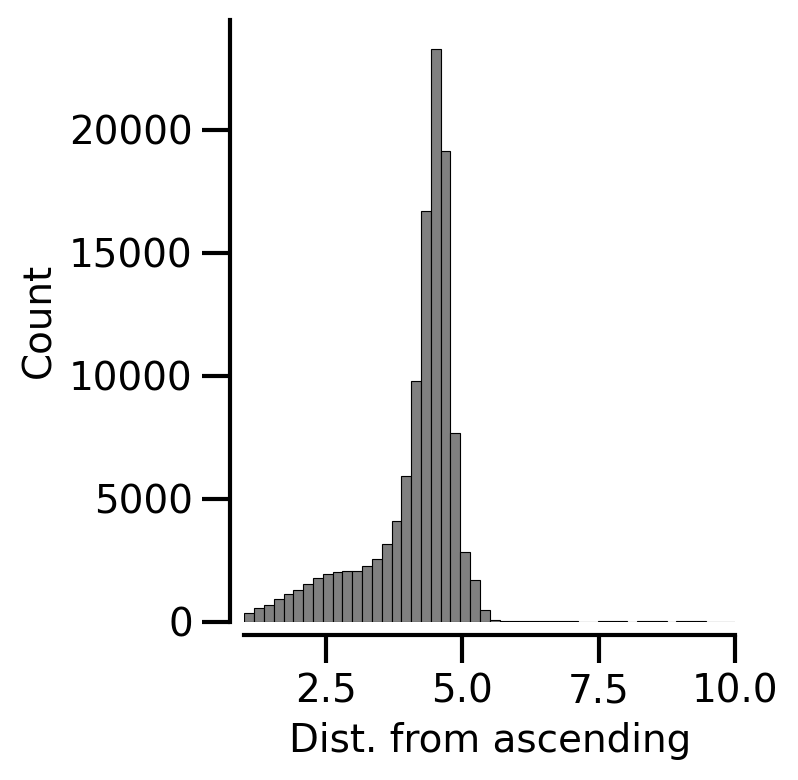

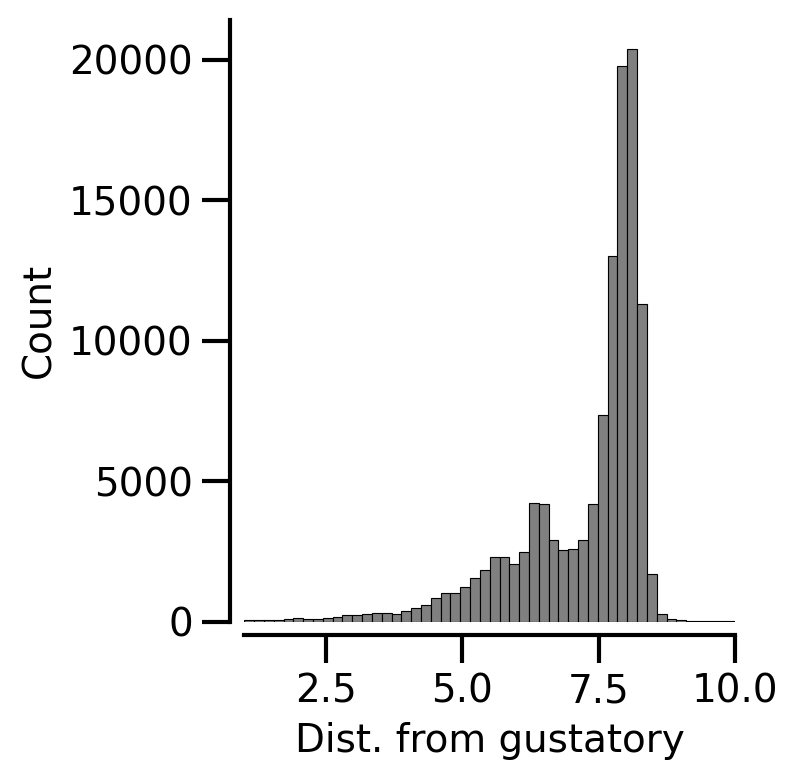

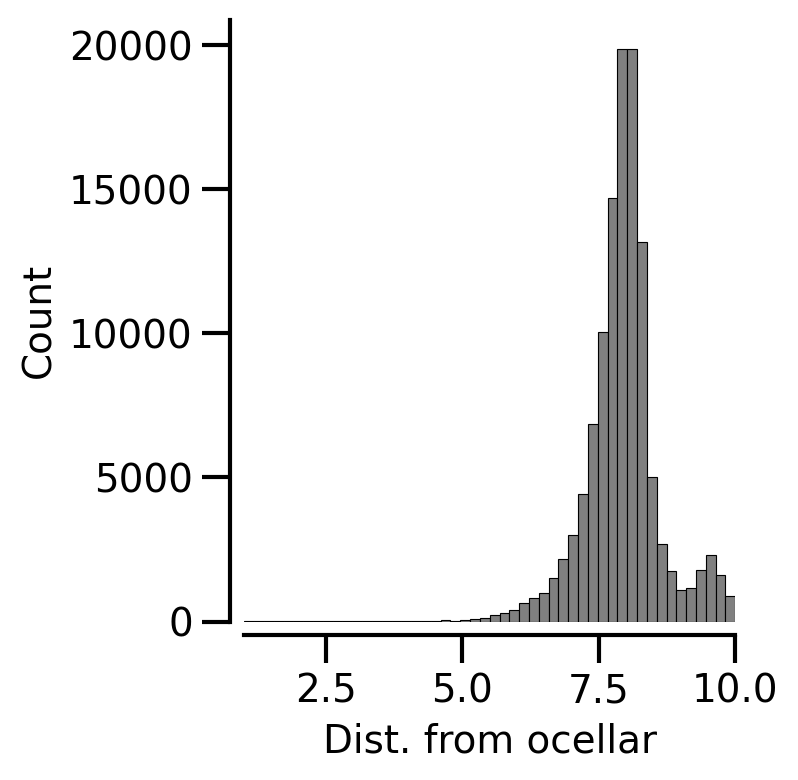

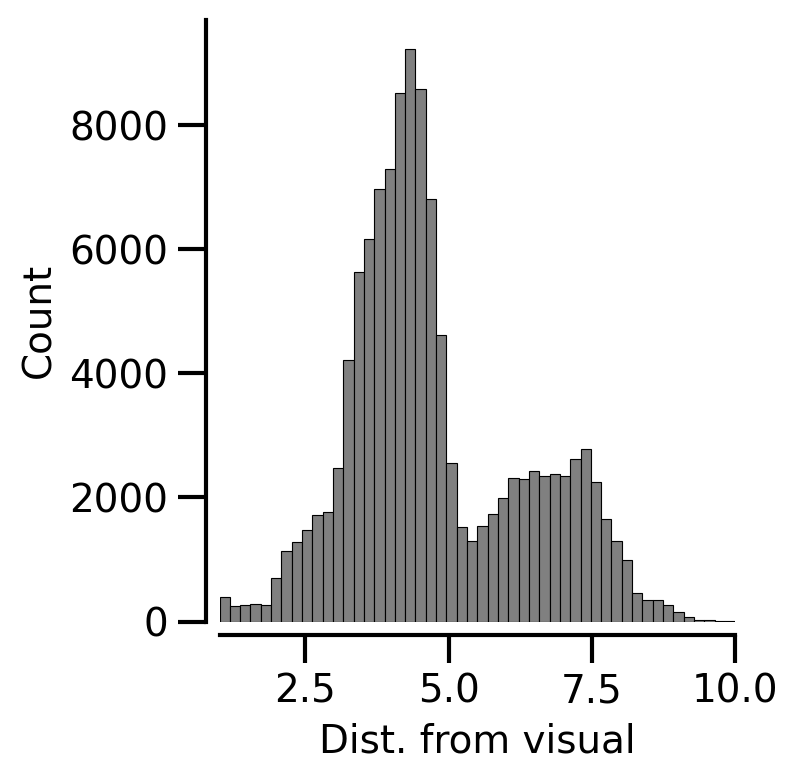

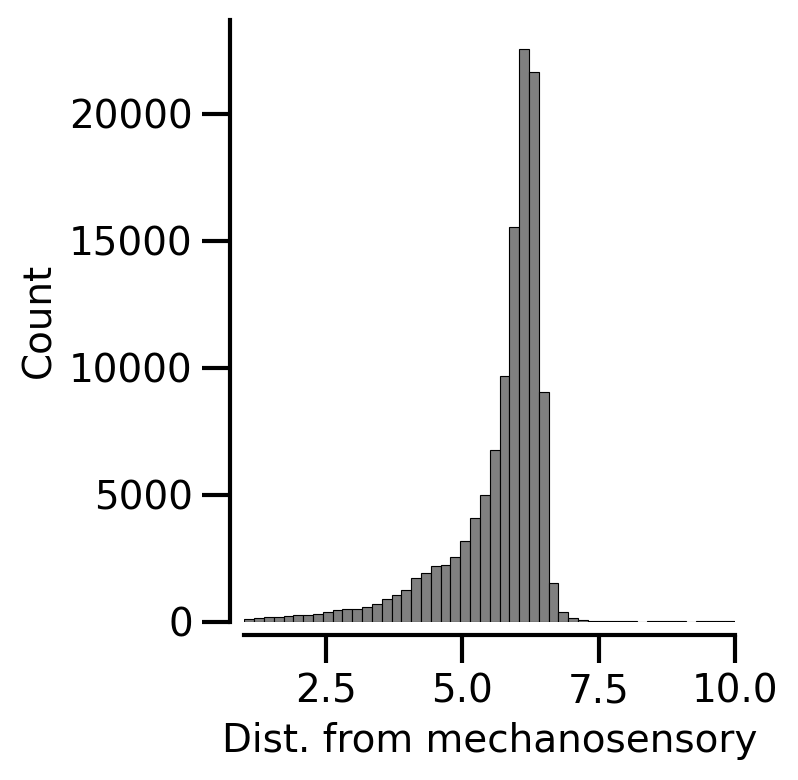

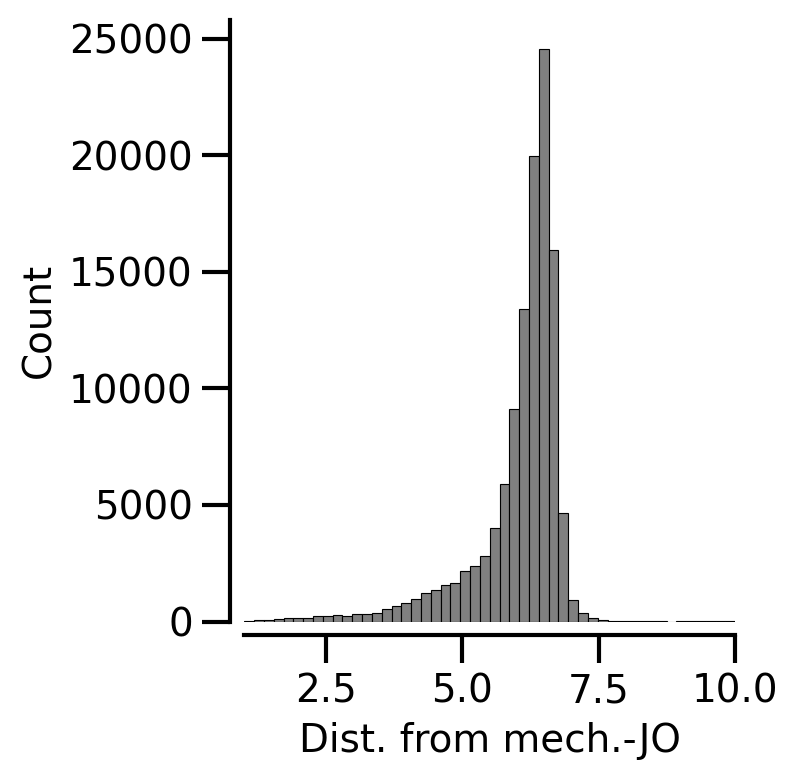

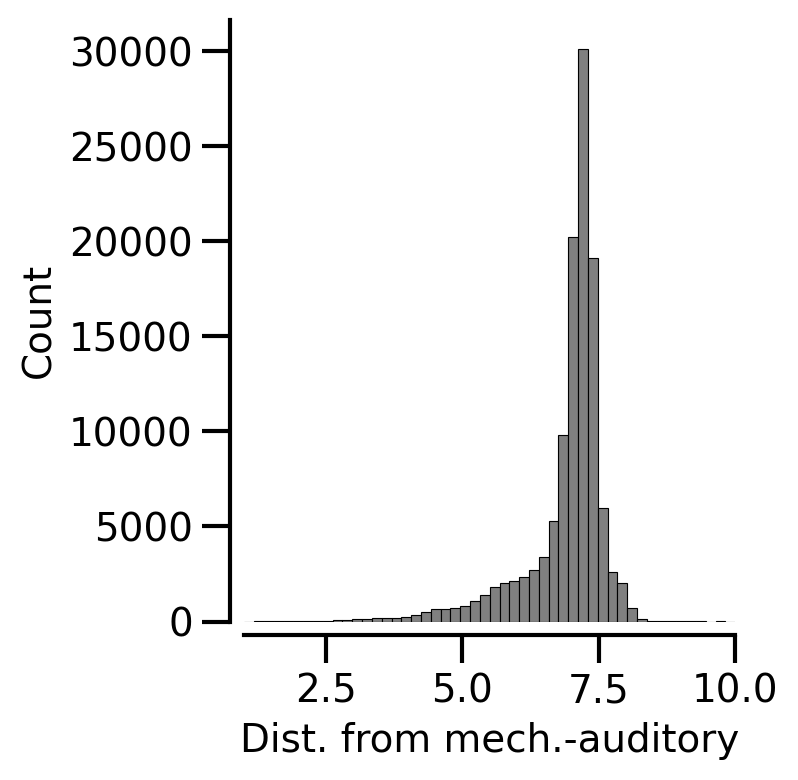

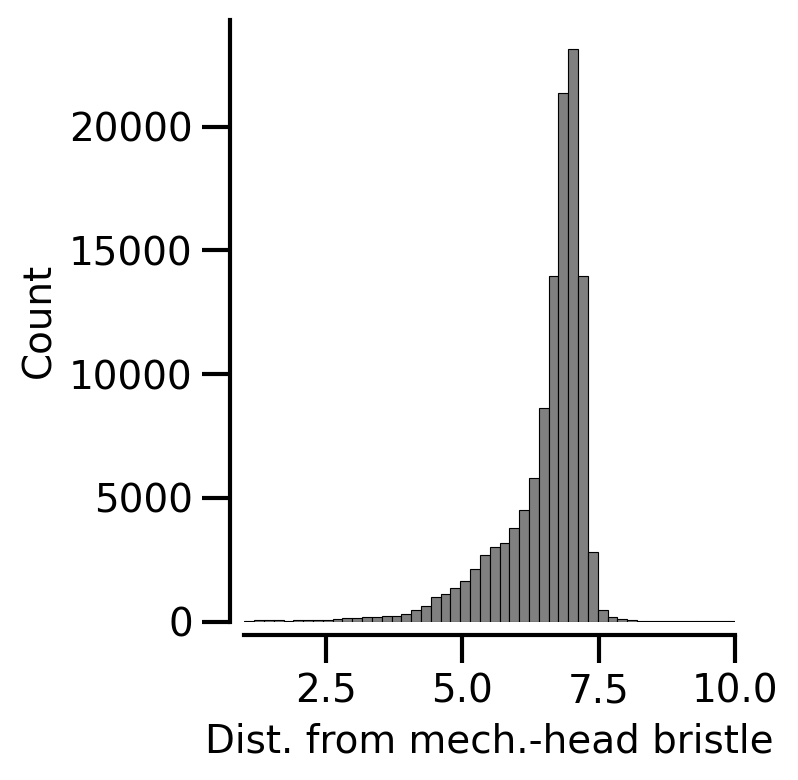

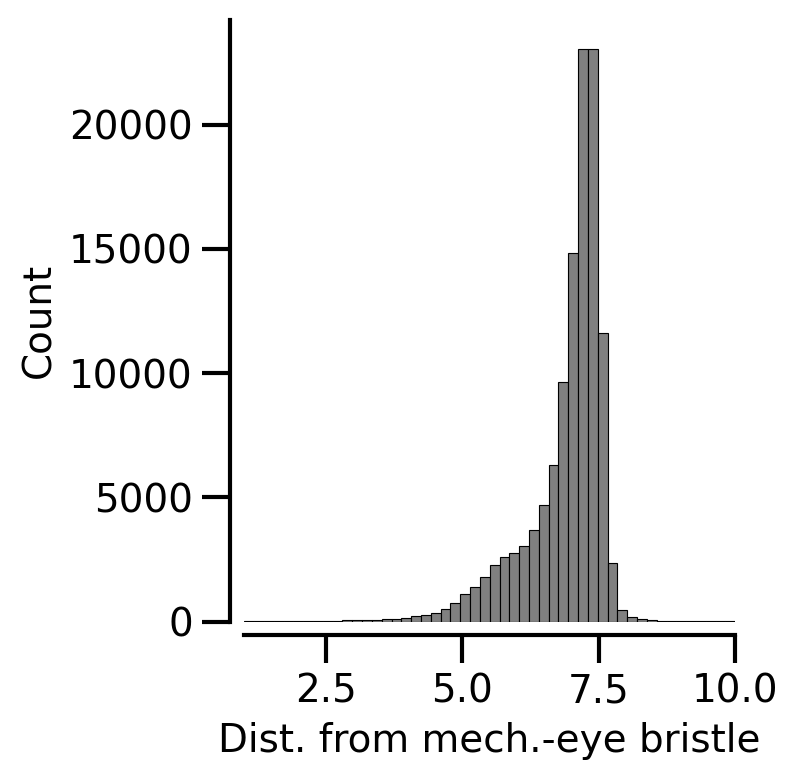

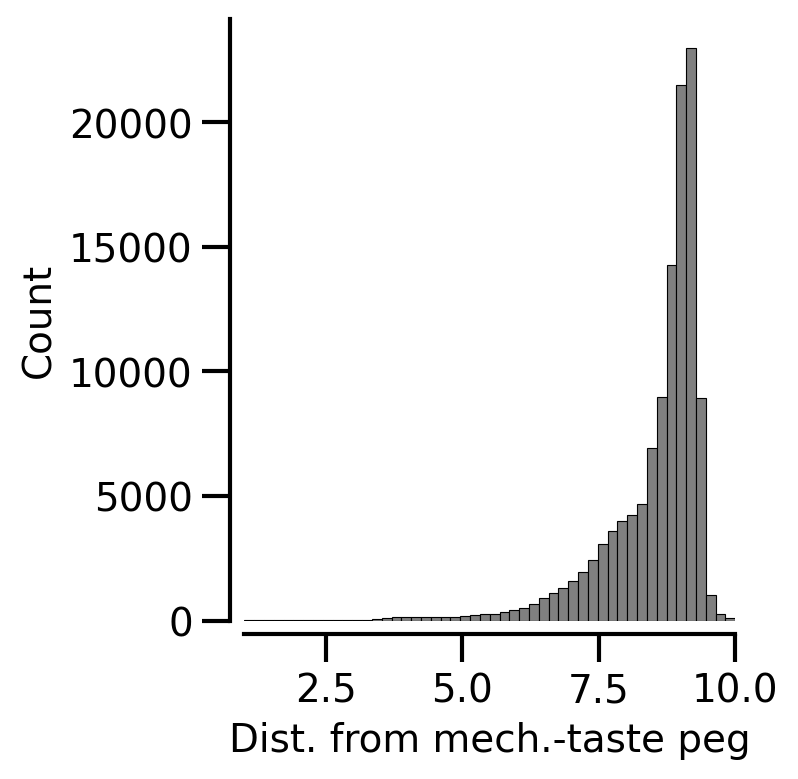

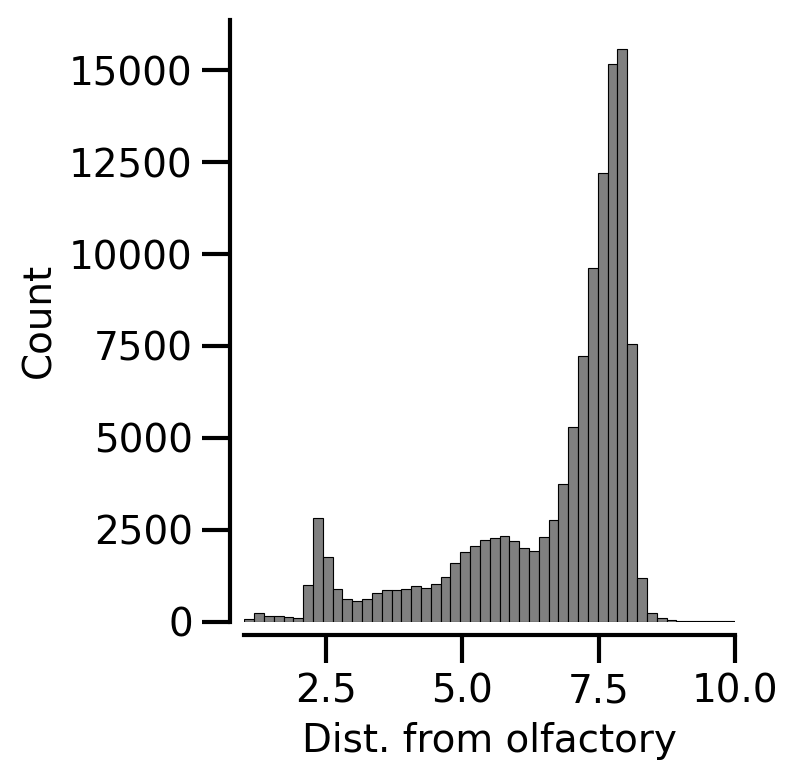

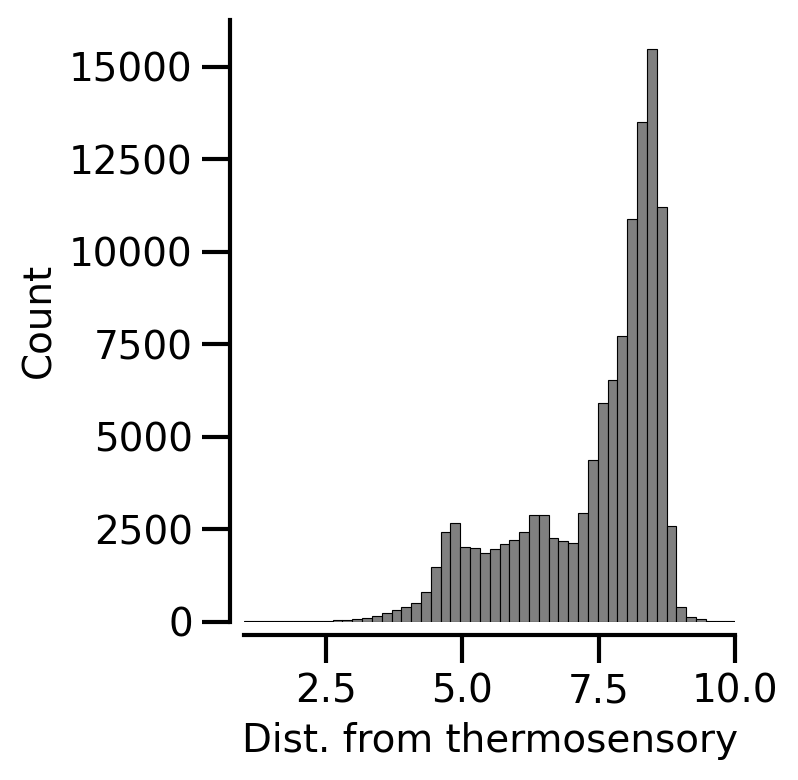

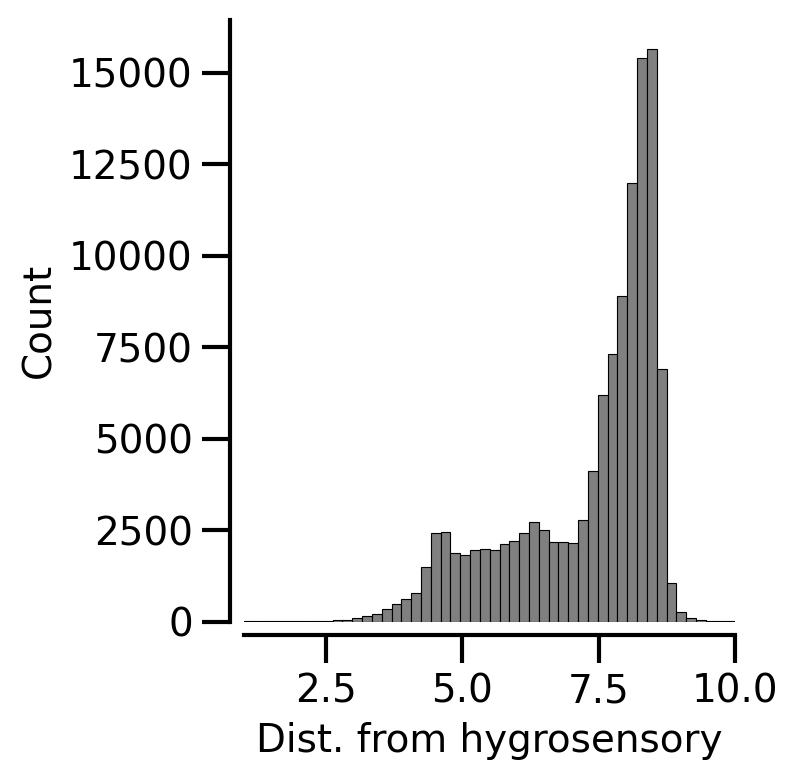

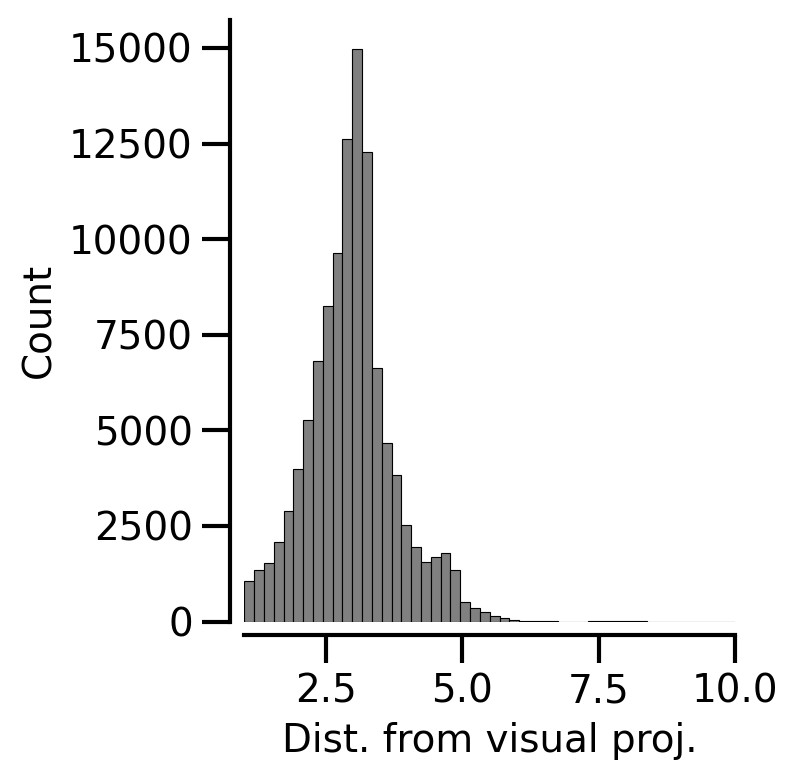

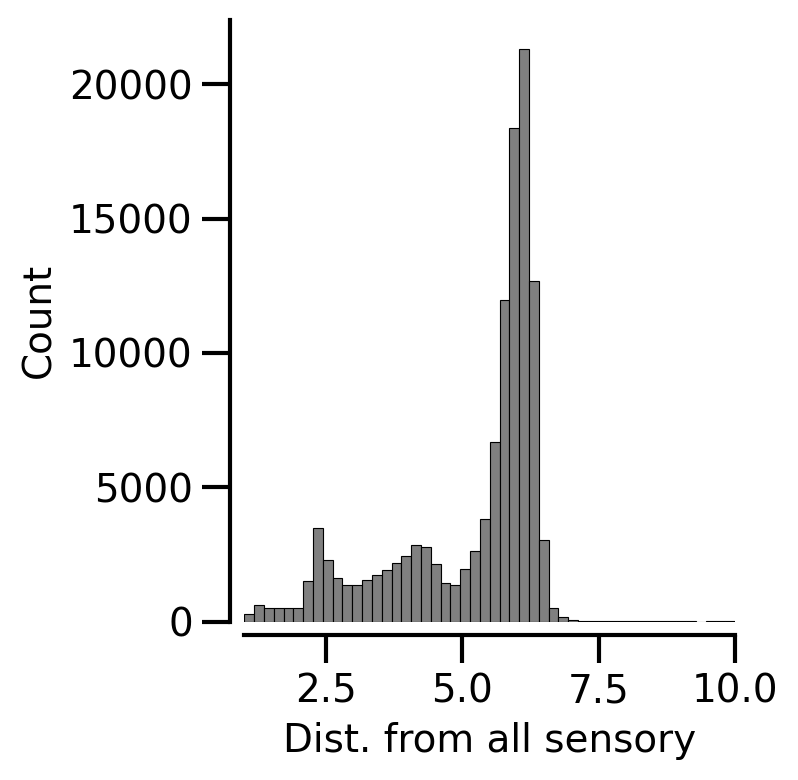

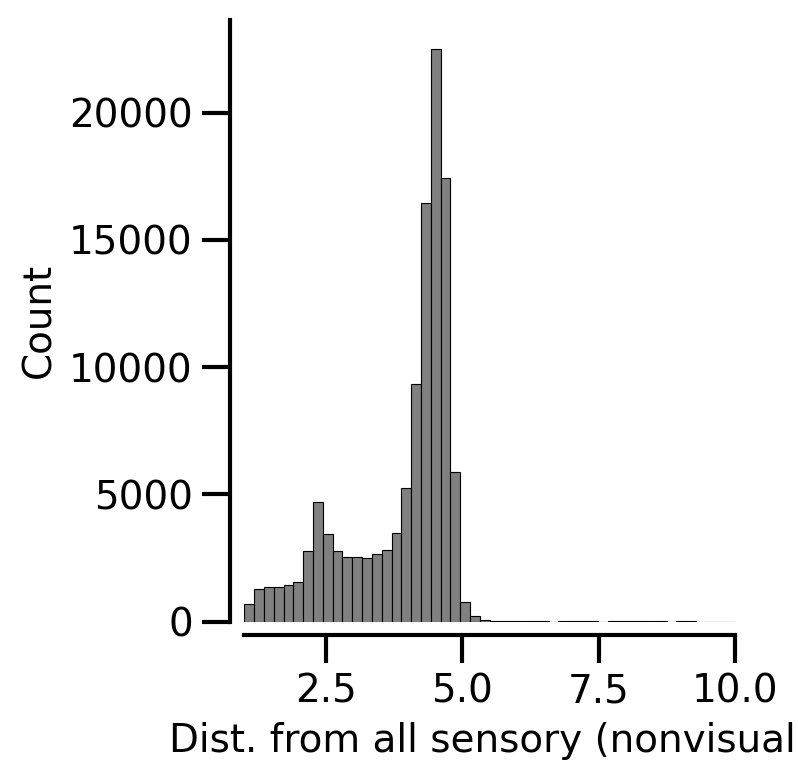

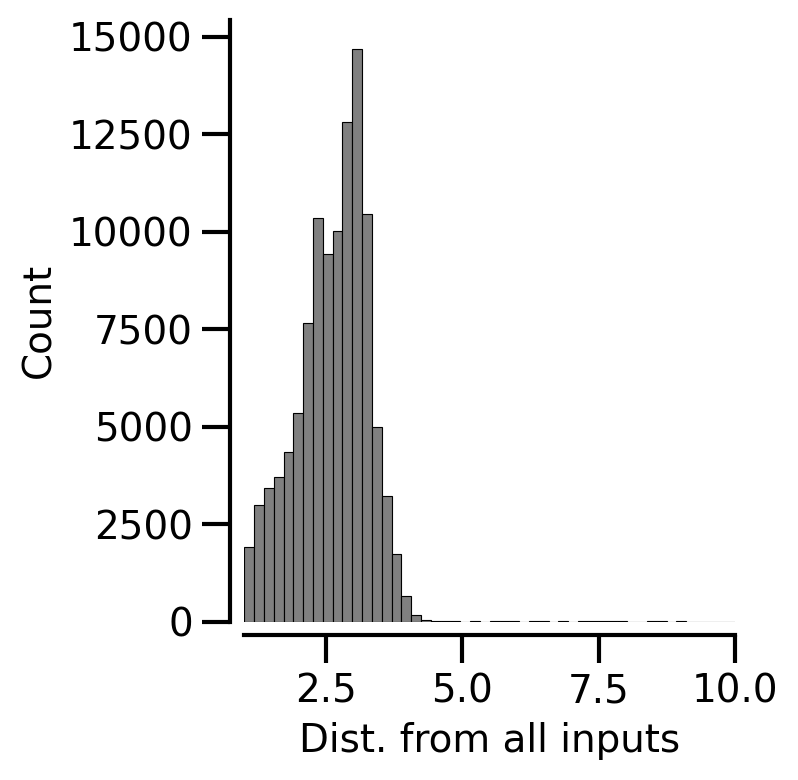

In [343]:
#Distance in hops (all neurons)
run = "10000"

for input_class,ic_label in zip(input_classes,input_class_labels):

    col = f"{input_class}-{run}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    ranking_plot(rank_df, 
             col, "gray",
             "count", [1, 10], 
            f"Dist. from {ic_label}", 
            "Count",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_hops.png")

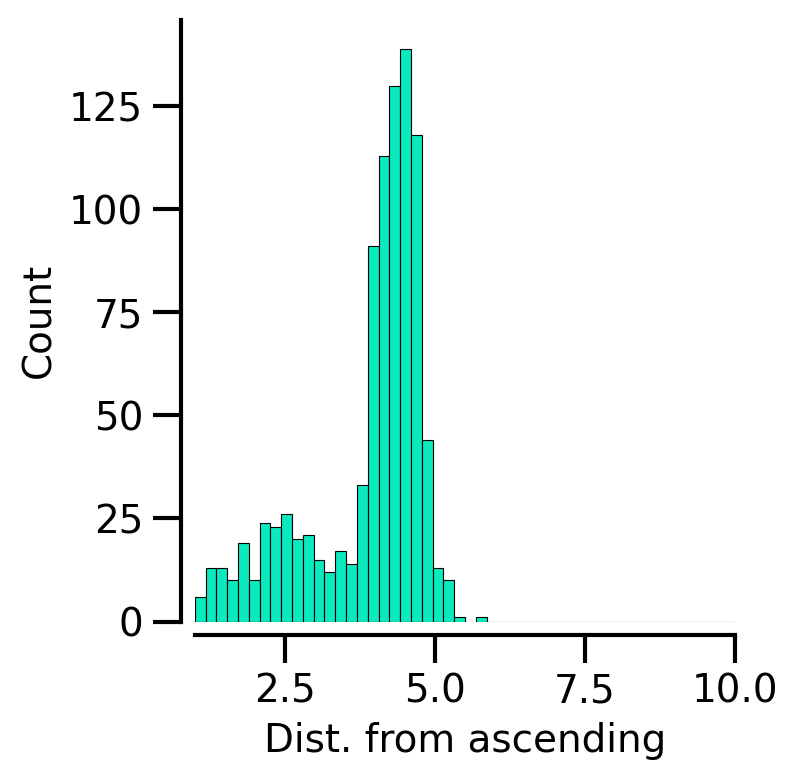

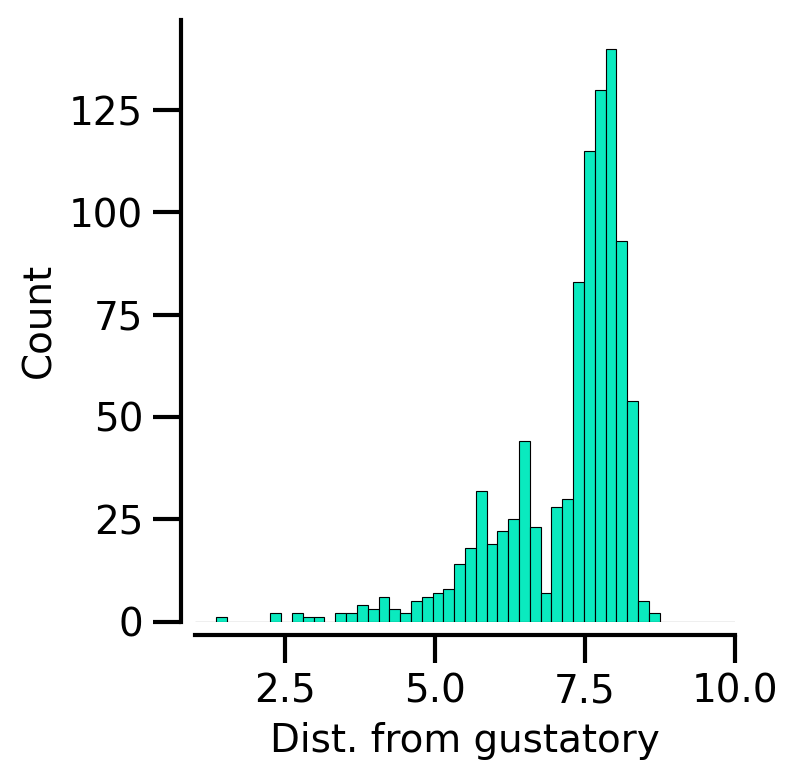

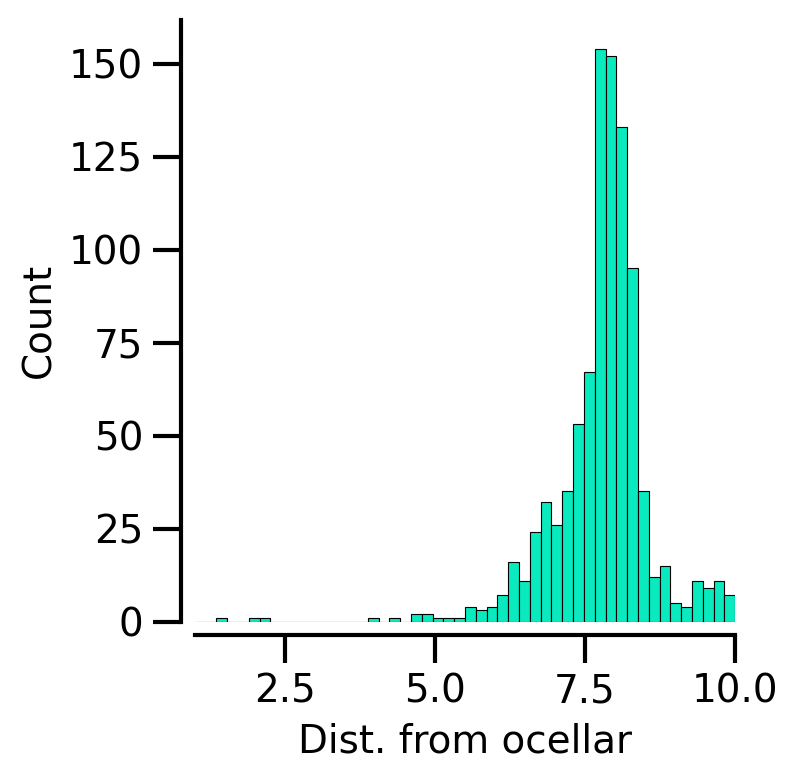

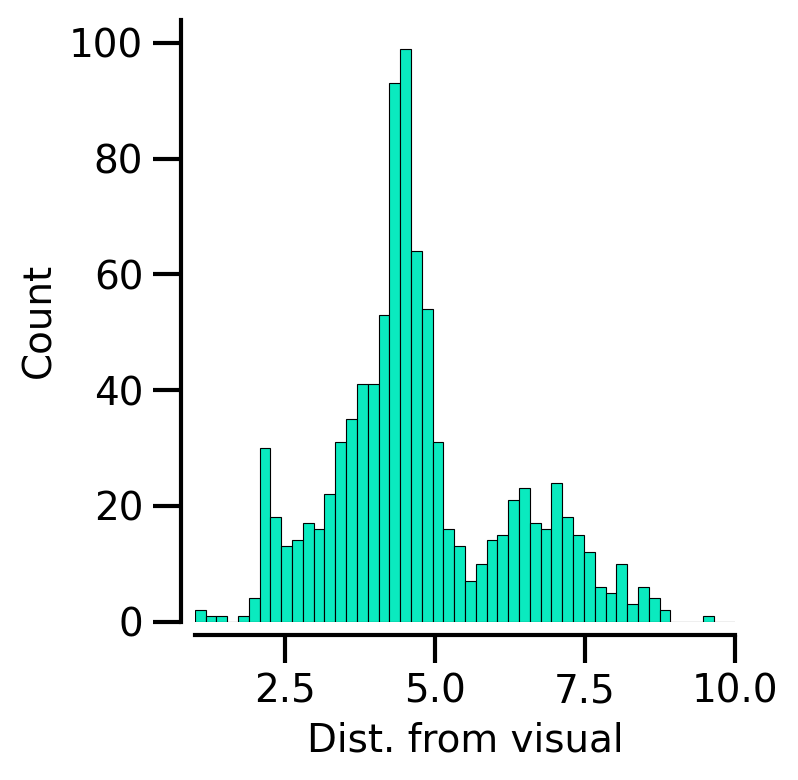

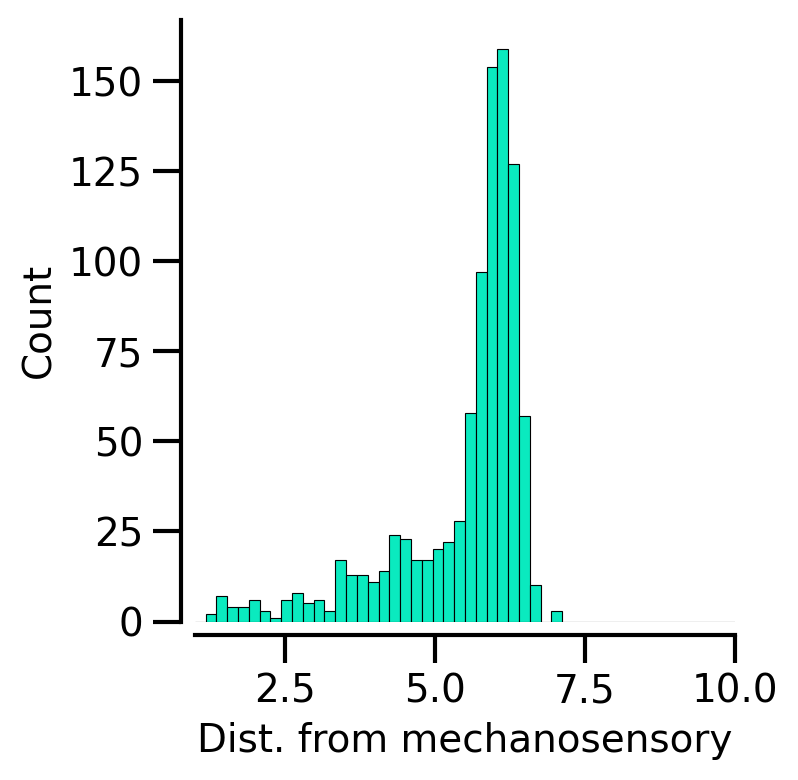

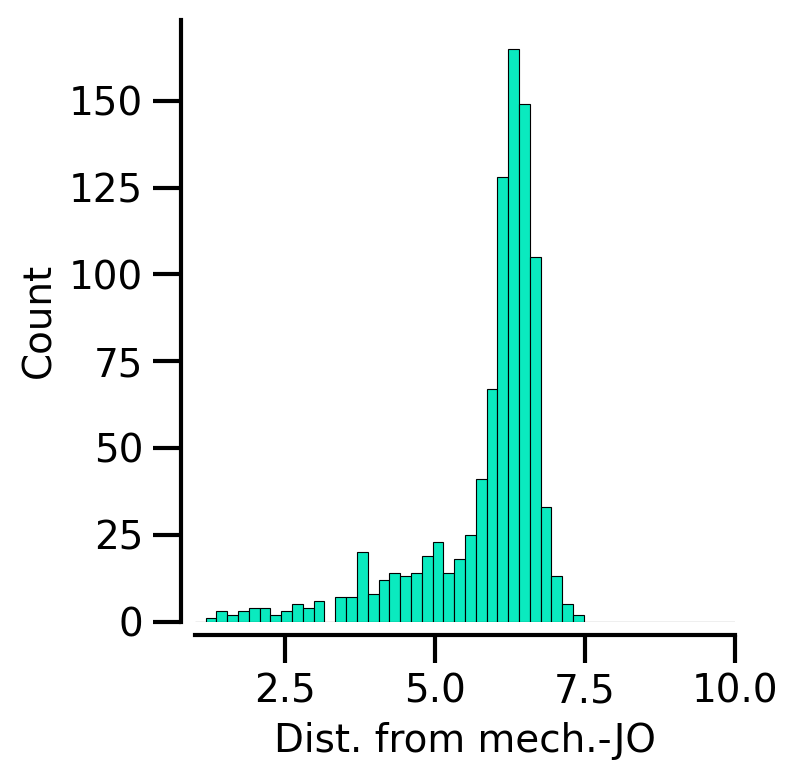

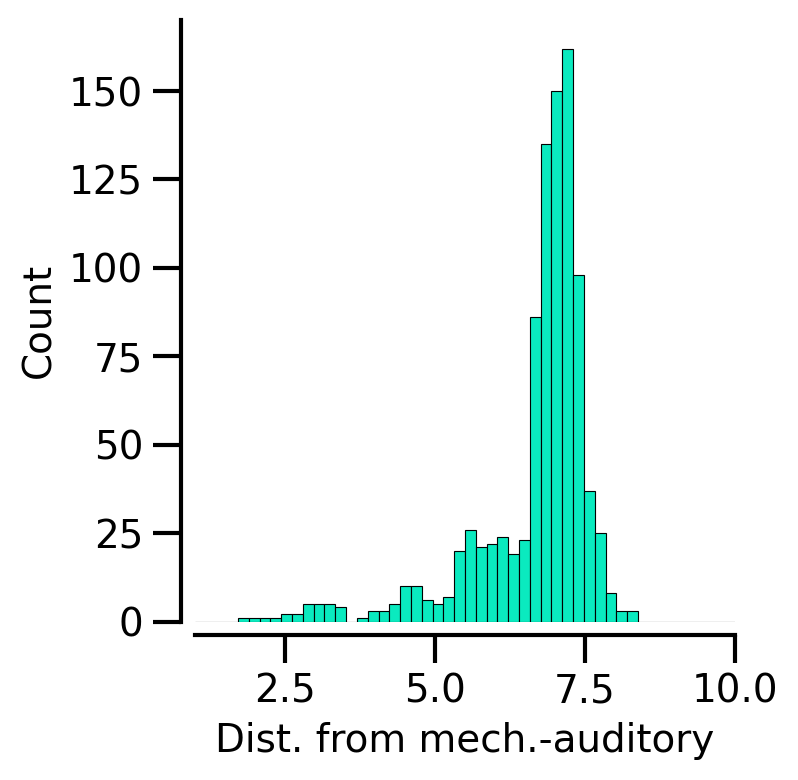

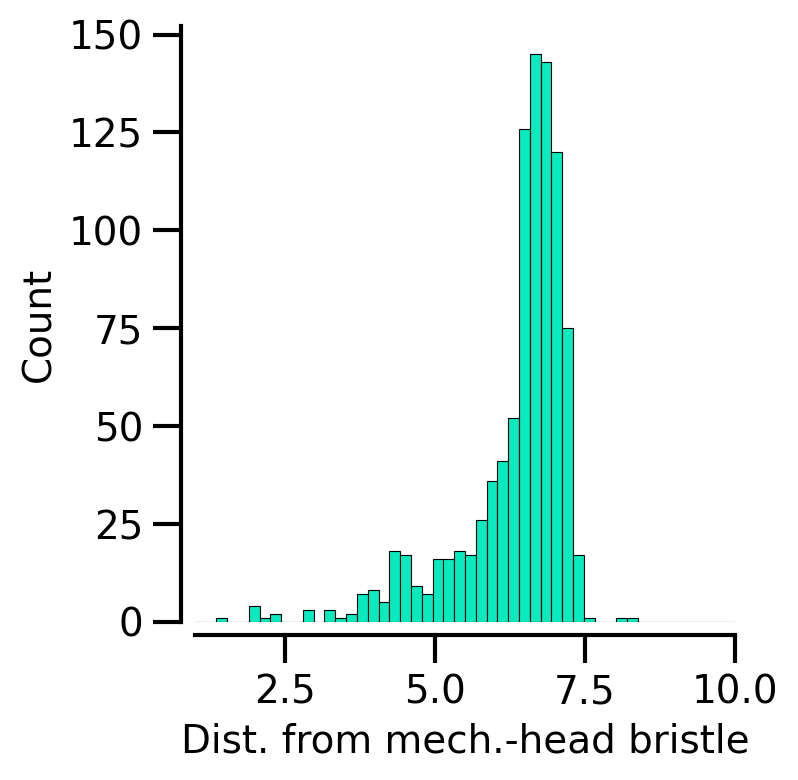

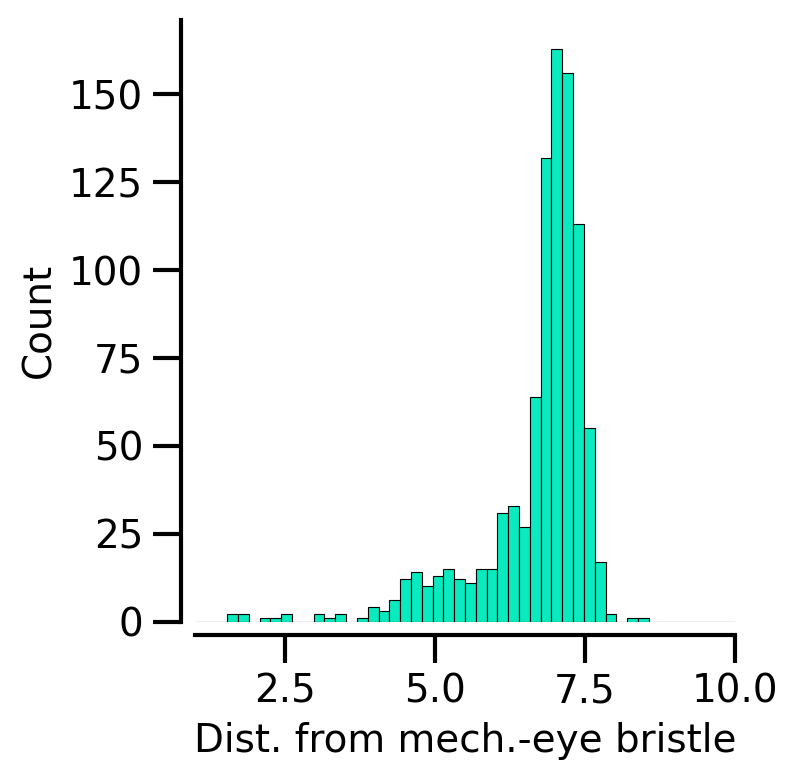

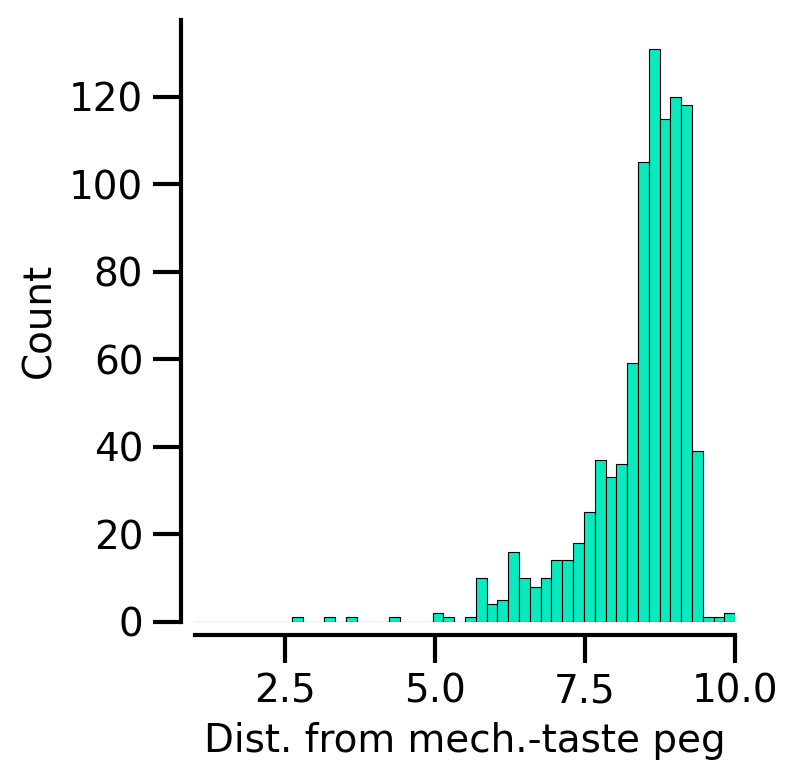

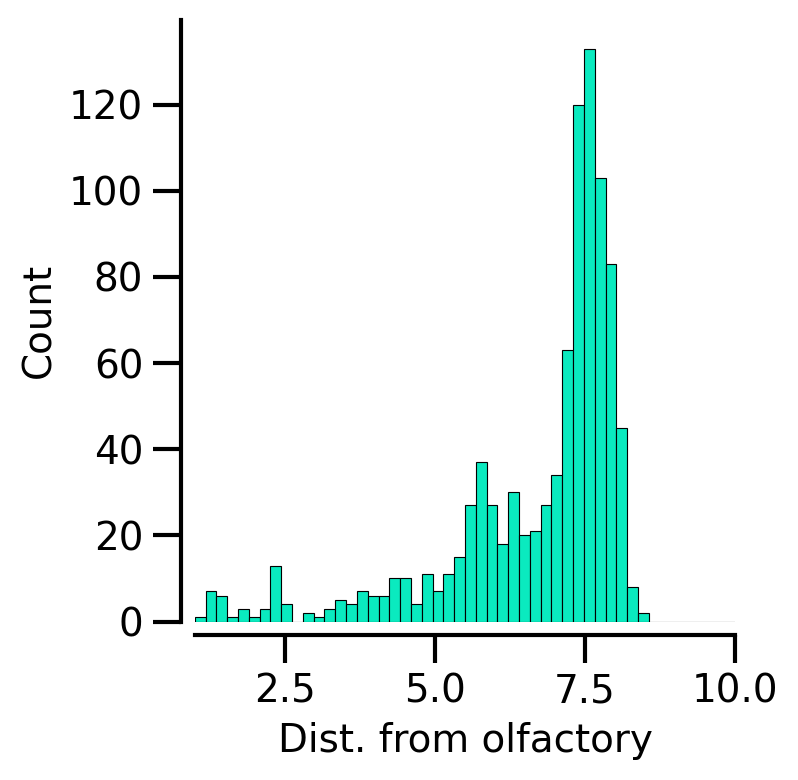

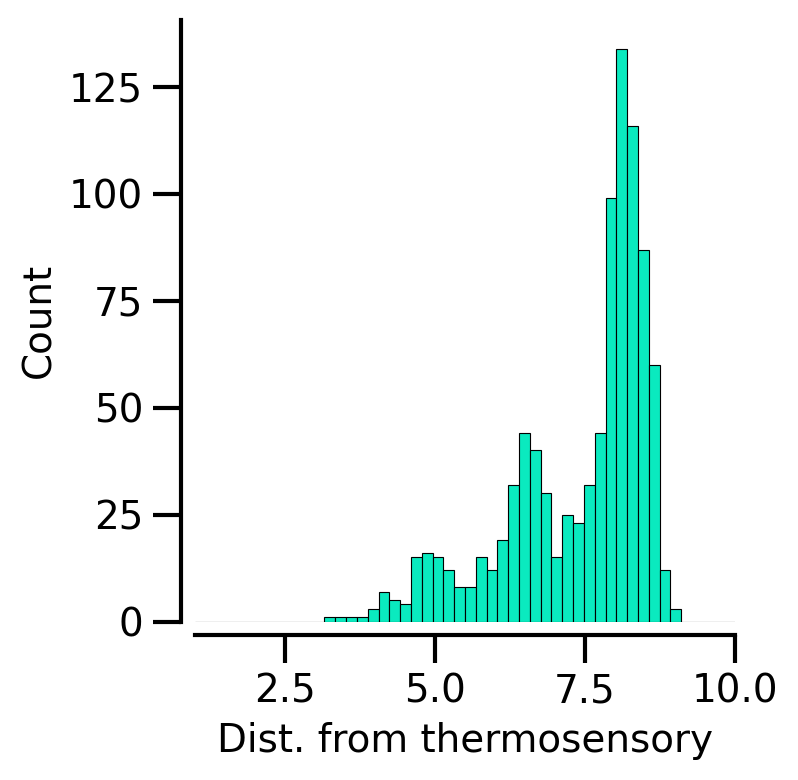

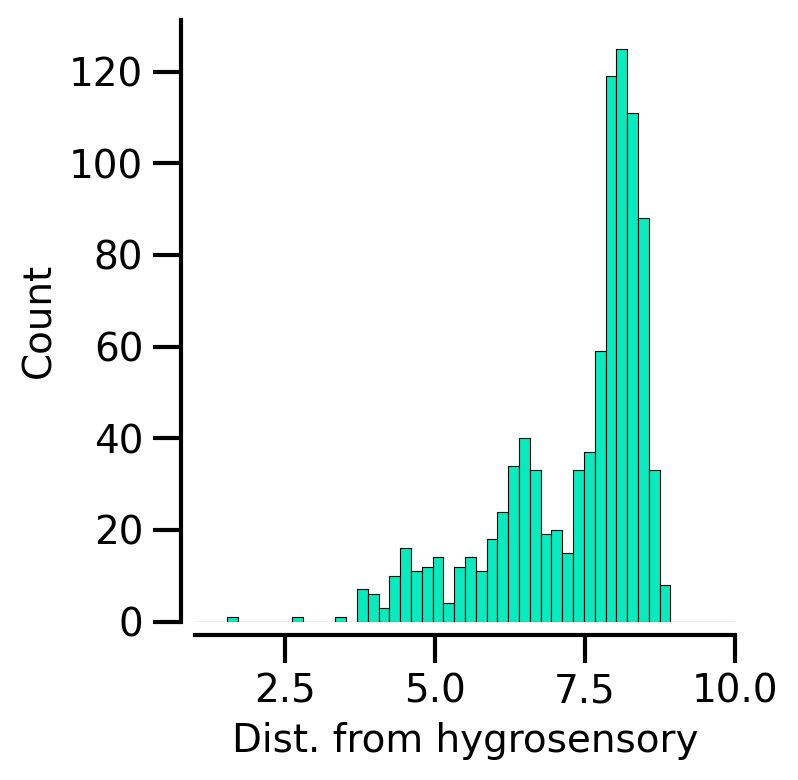

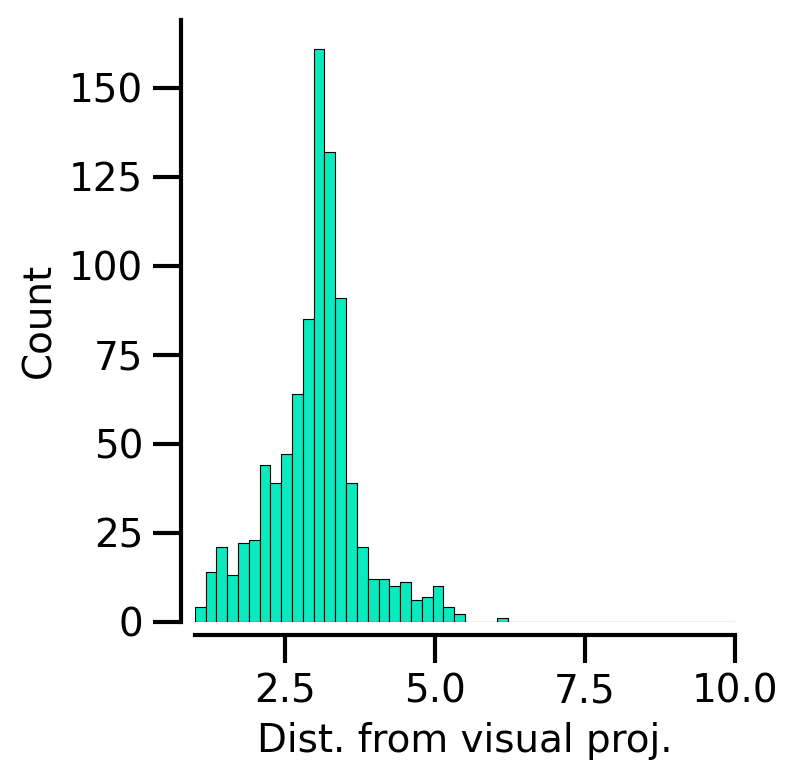

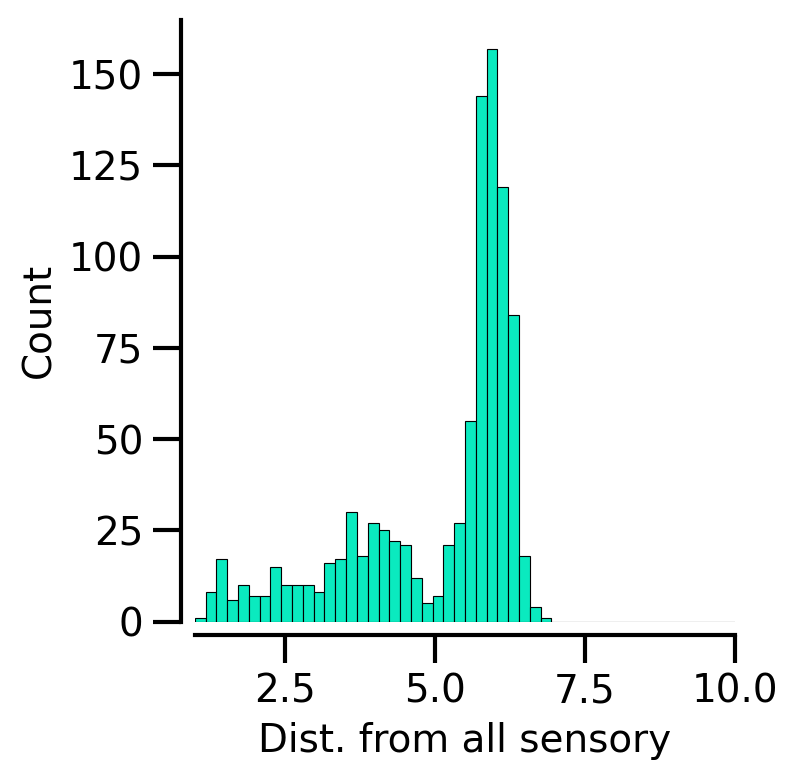

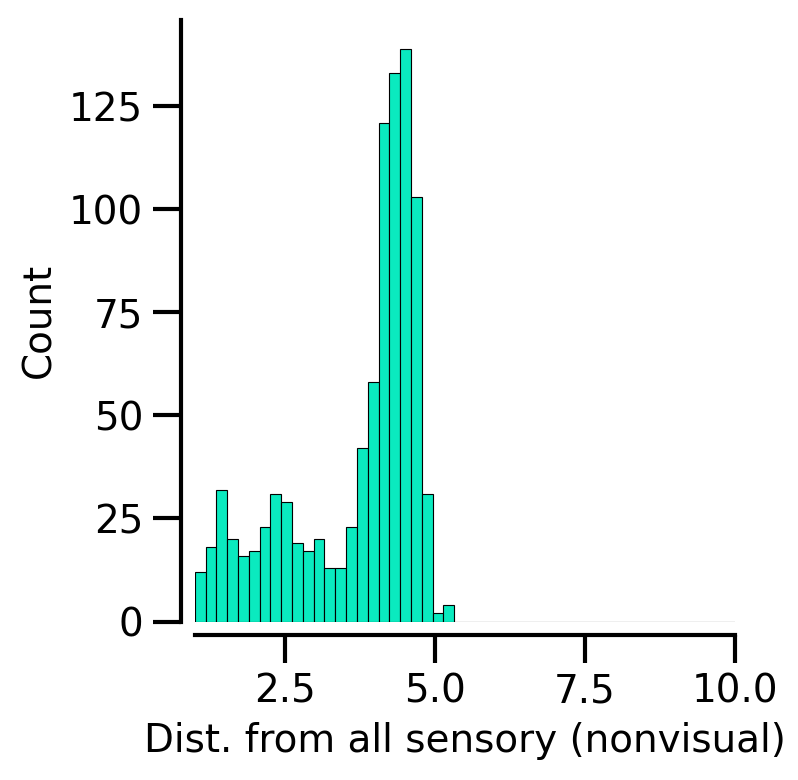

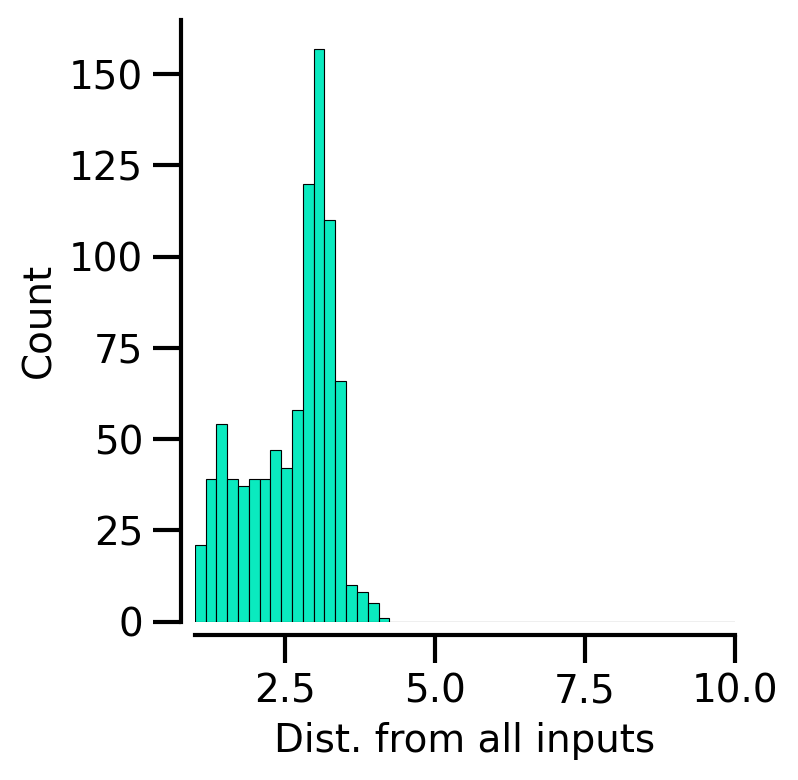

In [344]:
#Distance in hops broadcasters
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):

    col = f"{input_class}-{run}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    ranking_plot(rank_df[rank_df['root_id'].isin(broadcast_root_ids)], 
             col, broadcast_color,
             "count", [1, 10], 
            f"Dist. from {ic_label}", 
            "Count",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_broadcaster_hops.png")


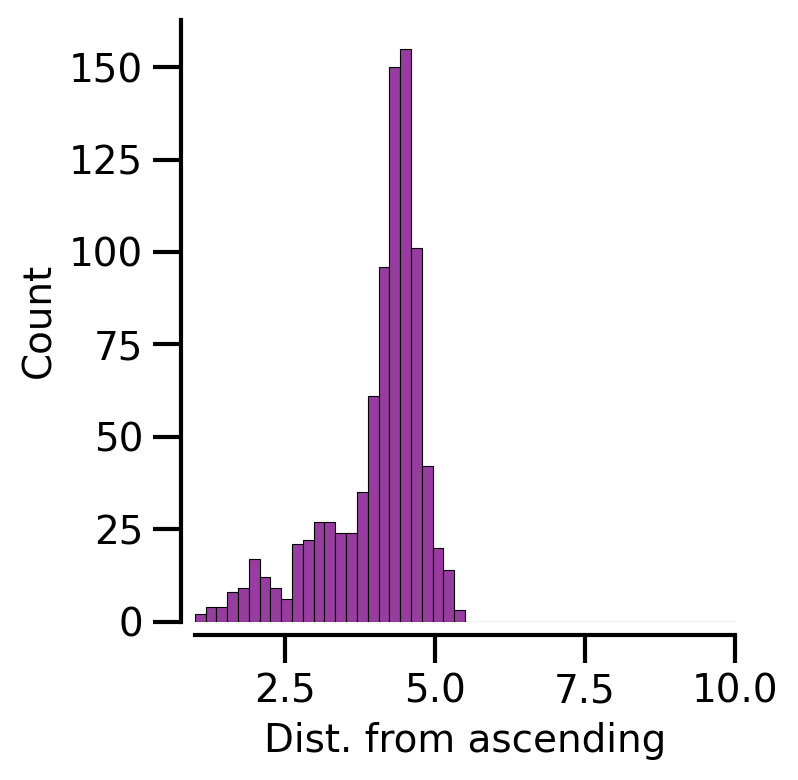

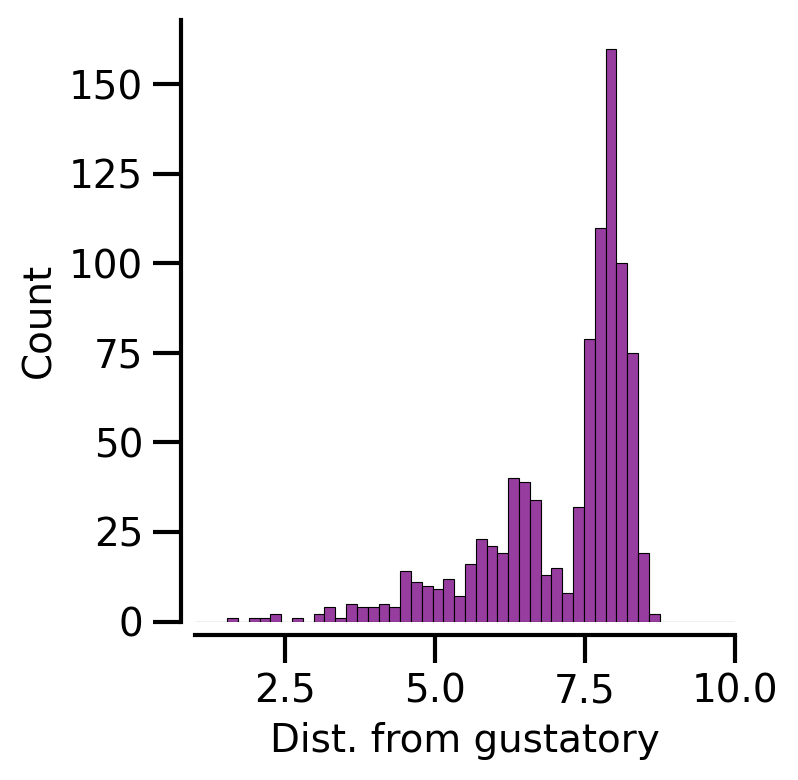

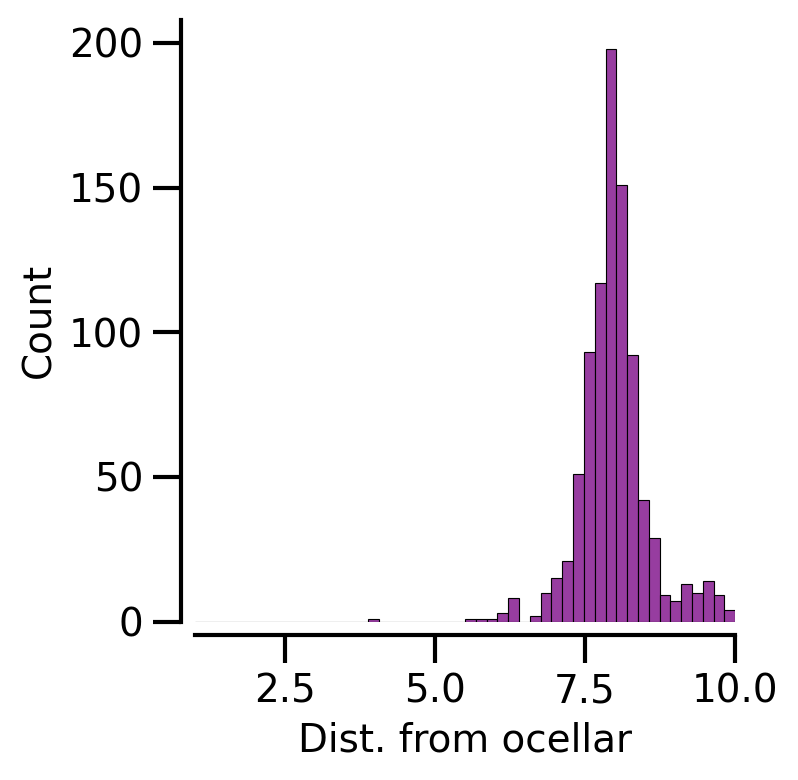

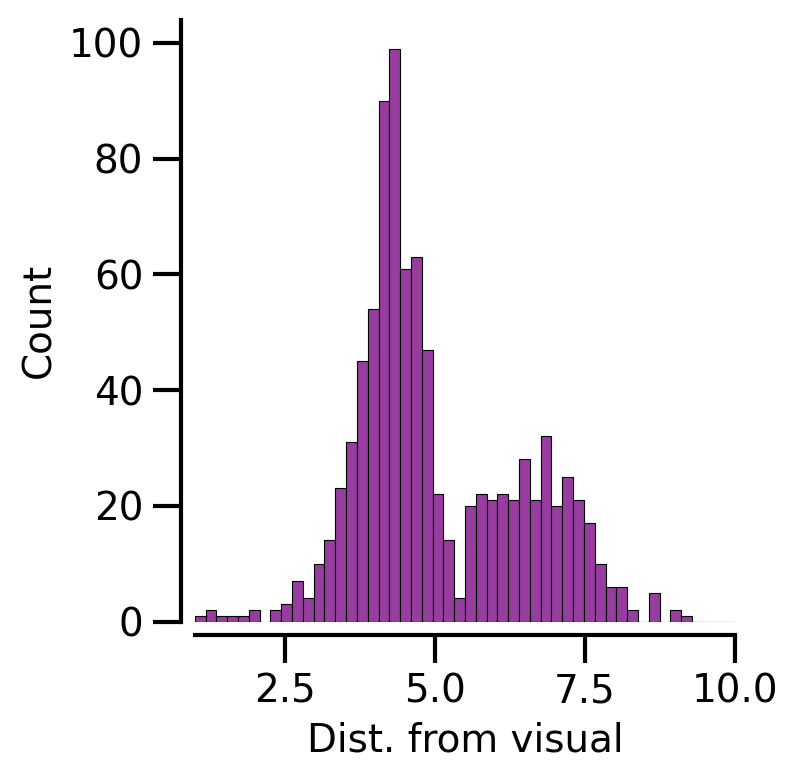

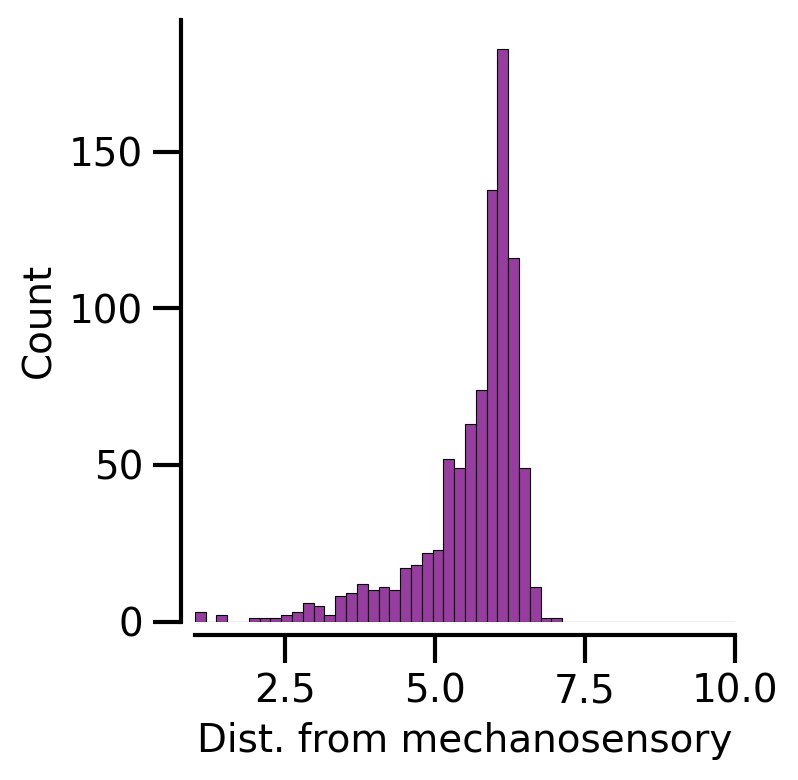

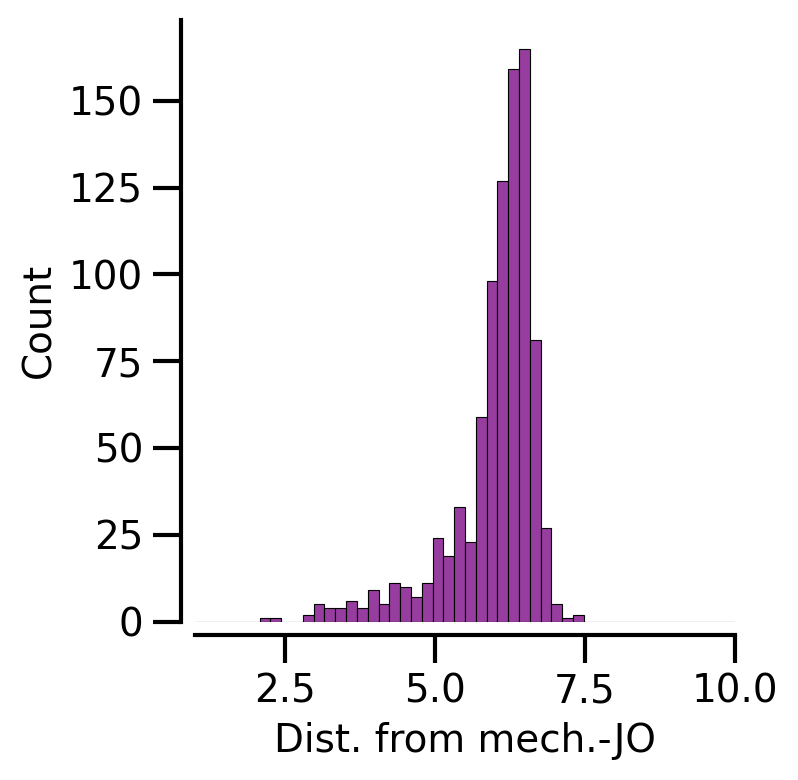

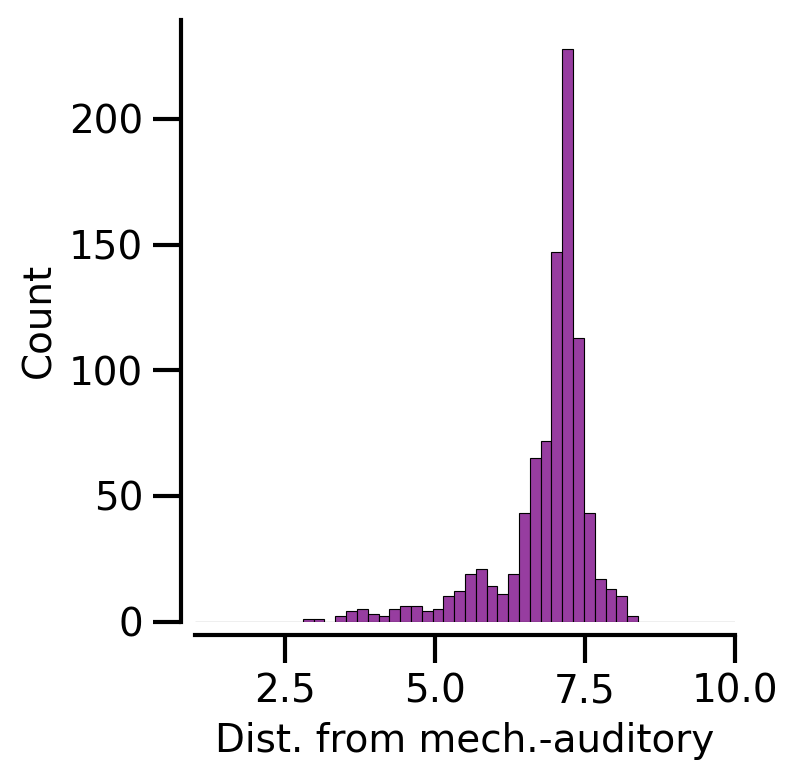

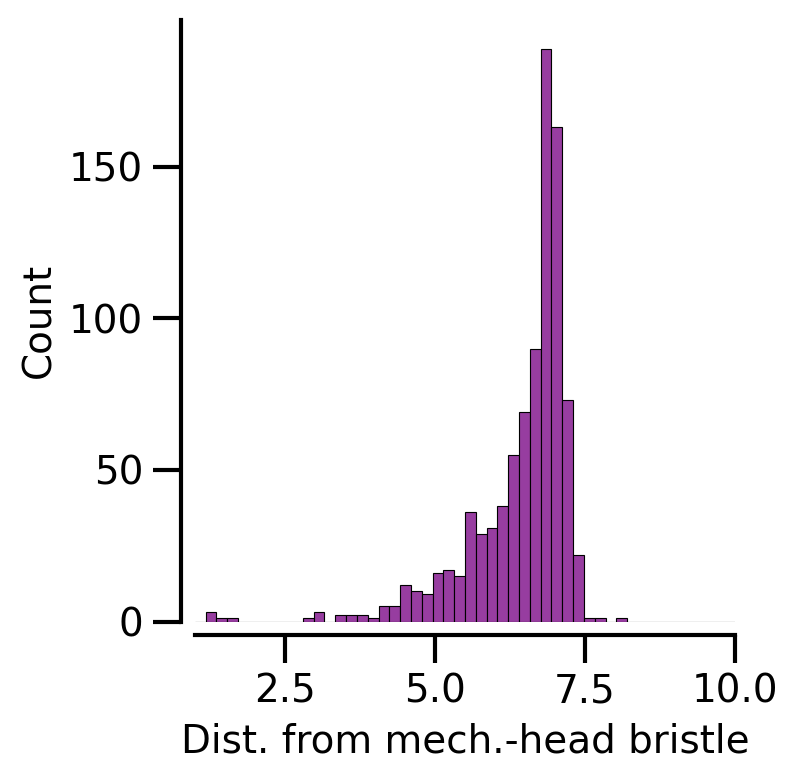

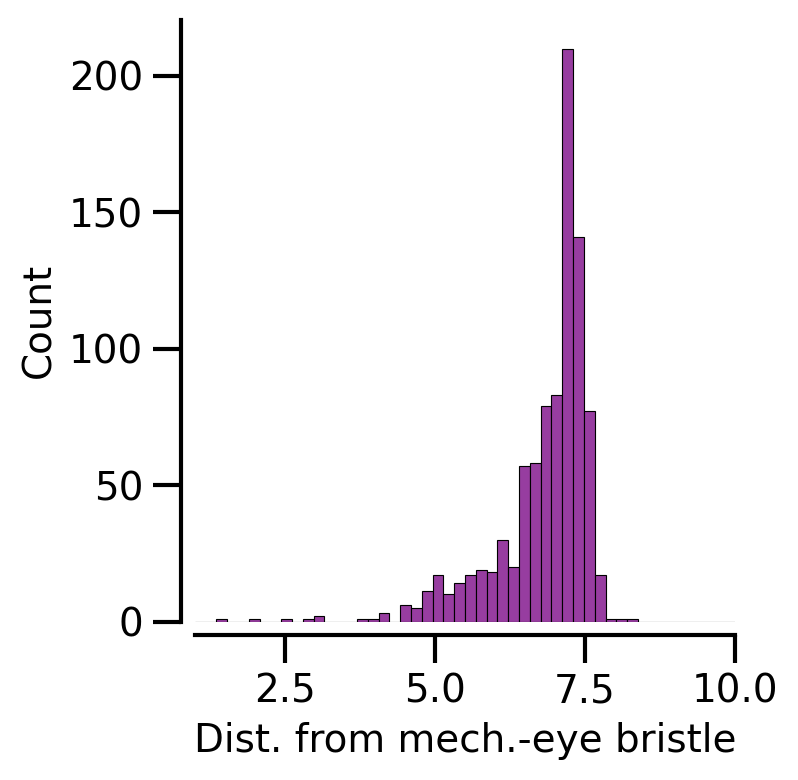

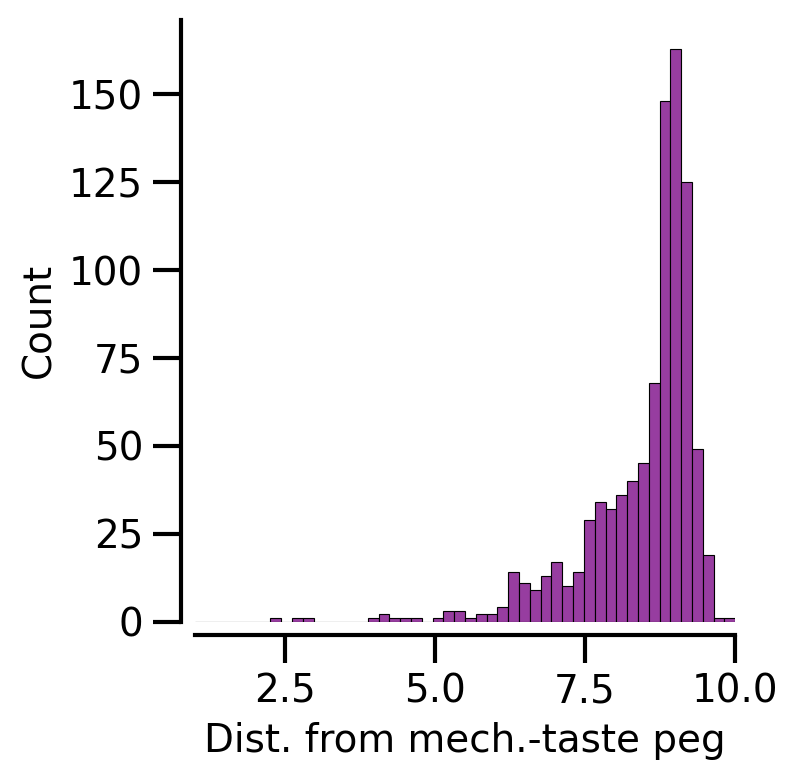

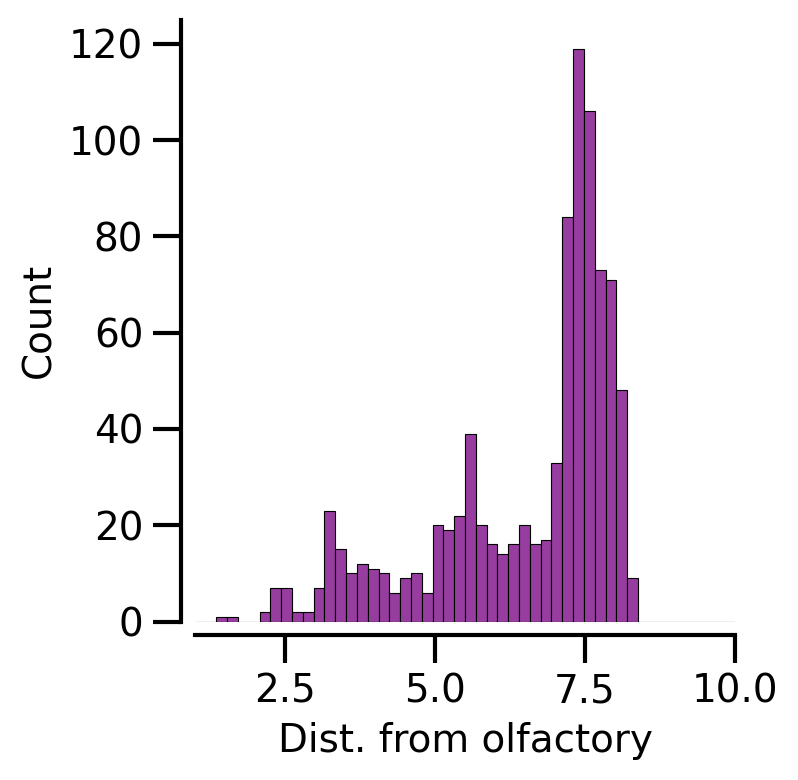

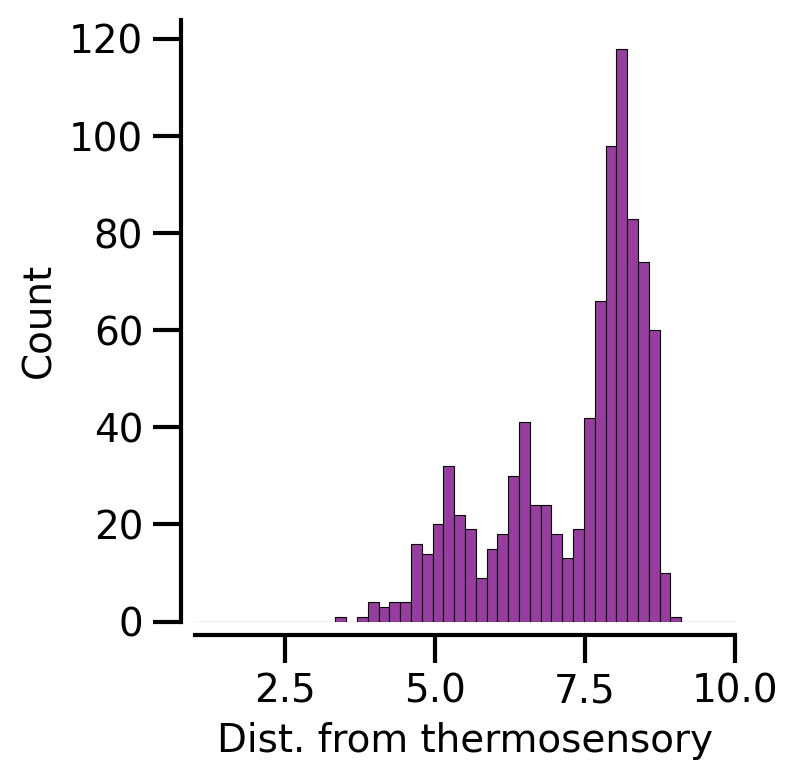

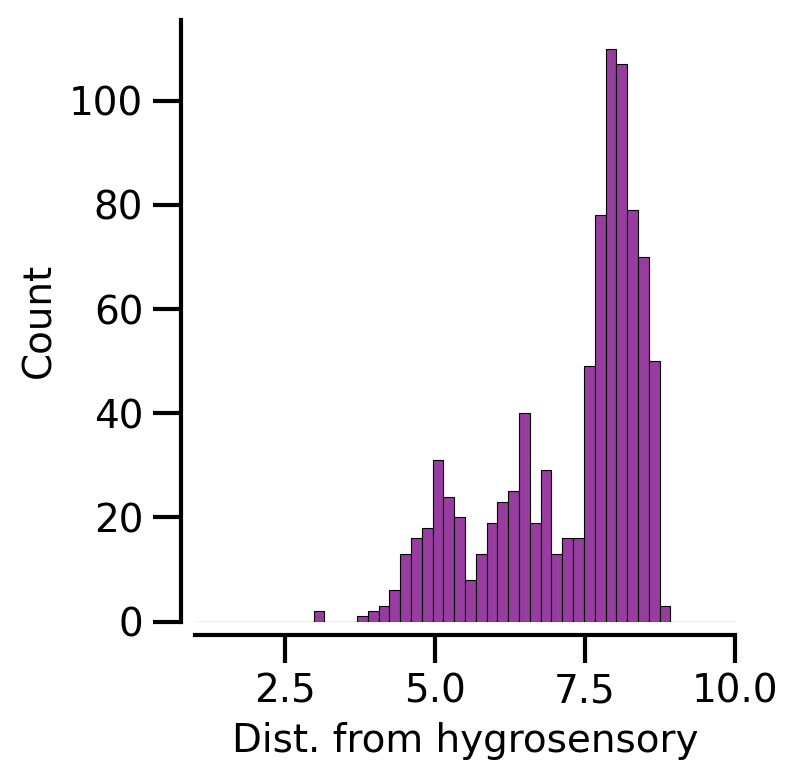

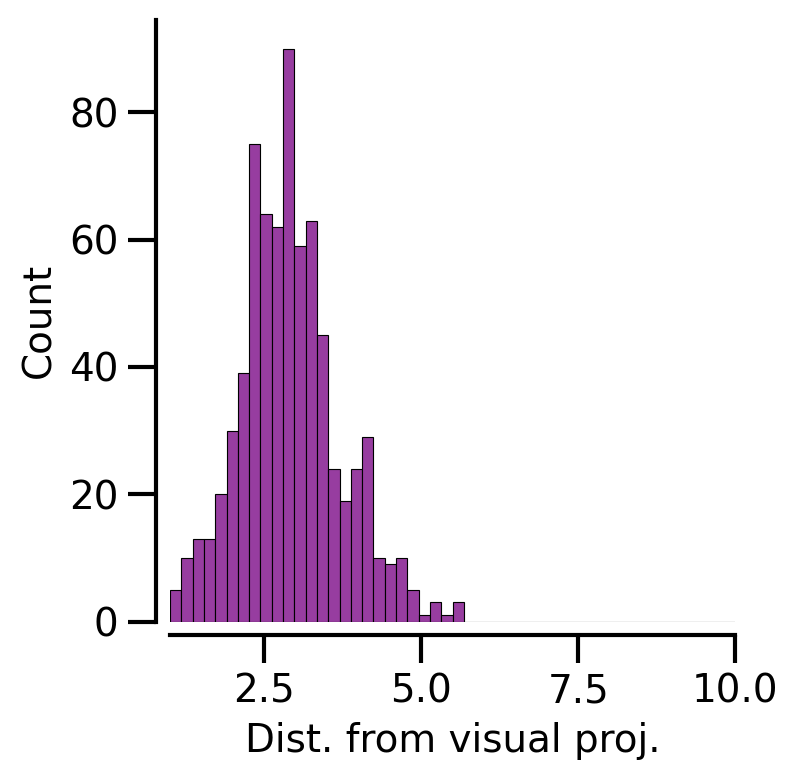

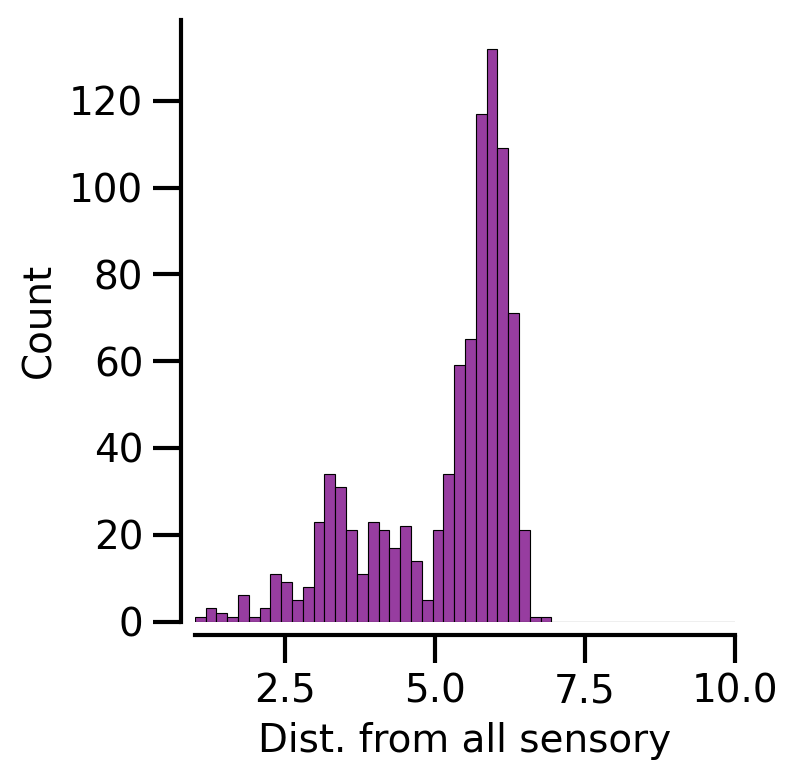

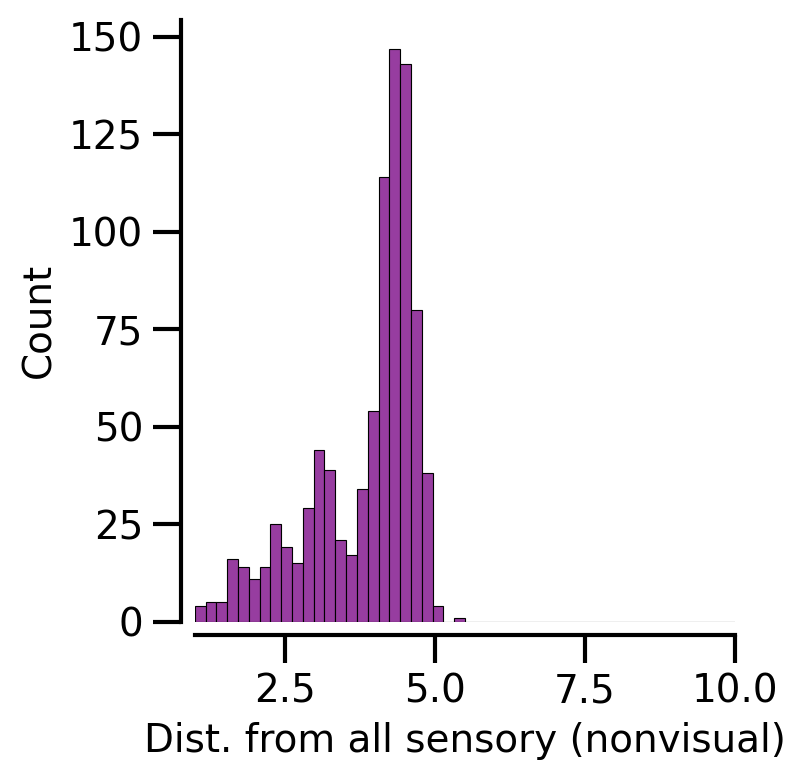

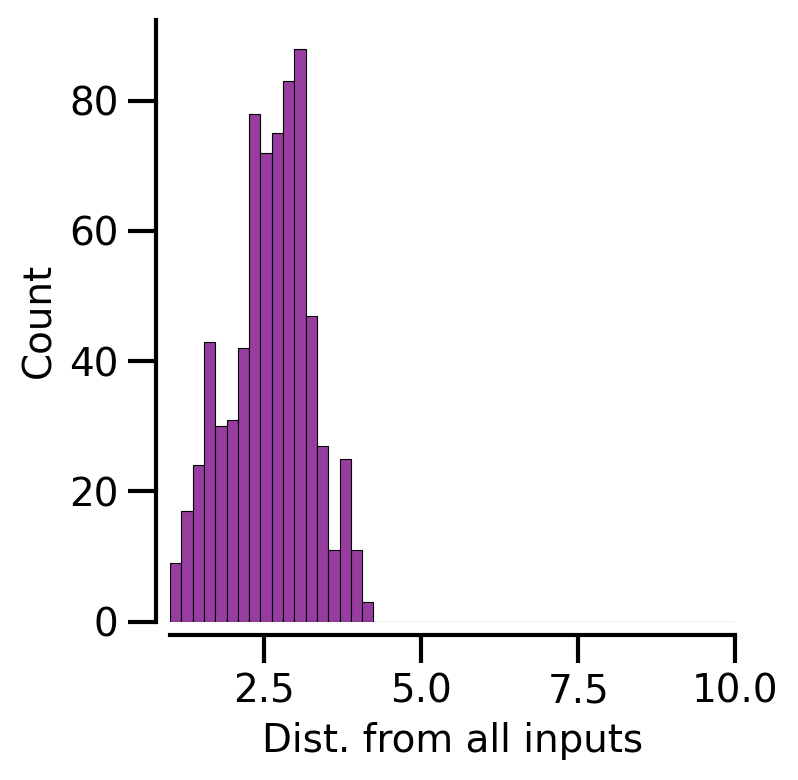

In [345]:
#Distance in hops integrators
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):

    col = f"{input_class}-{run}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    ranking_plot(rank_df[rank_df['root_id'].isin(integrate_root_ids)], 
             col, integrate_color,
             "count", [1, 10], 
            f"Dist. from {ic_label}", 
            "Count",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_integrate_hops.png")


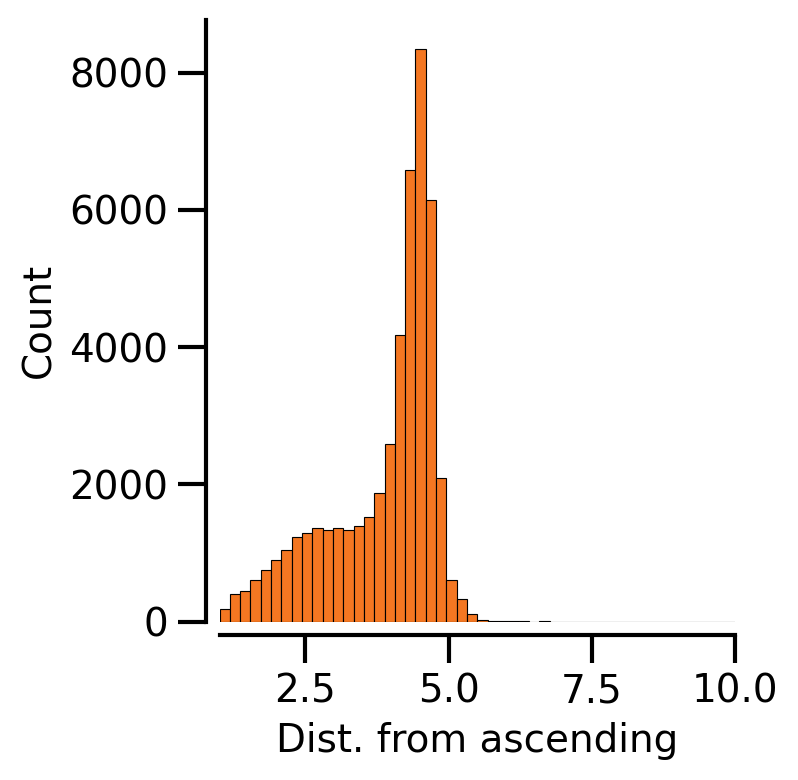

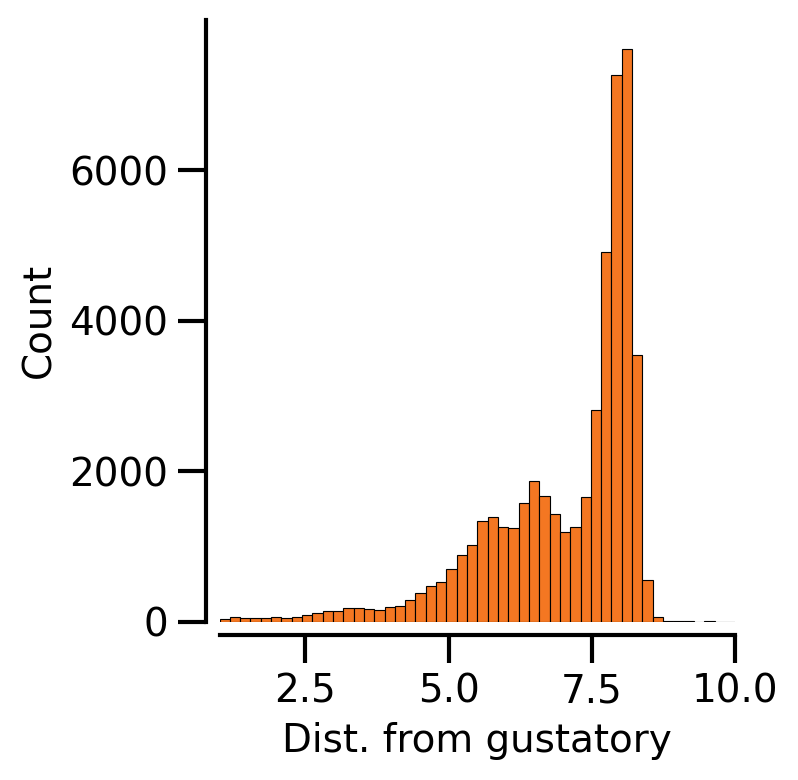

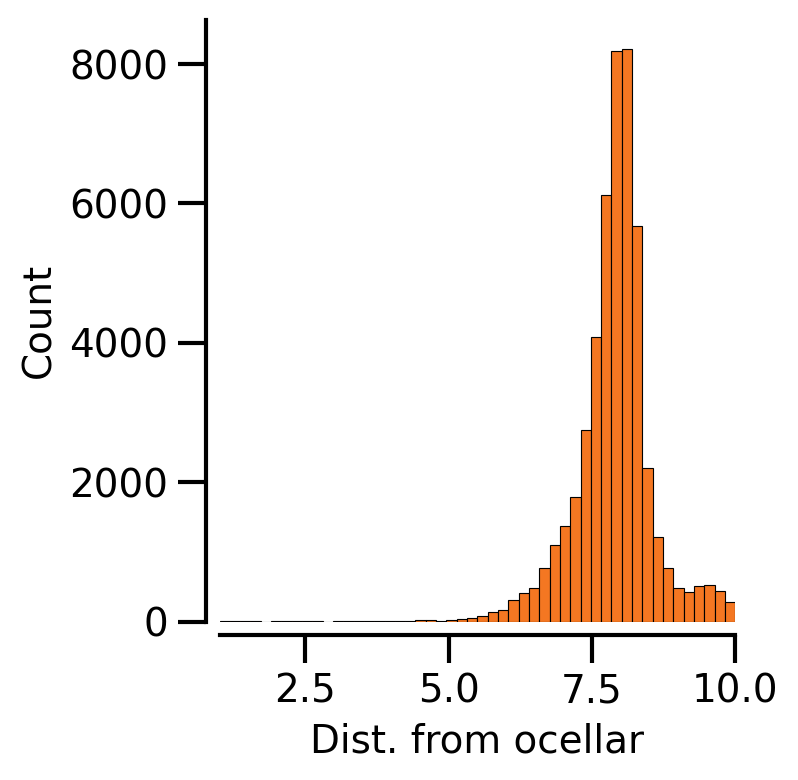

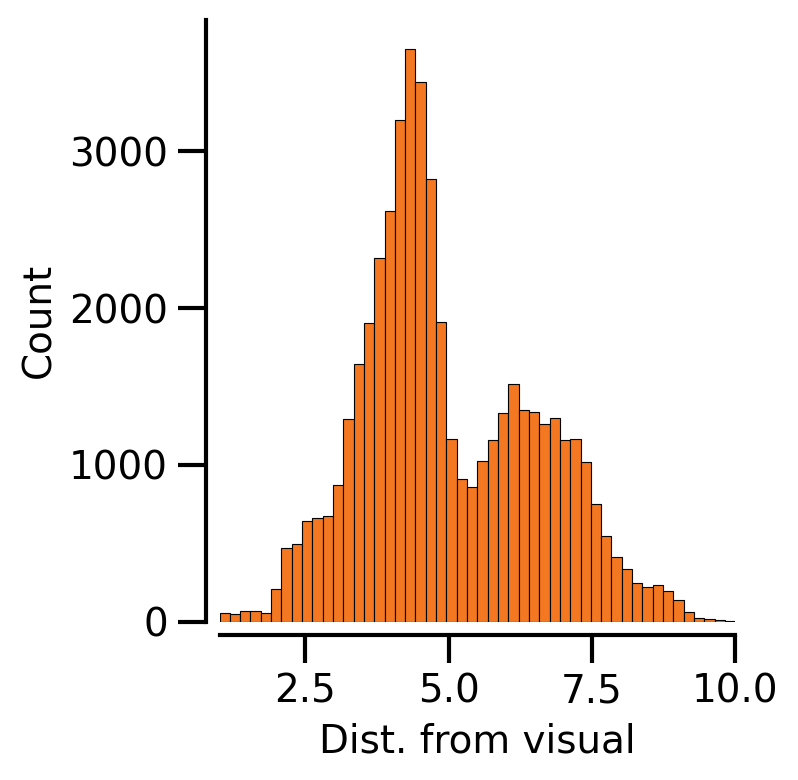

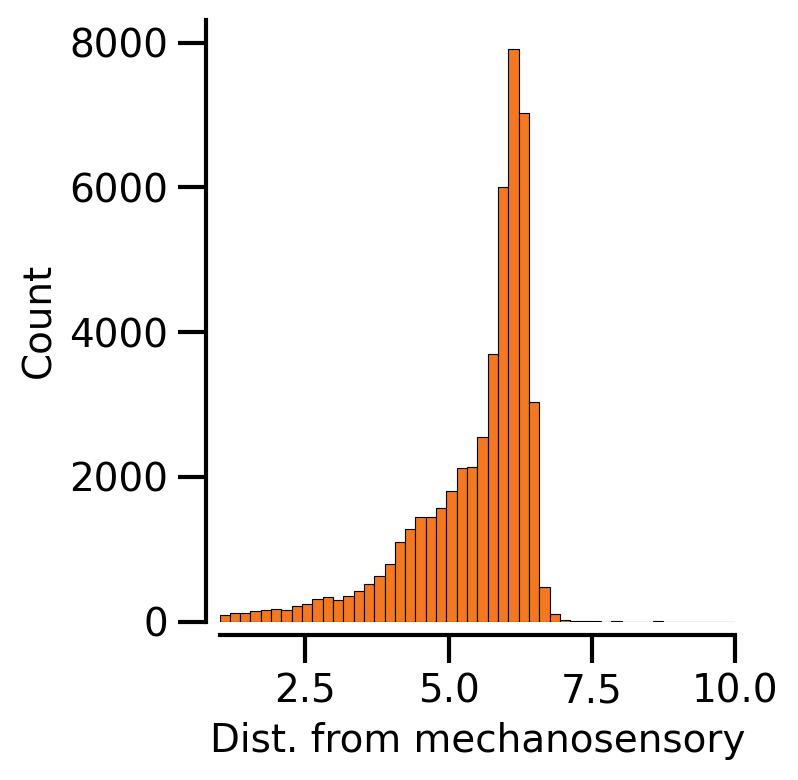

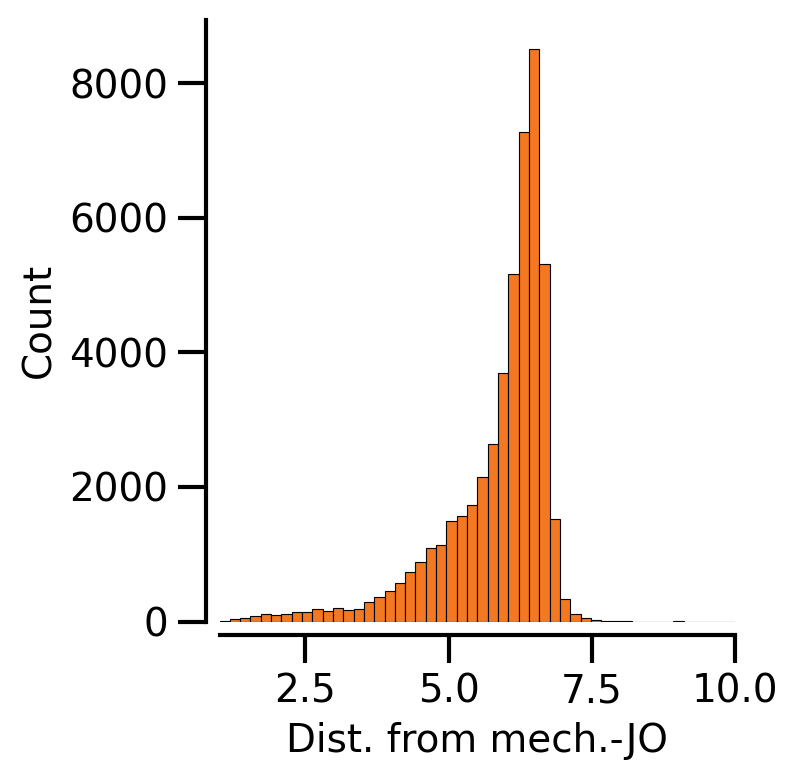

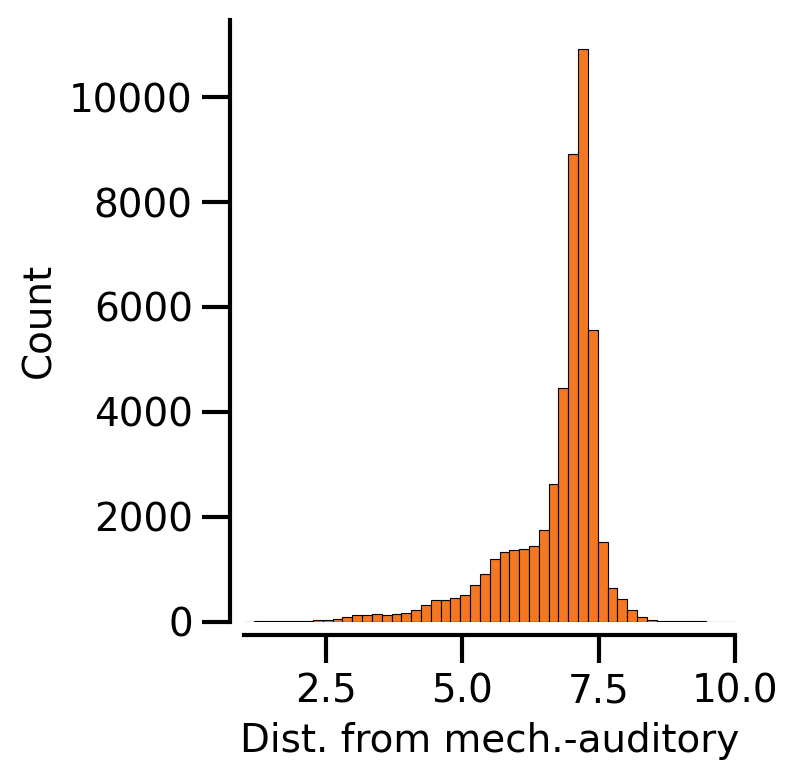

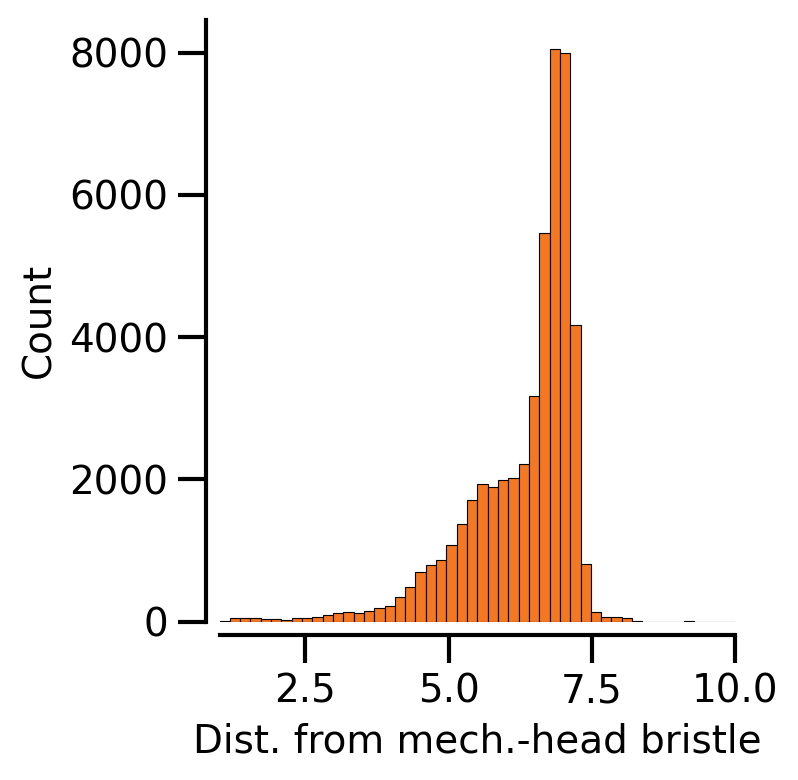

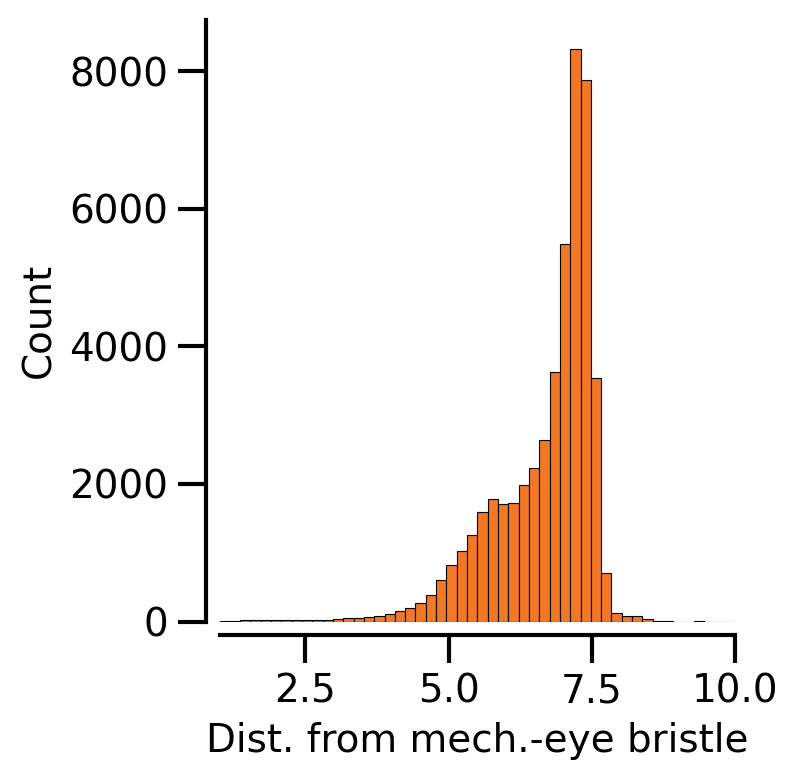

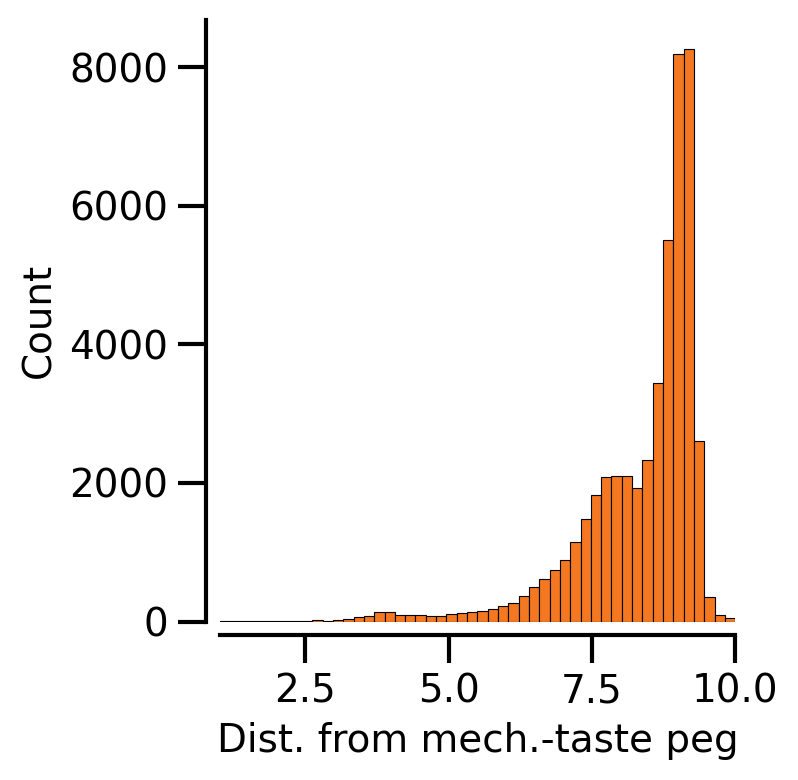

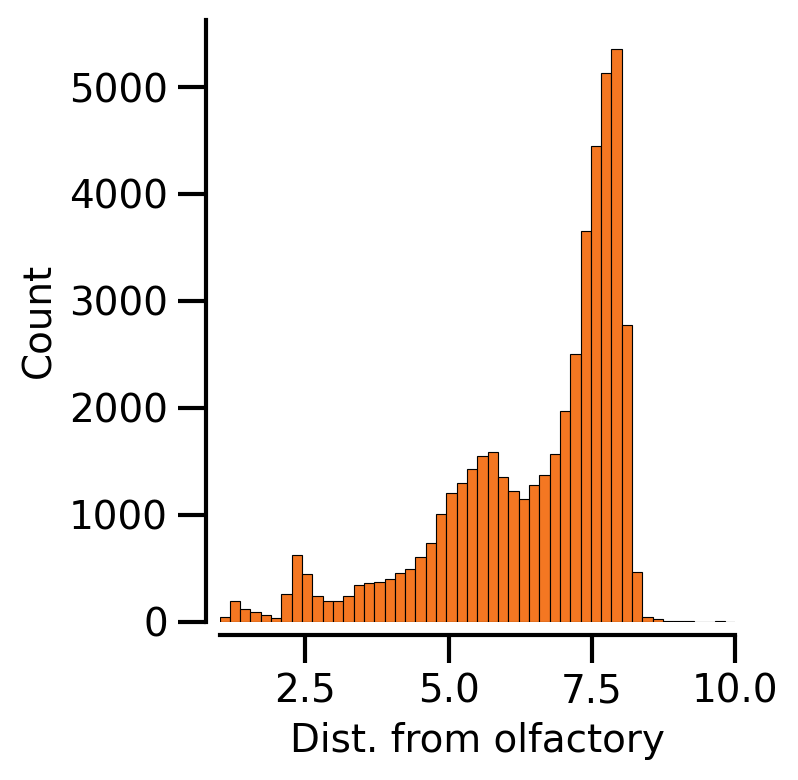

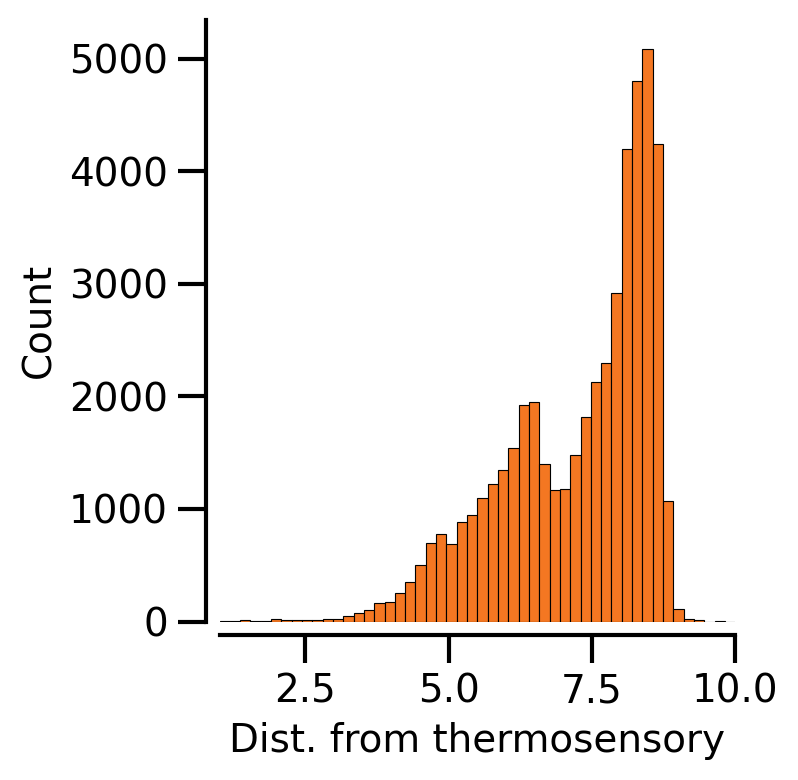

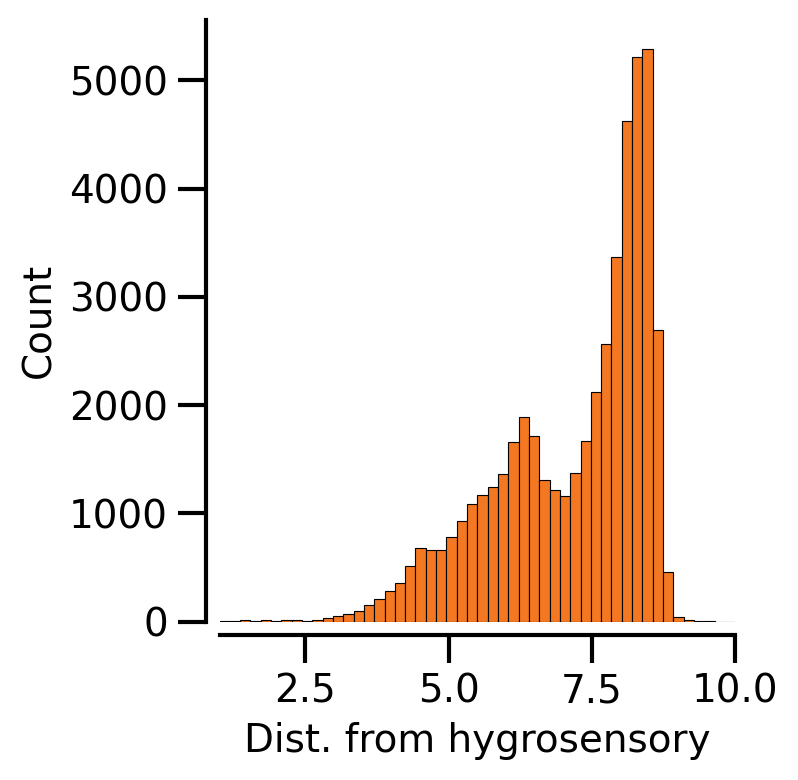

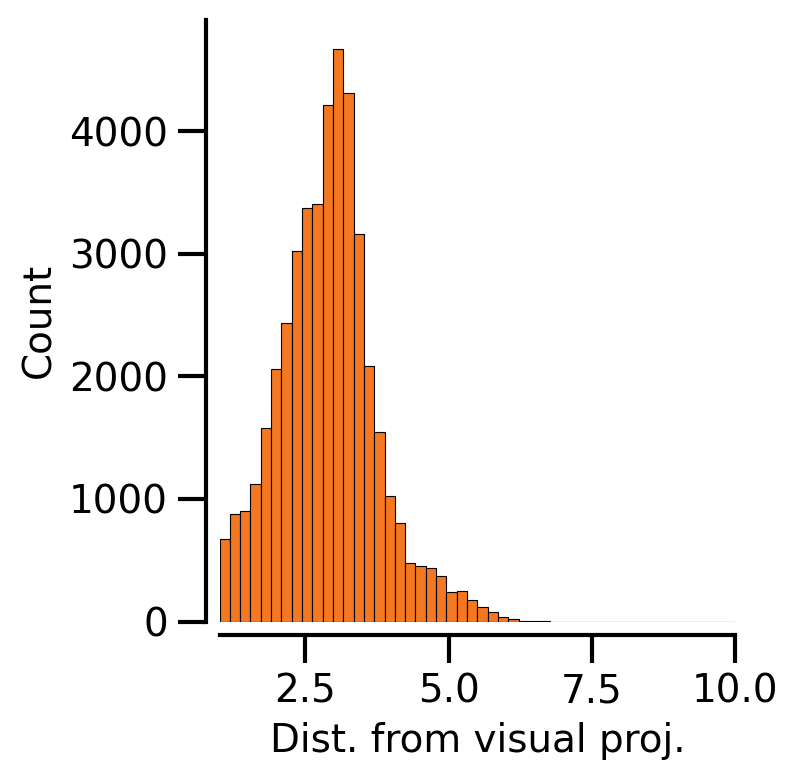

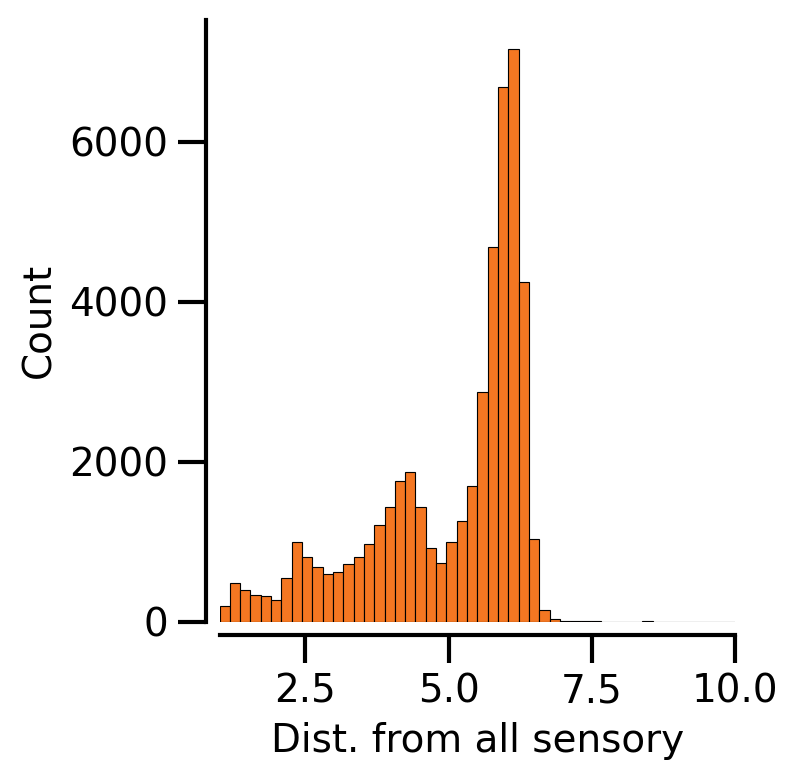

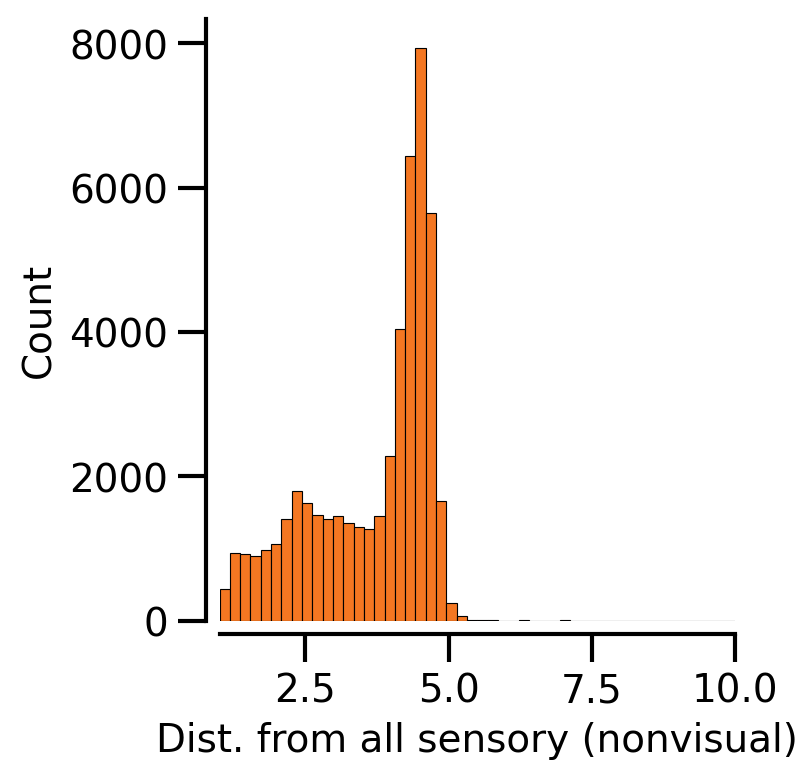

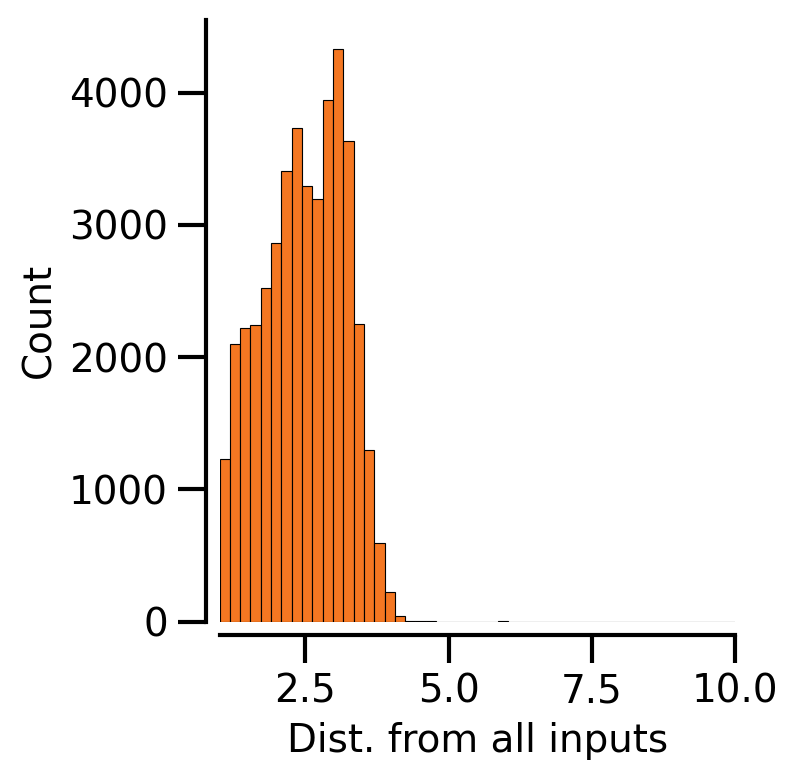

In [346]:
#Distance in hops all rich
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):

    col = f"{input_class}-{run}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    ranking_plot(rank_df[rank_df['root_id'].isin(rich_club_root_ids)], 
             col, rich_balanced_color,
             "count", [1, 10], 
            f"Dist. from {ic_label}", 
            "Count",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_rich_club_hops.png")


In [347]:
# compute matrix of averages


rich_club_rank_df = rank_df[rank_df['root_id'].isin(rich_club_root_ids)]
broadcast_rank_df = rank_df[rank_df['root_id'].isin(broadcast_root_ids)]
integrate_rank_df = rank_df[rank_df['root_id'].isin(integrate_root_ids)]

#print(rank_df.mean(axis=0))
#print("rich club")
#print(rich_club_rank_df.mean(axis=0))
#print("broadcast")
#print(broadcast_rank_df.mean(axis=0))
#print("integrate")
#print(integrate_rank_df.mean(axis=0))

allneuron_avg_rank = rank_df.mean(axis=0)[1:18].to_numpy()
rich_club_avg_rank = rich_club_rank_df.mean(axis=0)[1:18].to_numpy()
broadcast_avg_rank = broadcast_rank_df.mean(axis=0)[1:18].to_numpy()
integrate_avg_rank = integrate_rank_df.mean(axis=0)[1:18].to_numpy()

In [348]:
avg_rank = np.stack((rich_club_avg_rank,integrate_avg_rank,broadcast_avg_rank), axis=1)
avg_rank_all = np.stack((allneuron_avg_rank,rich_club_avg_rank,integrate_avg_rank,broadcast_avg_rank), axis=1)

norm_avg_rank = avg_rank/allneuron_avg_rank[:,None]


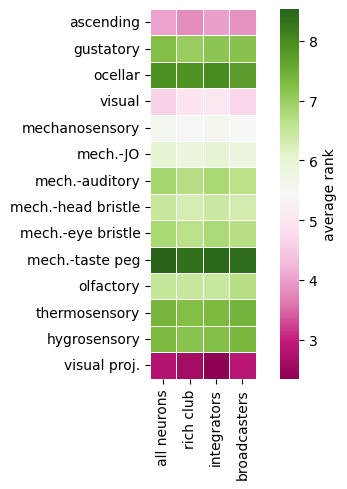

In [349]:
#heatmap for average rank

ax = sns.heatmap(avg_rank_all[0:14], linewidth=0.5,square=True,  cmap="PiYG", cbar_kws={'label': 'average rank'},
                 xticklabels = ["all neurons","rich club", "integrators", "broadcasters"], 
                 yticklabels = input_class_labels[0:14])



out_path=f"{fig_dir}/"+"avg_rank_heatmap.png"
plt.savefig(out_path, dpi=300, bbox_inches = "tight")
plt.savefig(f"{out_path[:-4]}.pdf", bbox_inches = "tight")

plt.show()

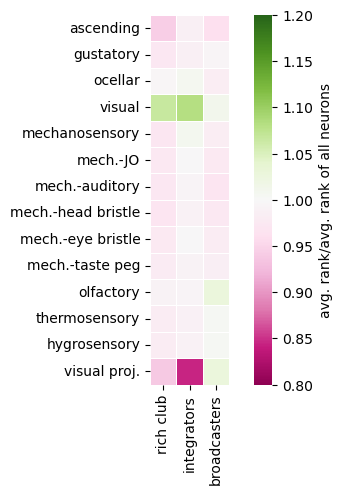

In [351]:

divnorm = TwoSlopeNorm(vmin=0.8, vcenter=1, vmax=1.20001)

ax = sns.heatmap(norm_avg_rank[0:14], linewidth=0.5,square=True,  cmap="PiYG", norm=divnorm, cbar_kws={'label': 'avg. rank/avg. rank of all neurons'},
                 xticklabels = ["rich club", "integrators", "broadcasters"], yticklabels = input_class_labels[0:14])

out_path=f"{fig_dir}/"+"norm_avg_rank_heatmap.png"
plt.savefig(out_path, dpi=300, bbox_inches = "tight")
plt.savefig(f"{out_path[:-4]}.pdf", bbox_inches = "tight")
plt.show()

In [352]:
# work on percentile rank
in_classes = np.array(input_classes[:])
#out_classes = ["descending", "endocrine", "motor", "visual_centrifugal"]

run = "10000"
ranking_nt = "all"

rank_plot_df = rank_df.copy()

cols = [f"{c}-{run}" for c in in_classes]
rank_plot_df.rename(columns={col: c for col, c in zip(cols, in_classes)}, inplace=True)
cols = in_classes

rank_plot_df[cols] = rank_plot_df[cols].fillna(20)
for col in in_classes:
    rank_plot_df[col] = np.argsort(np.argsort(rank_plot_df[col])) / len(rank_plot_df[col])

In [353]:
def rankperc_plot(df, x_col, color_set, stat, xlim, xlabel, ylabel, ylim=None, kde=False, alpha=1., out_path=None,
                 nbins=25, figsize=(4, 4), use_steps=False):
    fig = plt.figure(figsize=figsize, facecolor="white", dpi=200)
    plt.tick_params(length=10, width=1.5, labelsize=14)
    
    bins = np.linspace(*xlim, nbins + 1)
    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.histplot(data=df,
                 x=x_col, 
                 color=color_set, 
                 #palette=cam_color_map,
                 alpha=alpha, 
                 kde=kde,
                 stat=stat,
                 bins=bins,
                 common_norm=False,
                 legend=False,
                 element="step" if use_steps else "bars",
                 fill=~use_steps,
                 lw=3 if use_steps else None,
                )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlim(*xlim)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    sns.despine(ax=ax, offset=5, trim=False)
    
    plt.tight_layout()
    if out_path is not None:
        if out_path.endswith(".png"):
            plt.savefig(out_path, dpi=300, bbox_inches = "tight")
            plt.savefig(f"{out_path[:-4]}.pdf", bbox_inches = "tight")

    plt.show()

In [354]:
rich_club_rankperc_df = rank_plot_df[rank_plot_df['root_id'].isin(rich_club_root_ids)]
broadcast_rankperc_df = rank_plot_df[rank_plot_df['root_id'].isin(broadcast_root_ids)]
integrate_rankperc_df = rank_plot_df[rank_plot_df['root_id'].isin(integrate_root_ids)]

rich_club_avg_perc = rich_club_rankperc_df.mean(axis=0)[1:18].to_numpy()
broadcast_avg_perc = broadcast_rankperc_df.mean(axis=0)[1:18].to_numpy()
integrate_avg_perc = integrate_rankperc_df.mean(axis=0)[1:18].to_numpy()

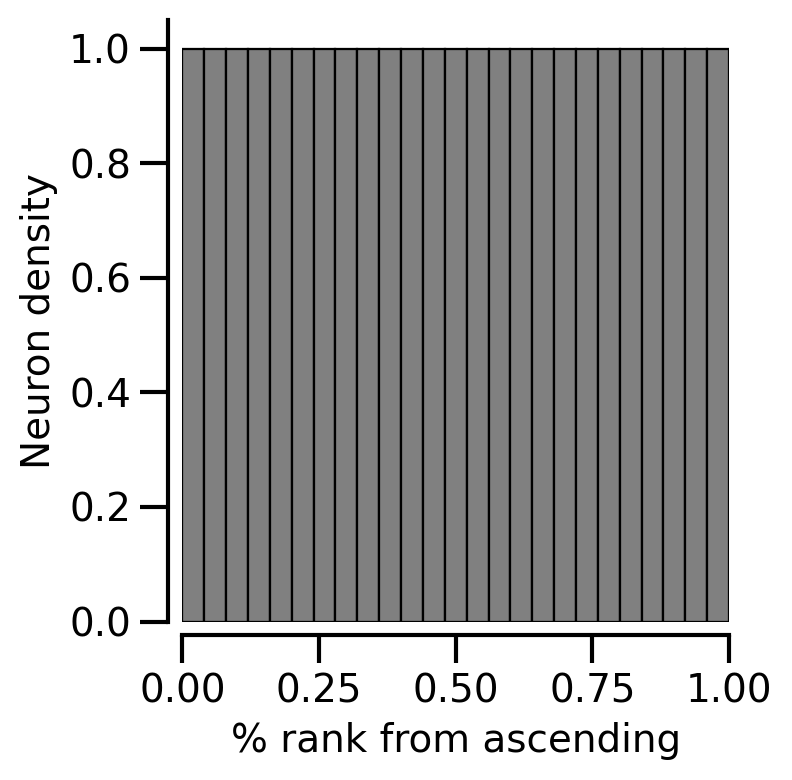

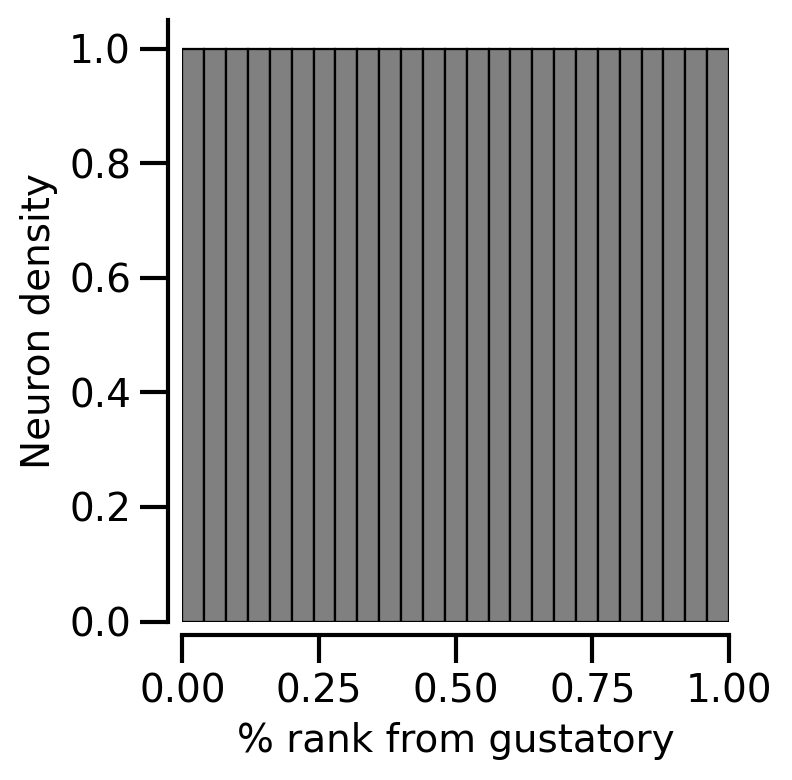

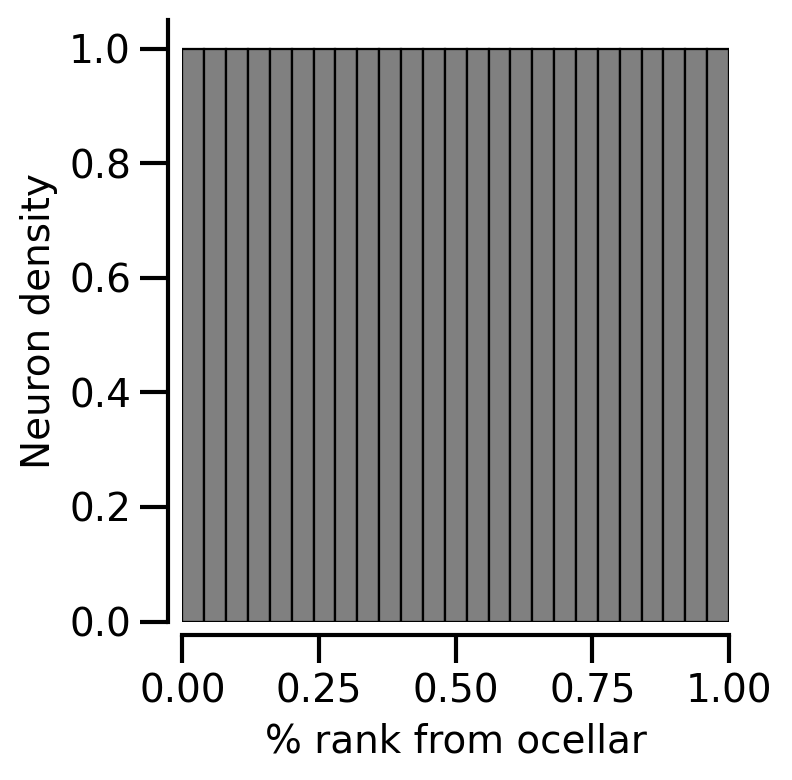

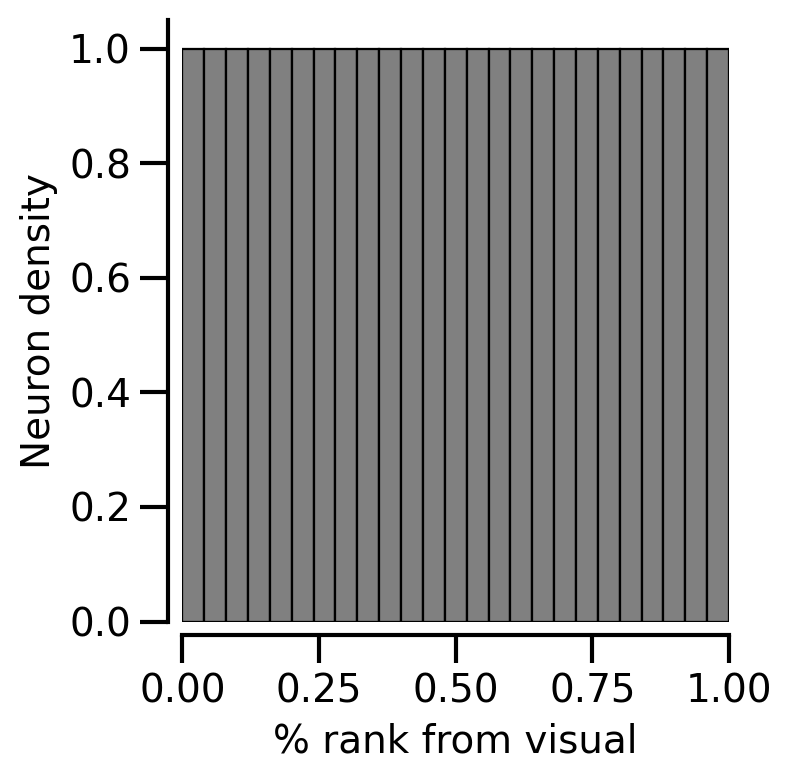

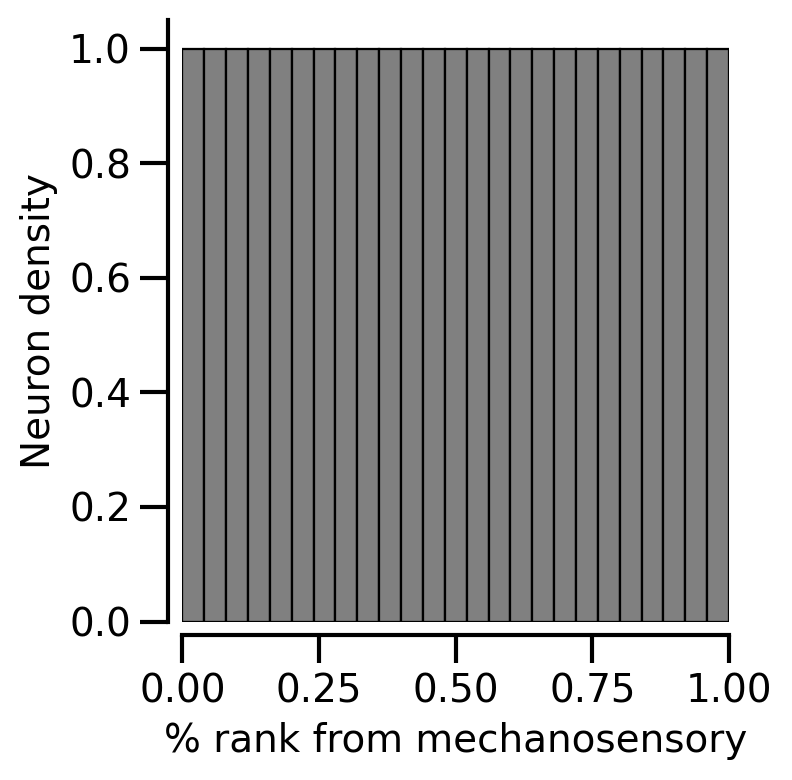

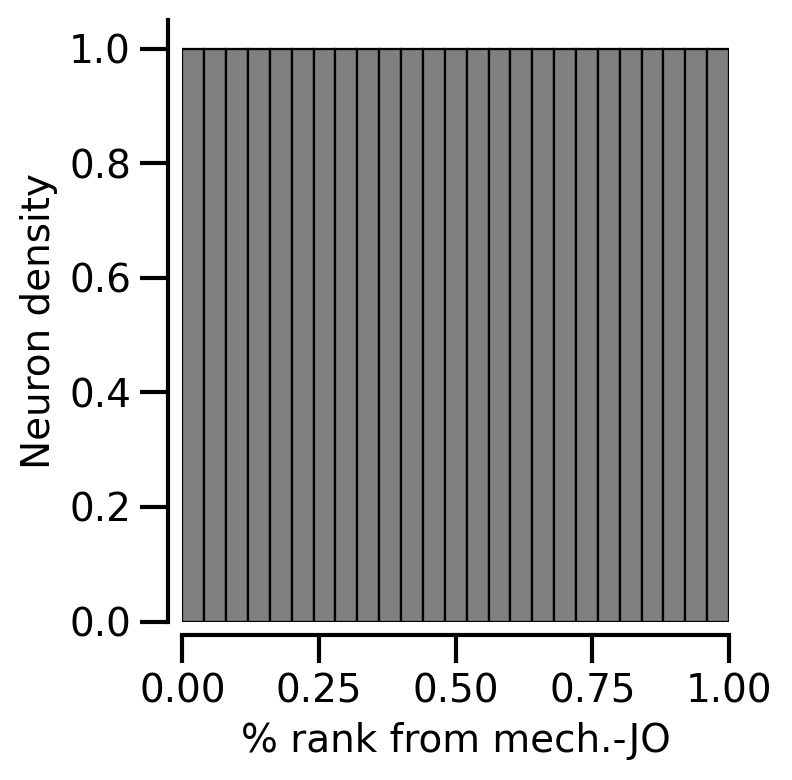

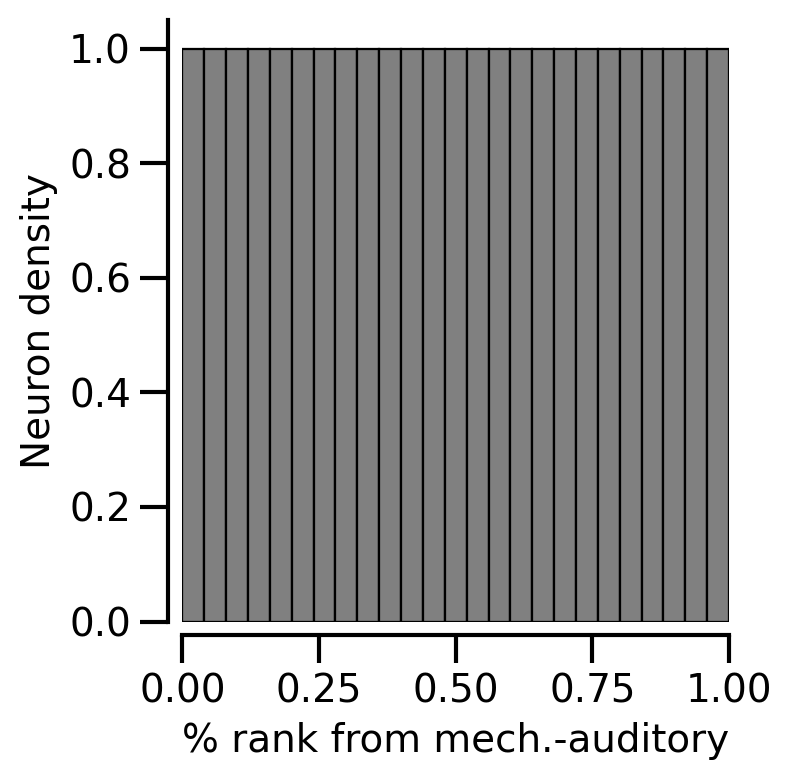

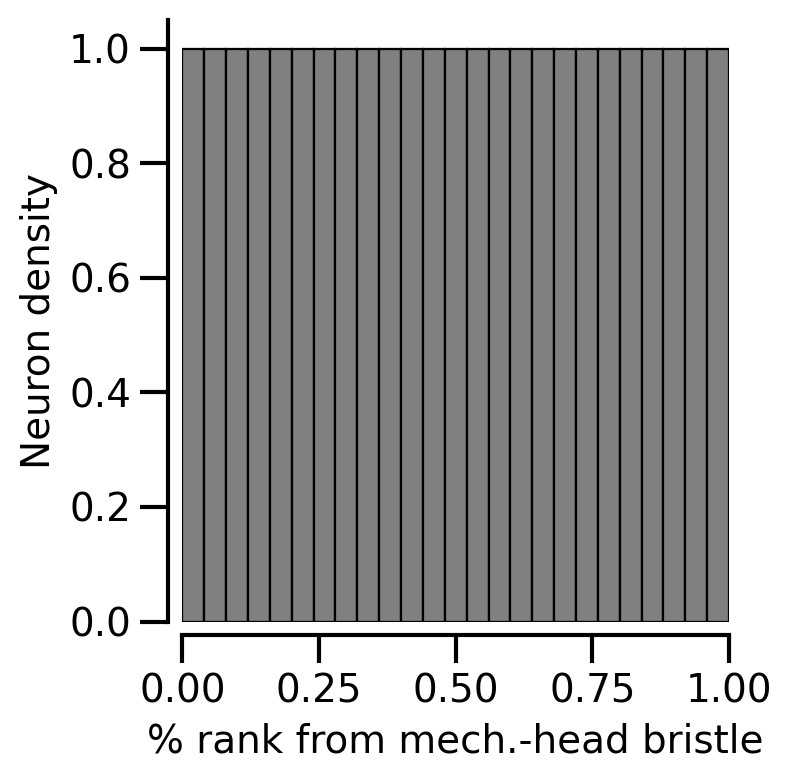

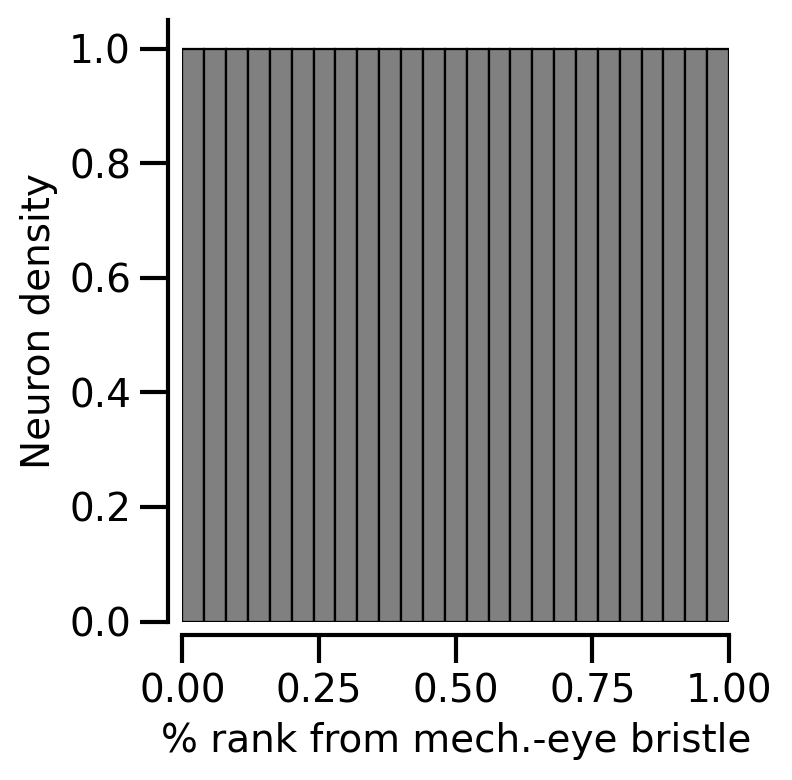

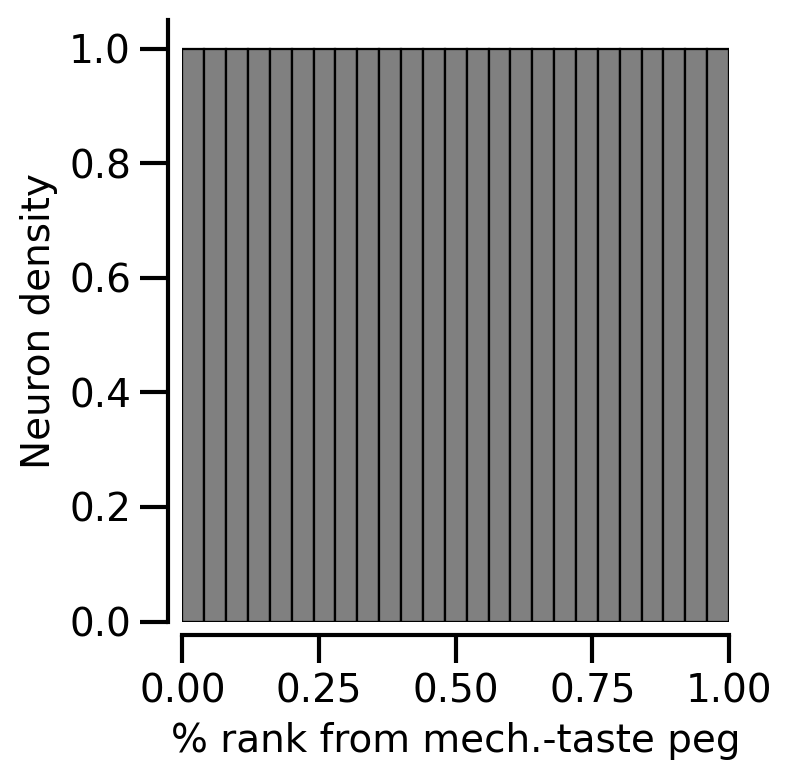

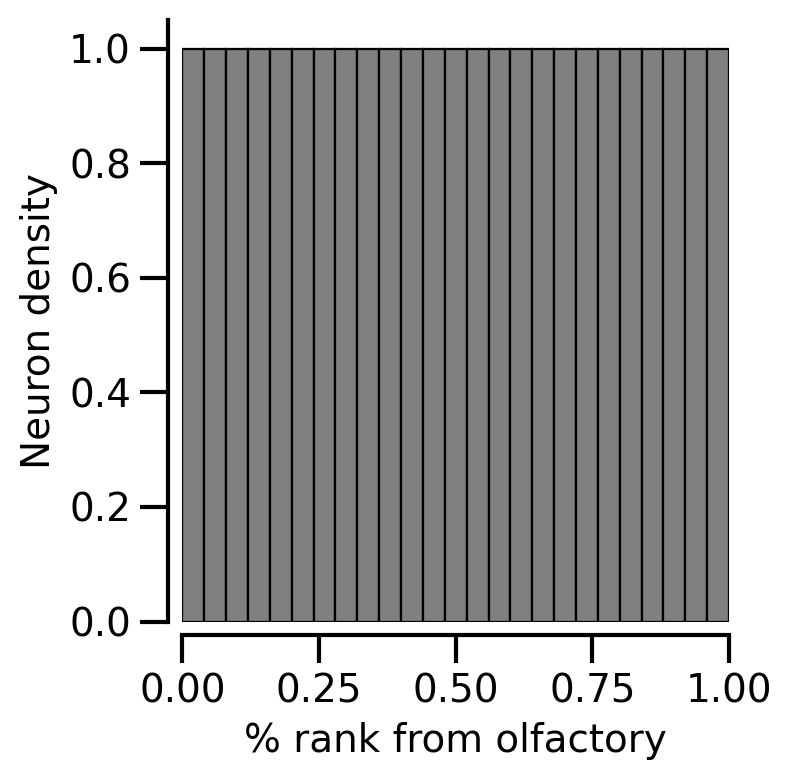

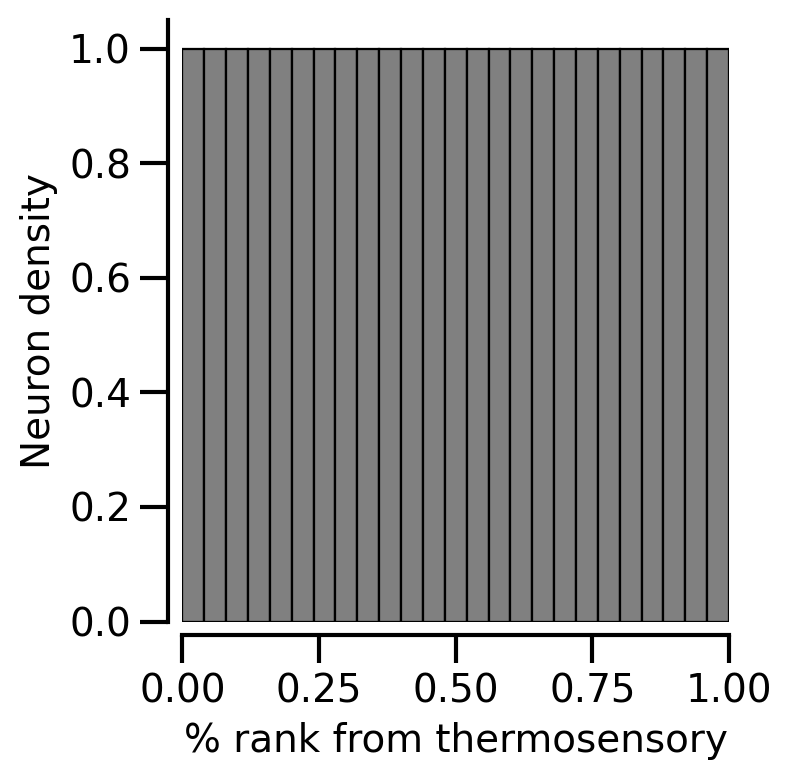

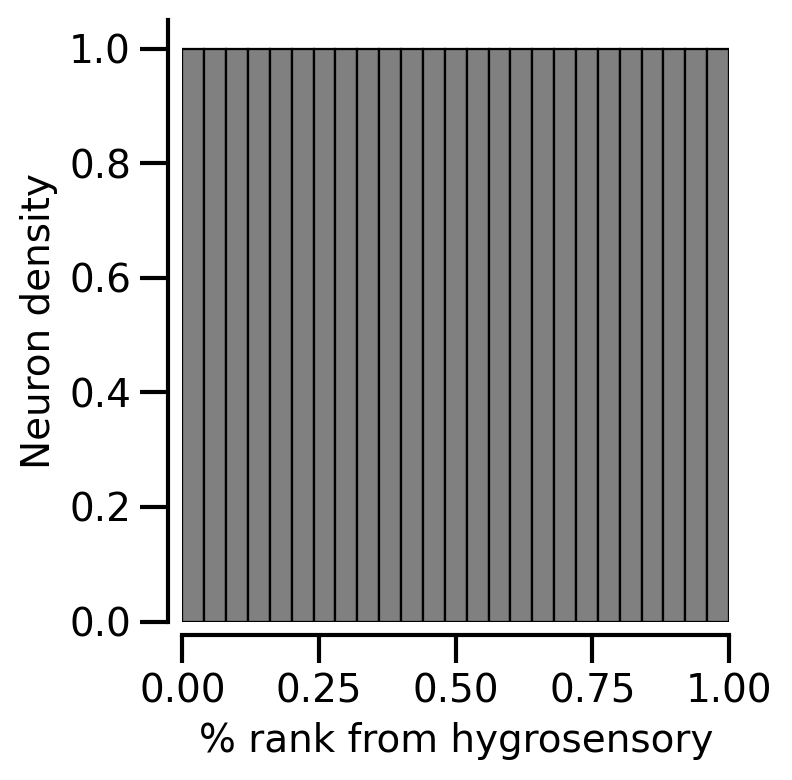

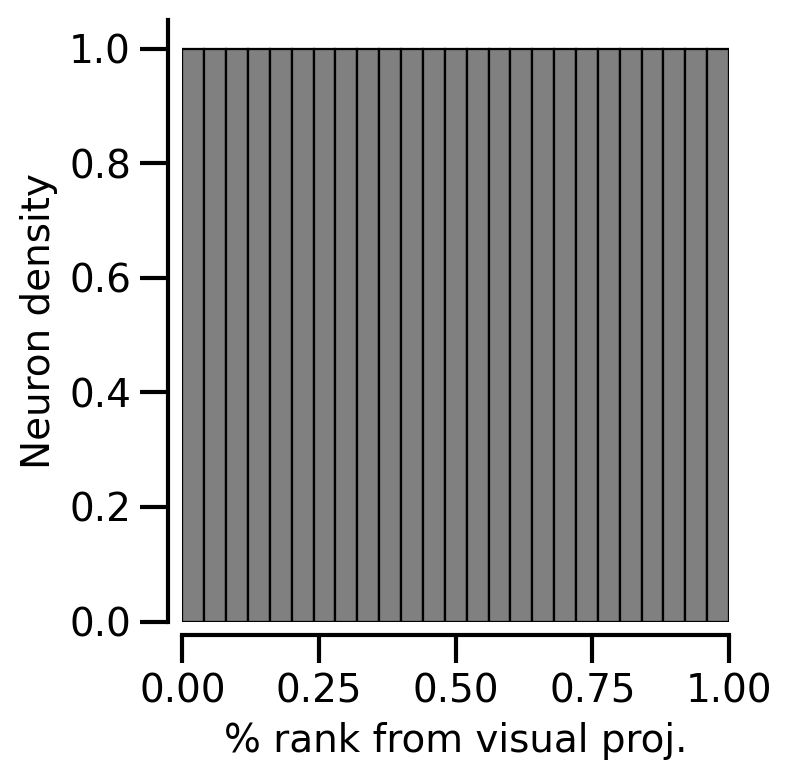

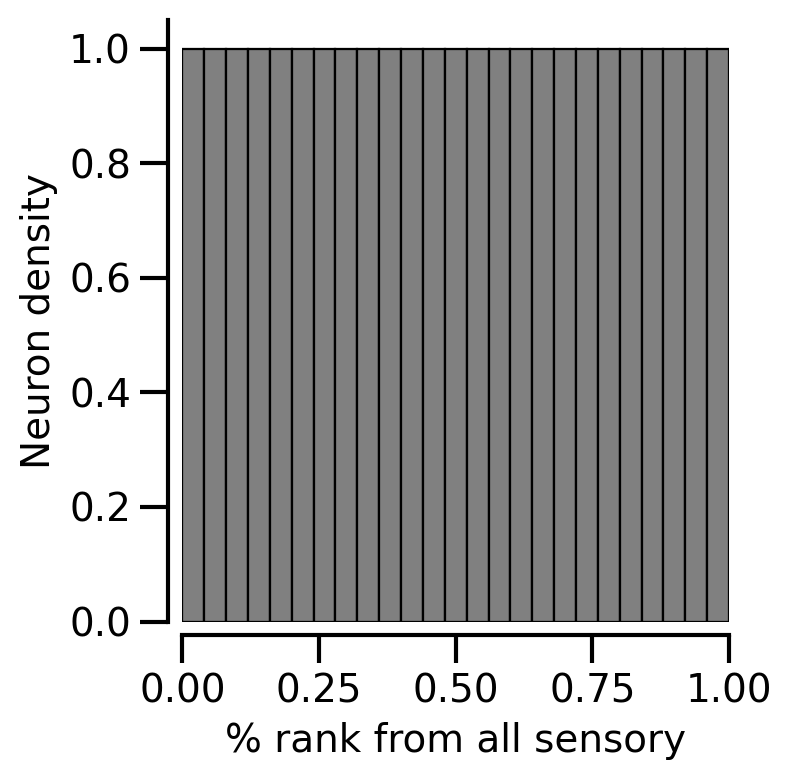

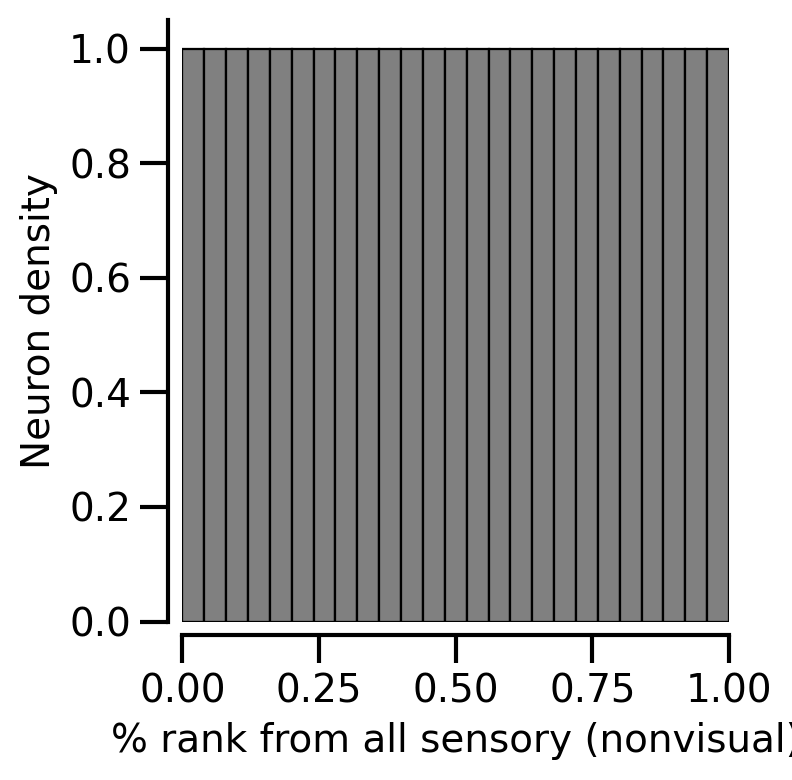

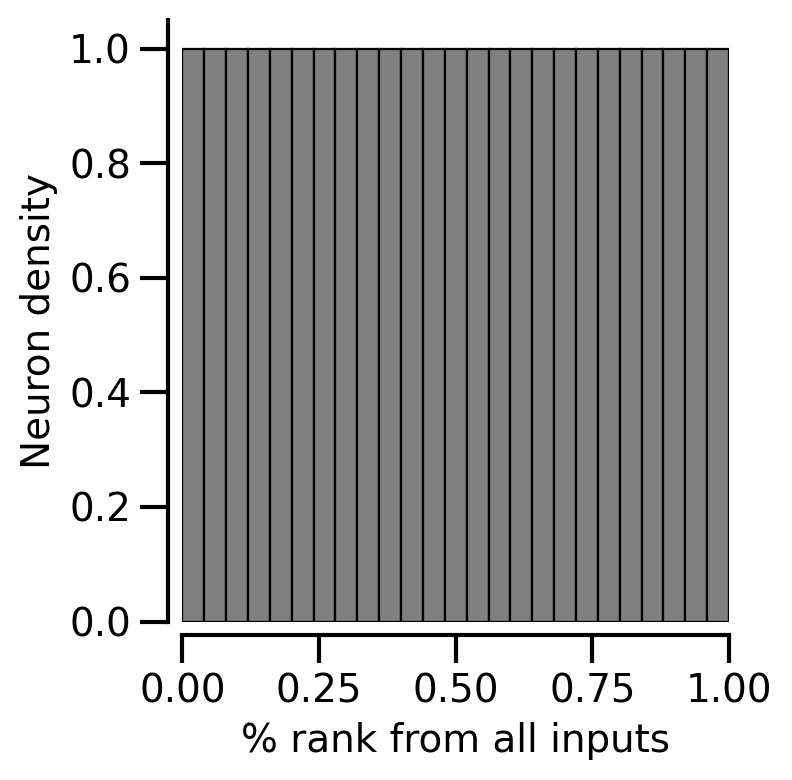

In [355]:
#Distance percent density all rich
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):


    col = f"{input_class}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    rankperc_plot(rank_plot_df, 
             col, "gray",
             "density", [0,1], 
            f"% rank from {ic_label}", 
            "Neuron density",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_perc.png")



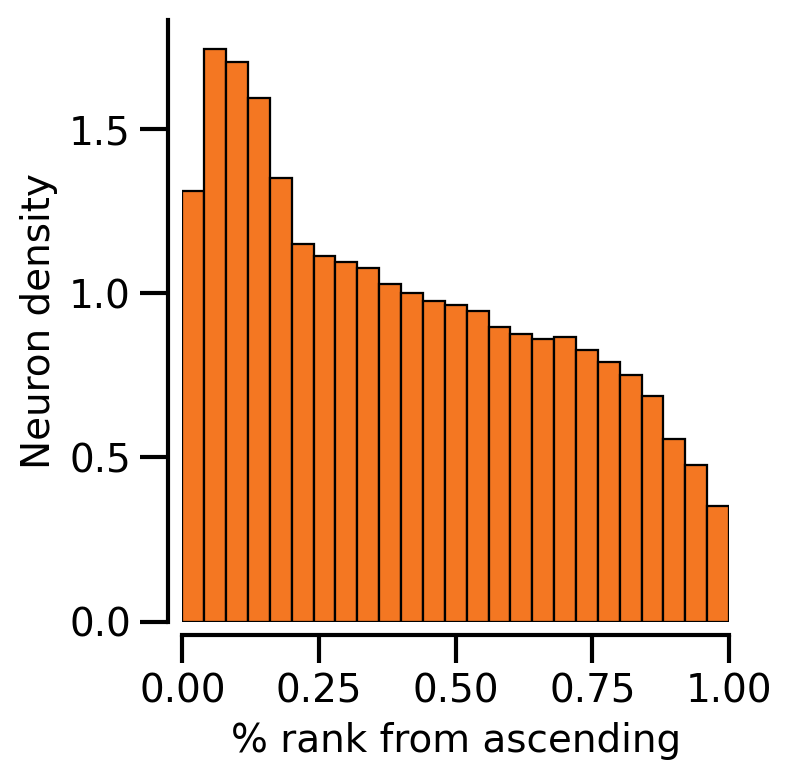

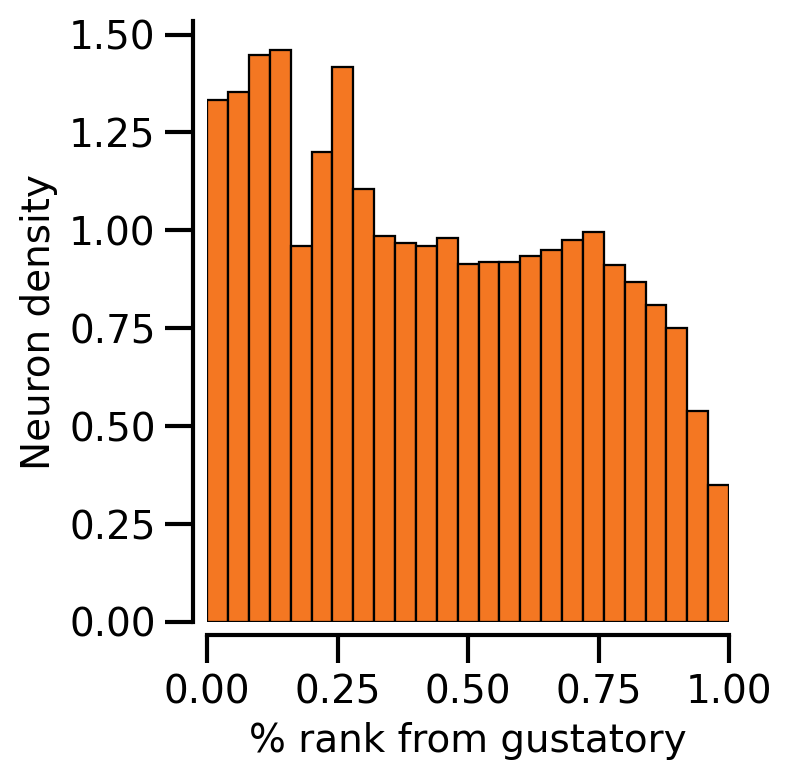

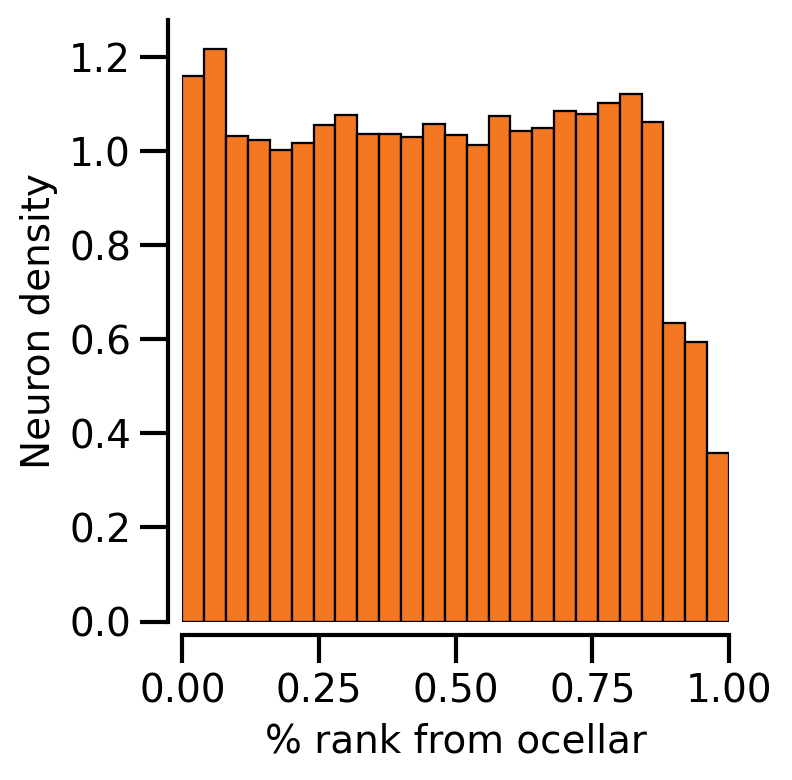

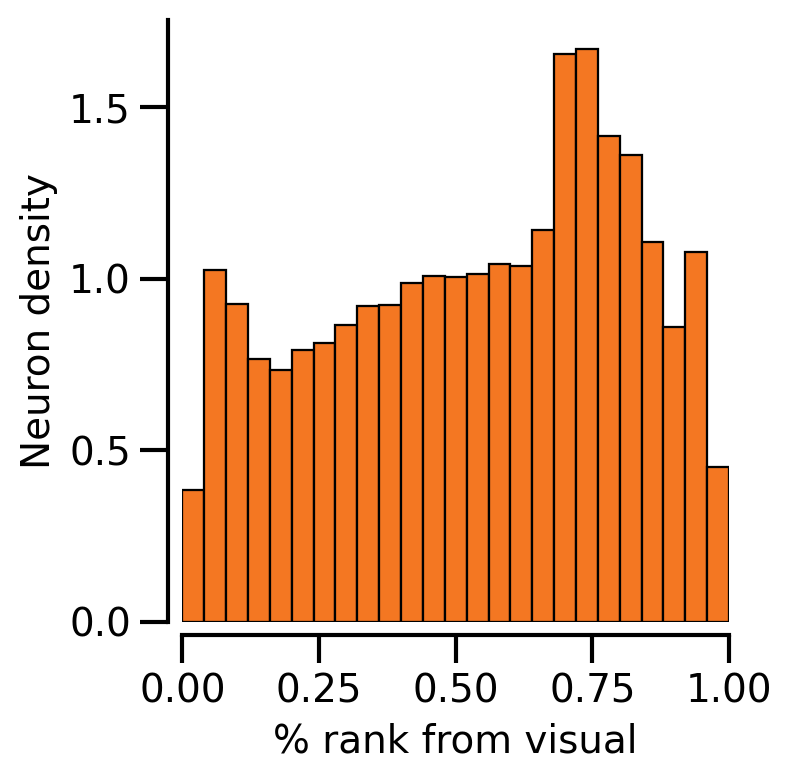

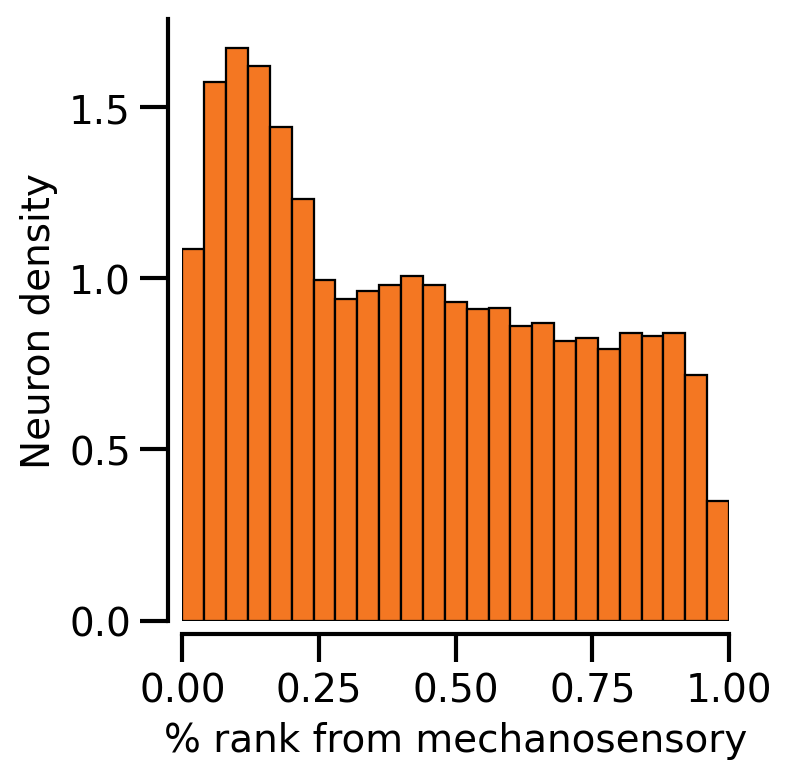

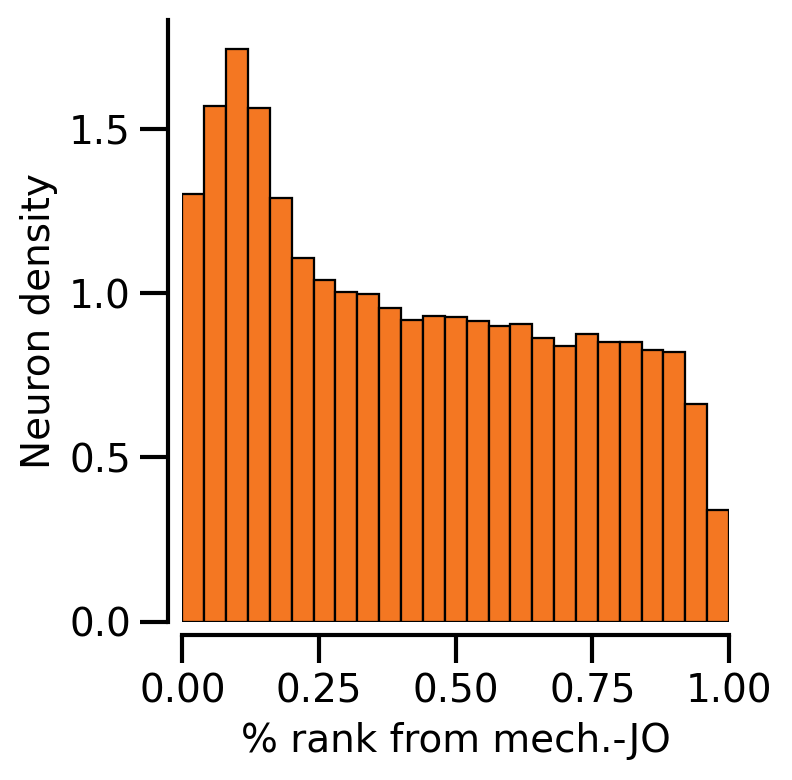

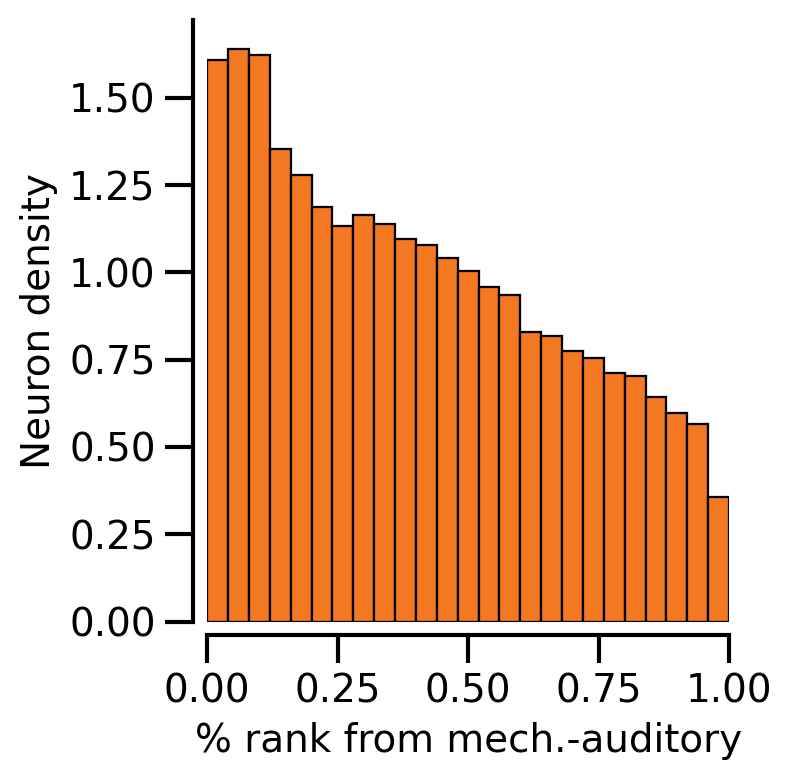

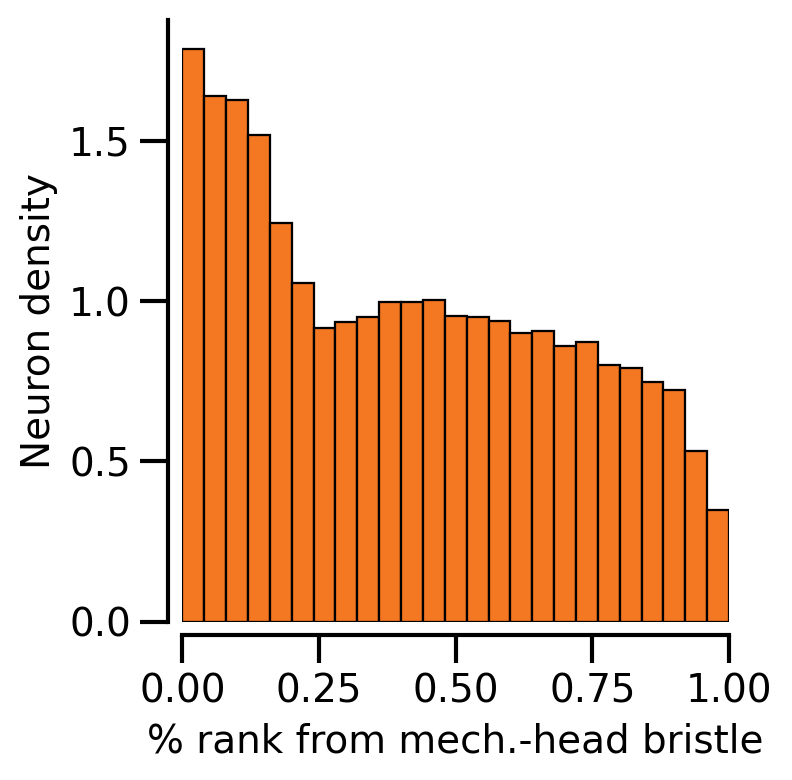

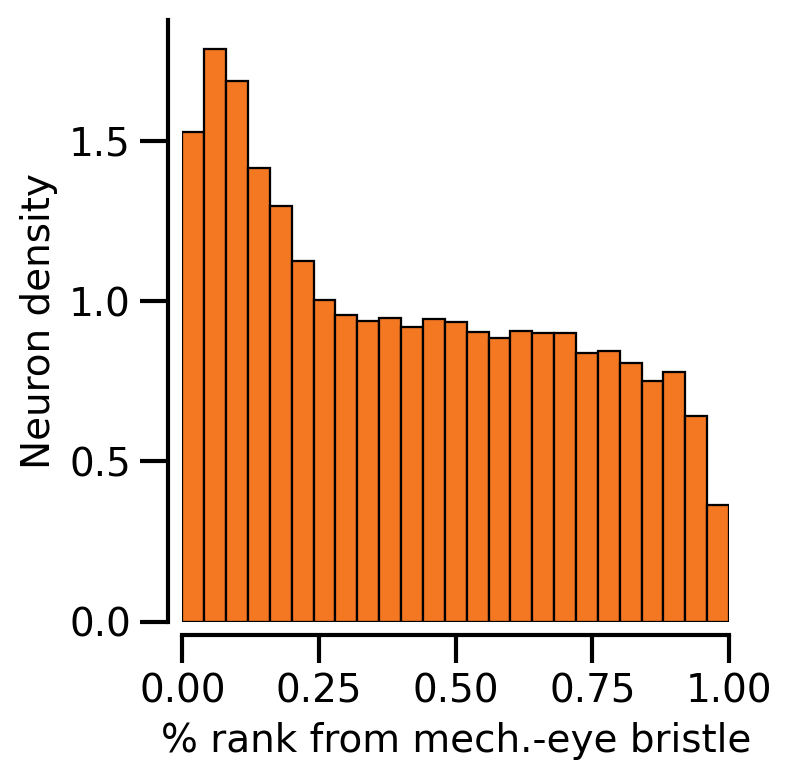

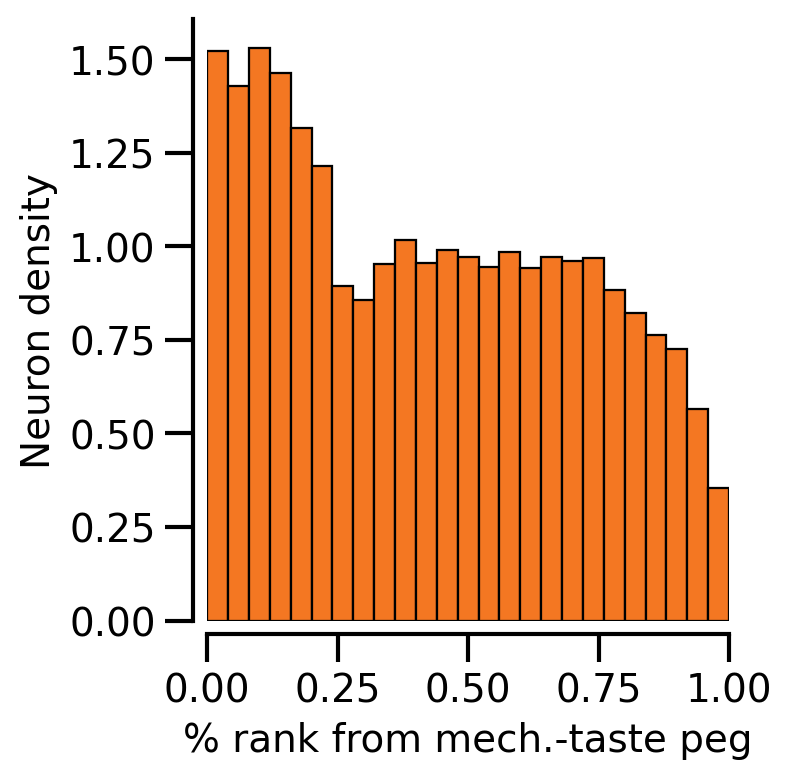

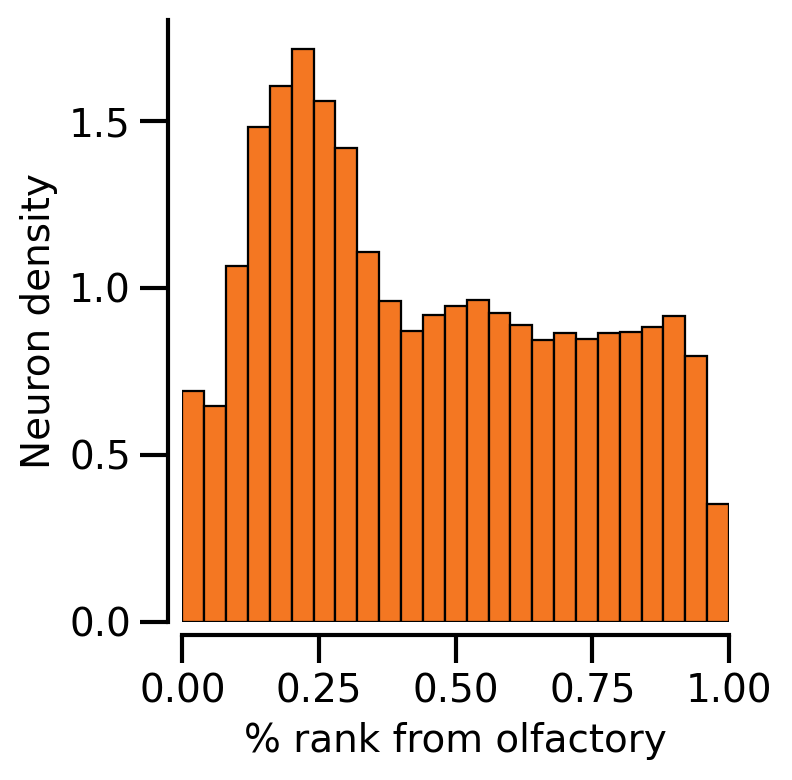

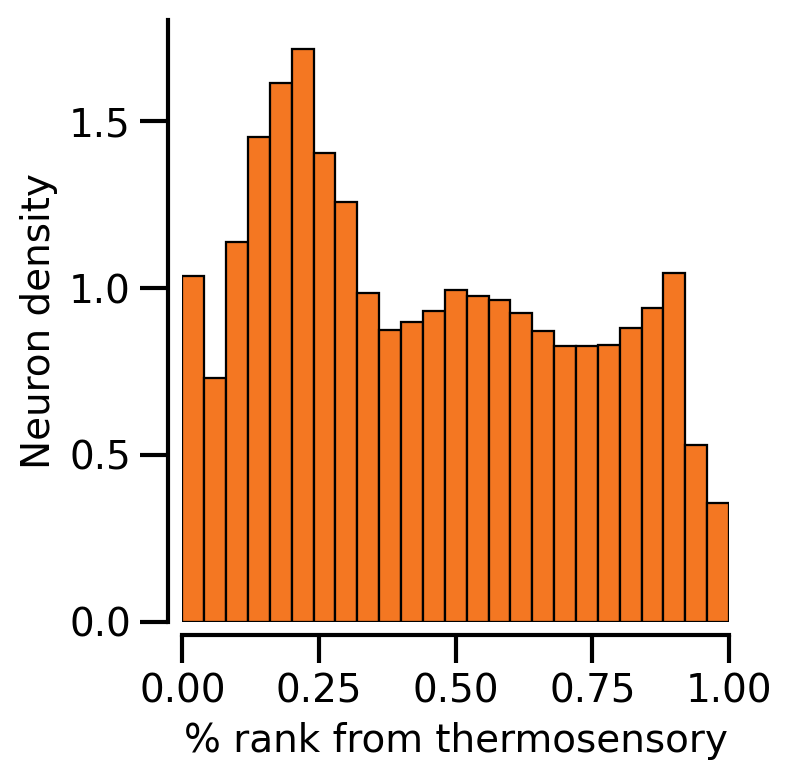

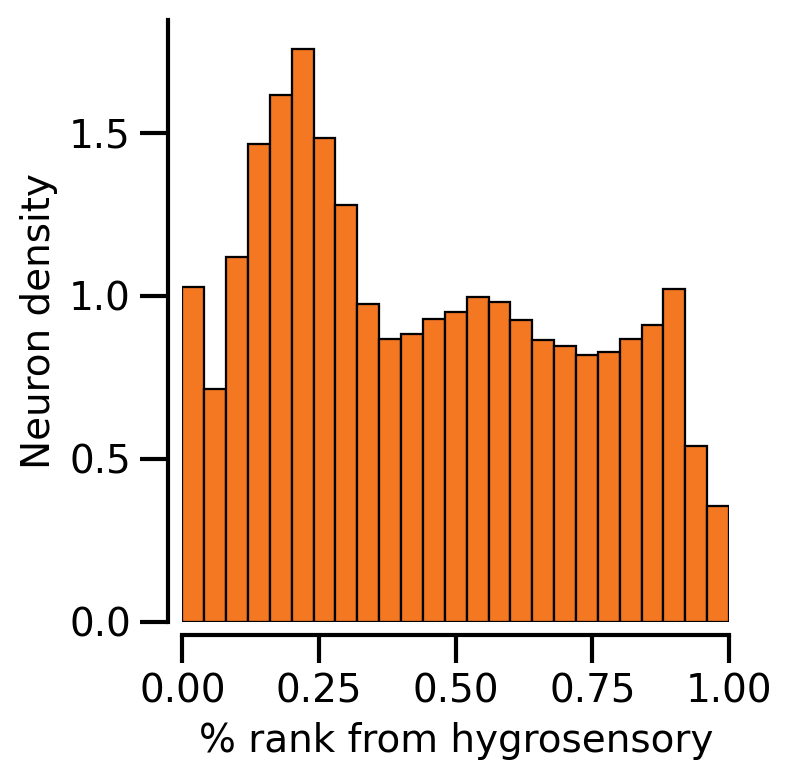

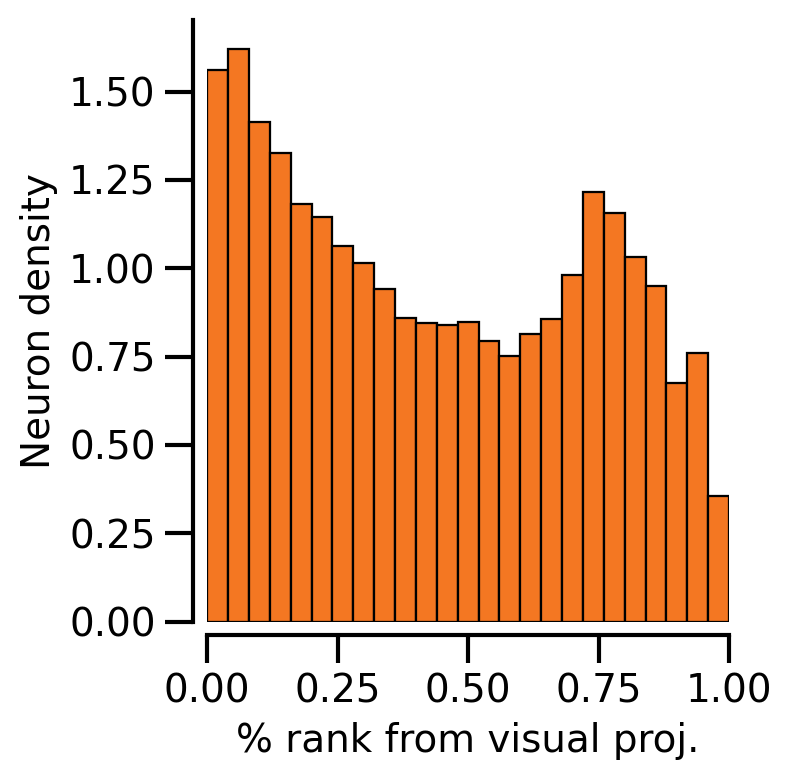

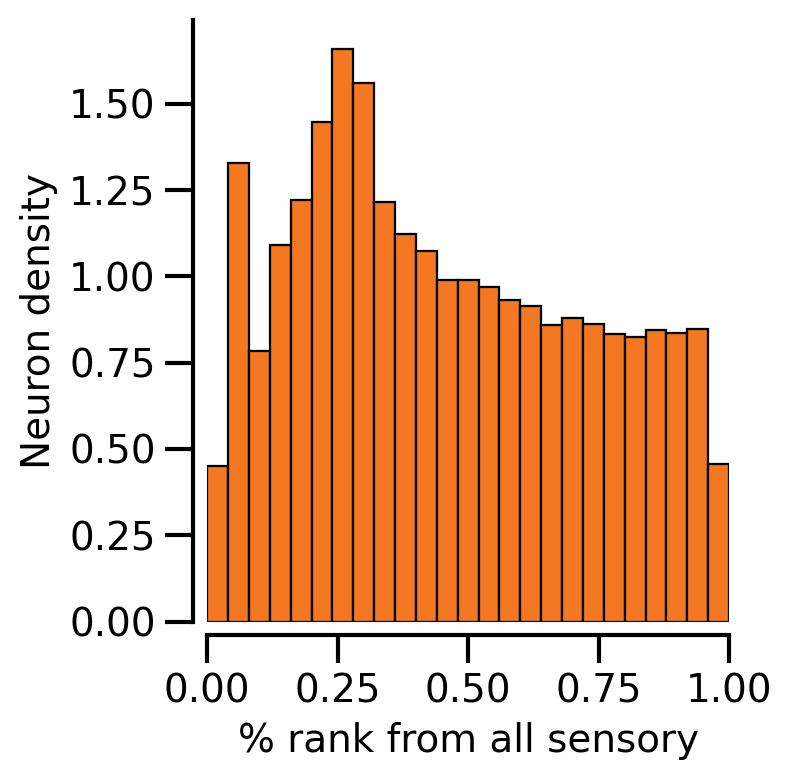

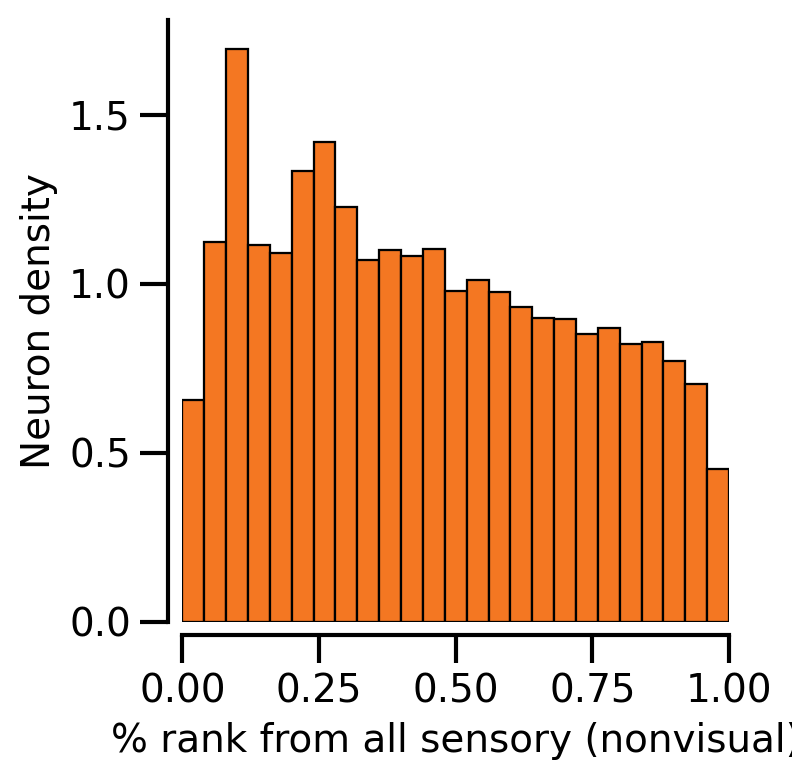

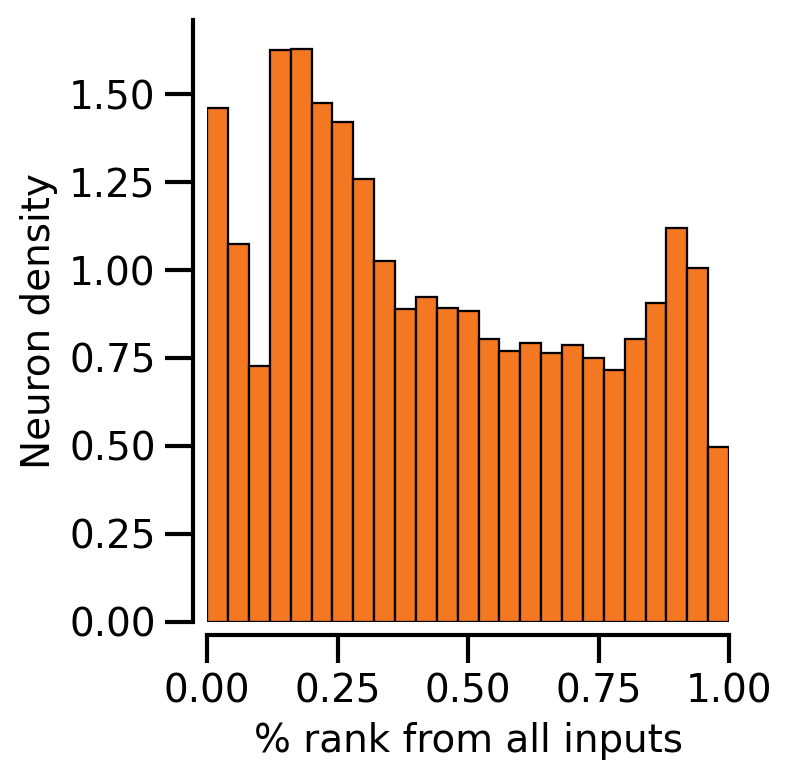

In [356]:
#Distance percent density all rich
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):


    col = f"{input_class}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    rankperc_plot(rich_club_rankperc_df, 
             col, rich_balanced_color,
             "density", [0,1], 
            f"% rank from {ic_label}", 
            "Neuron density",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_rich_club_perc.png")



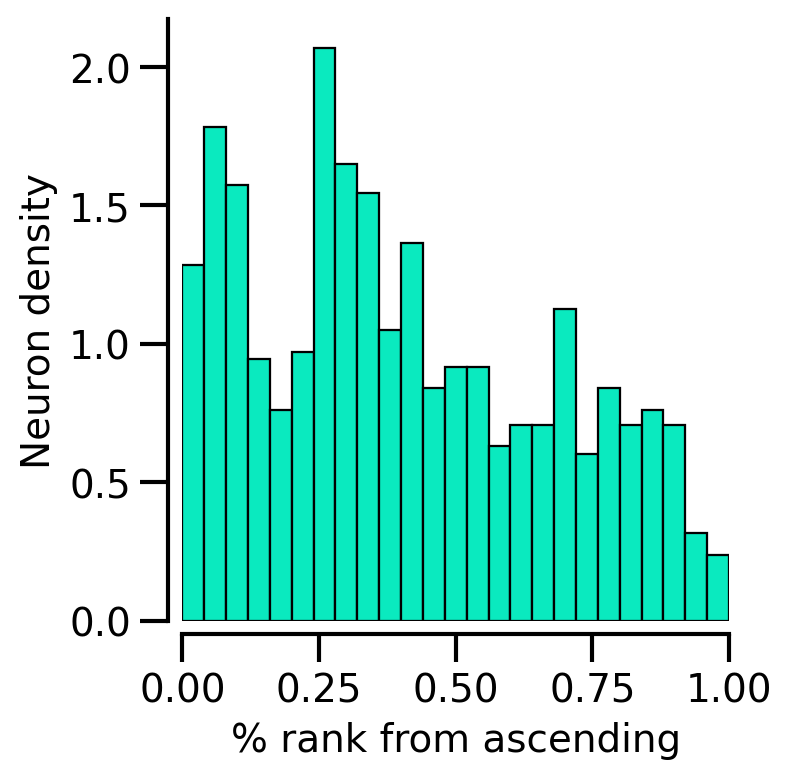

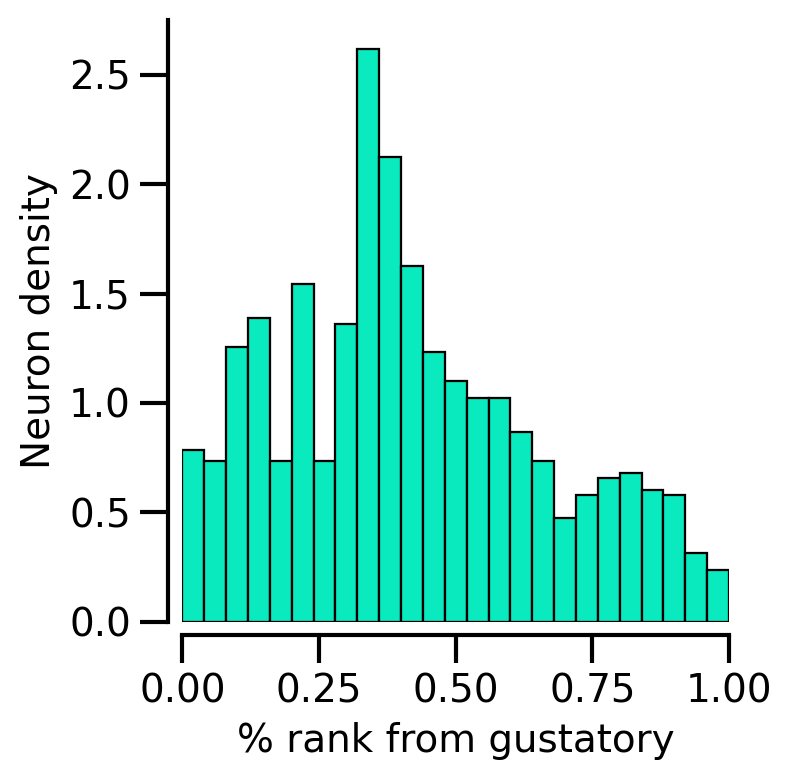

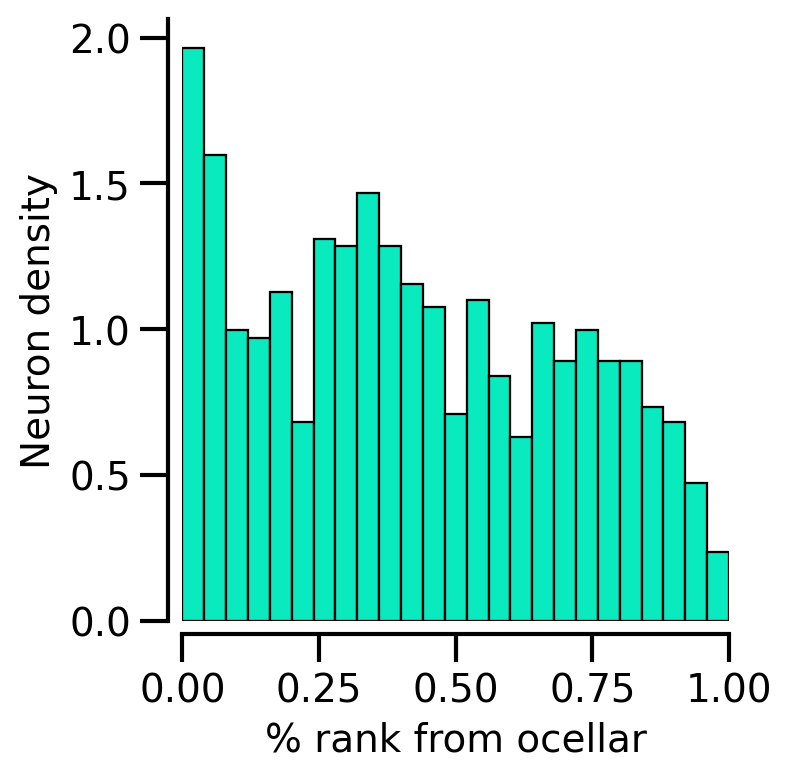

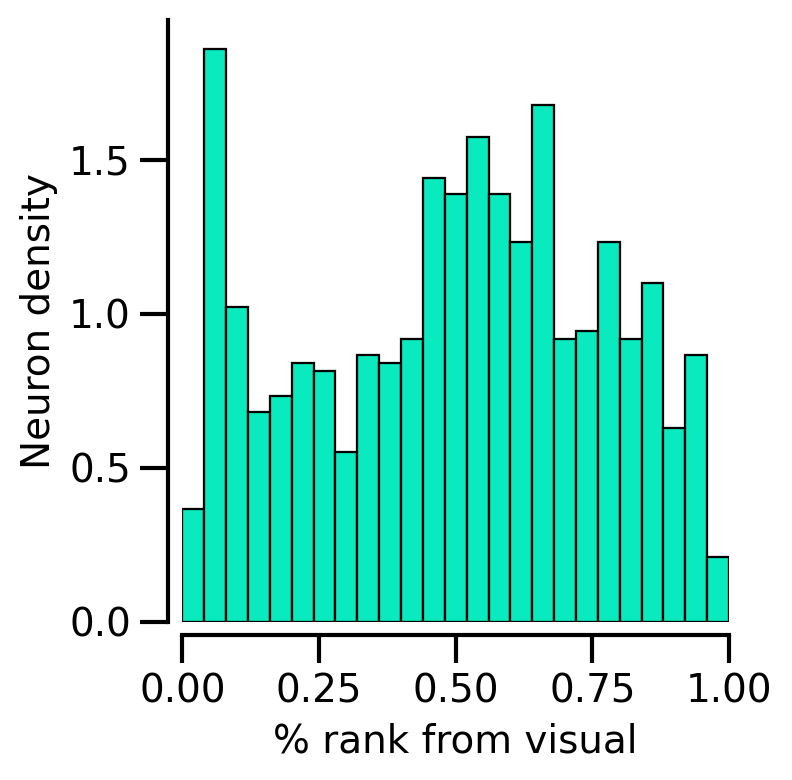

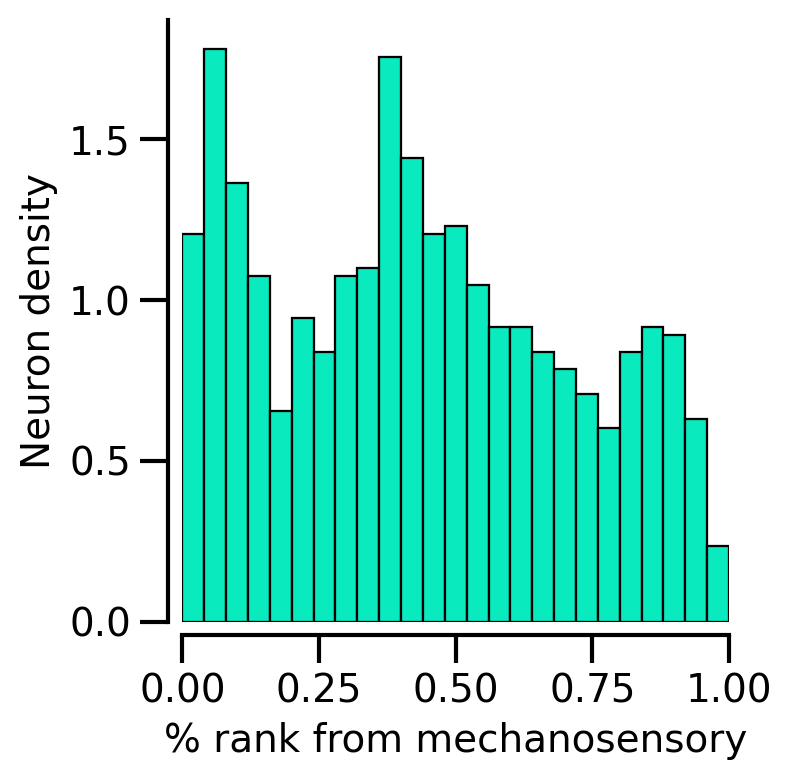

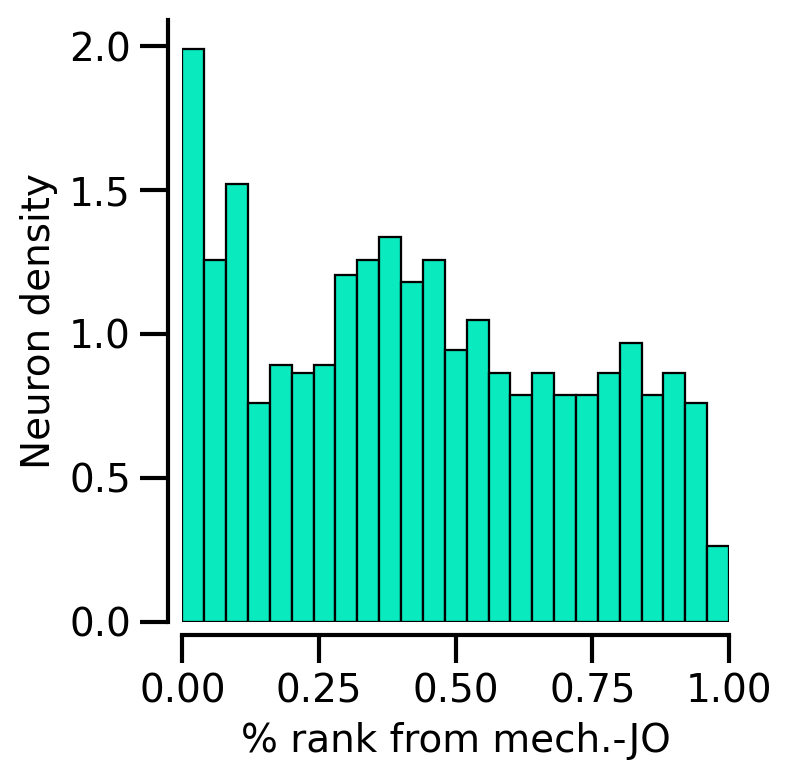

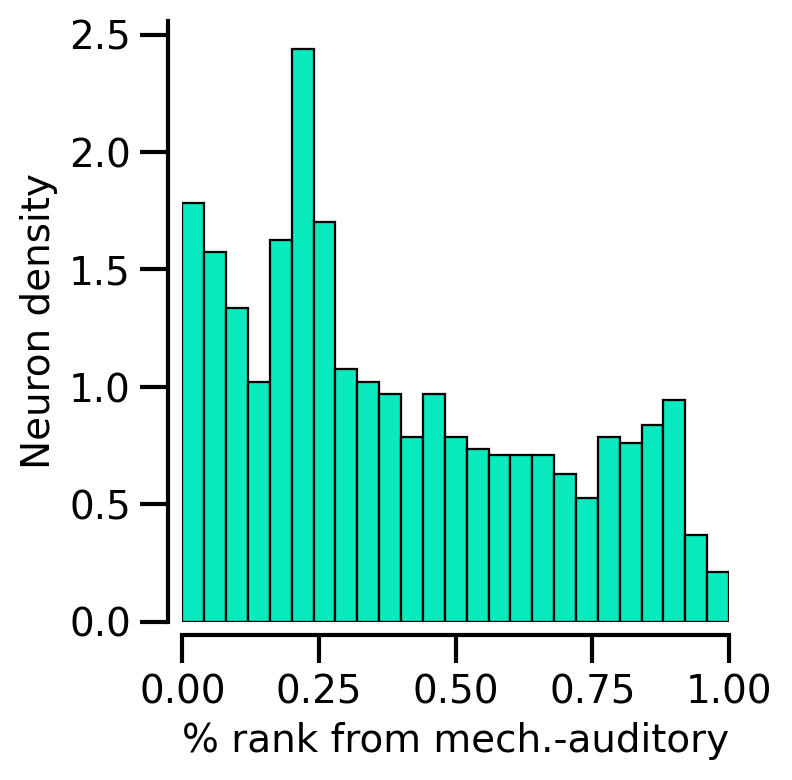

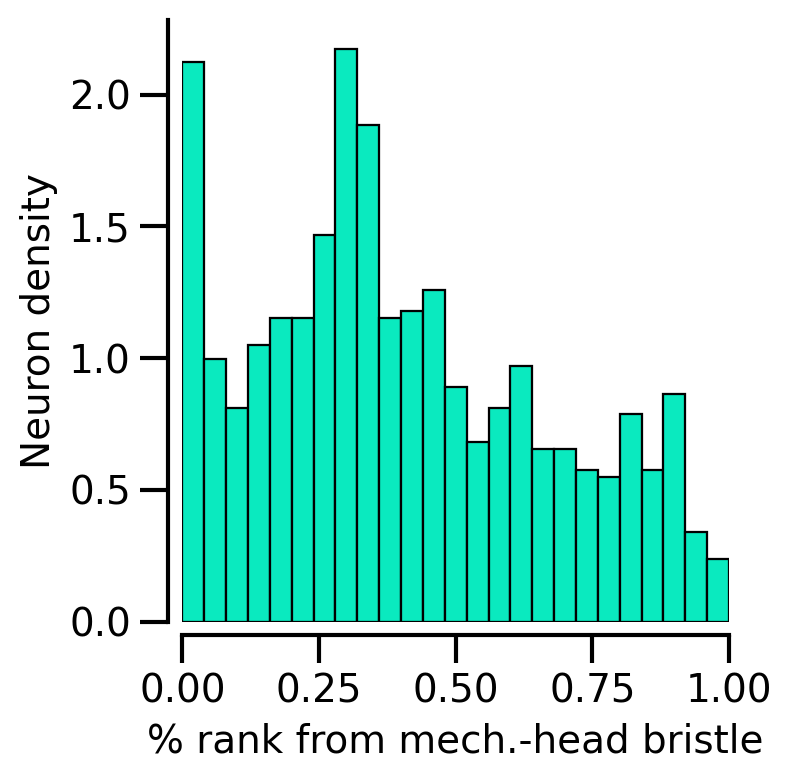

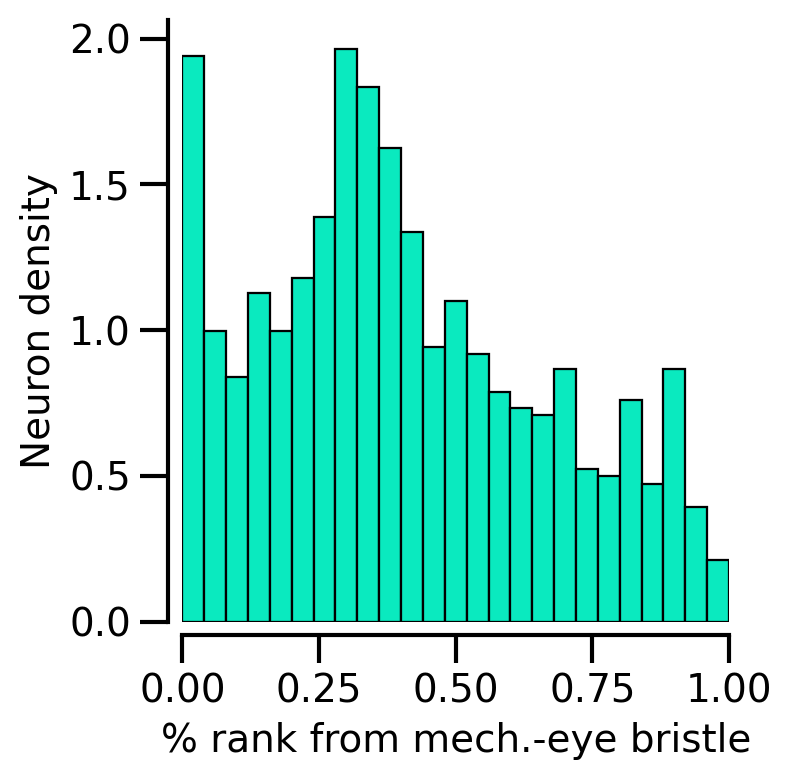

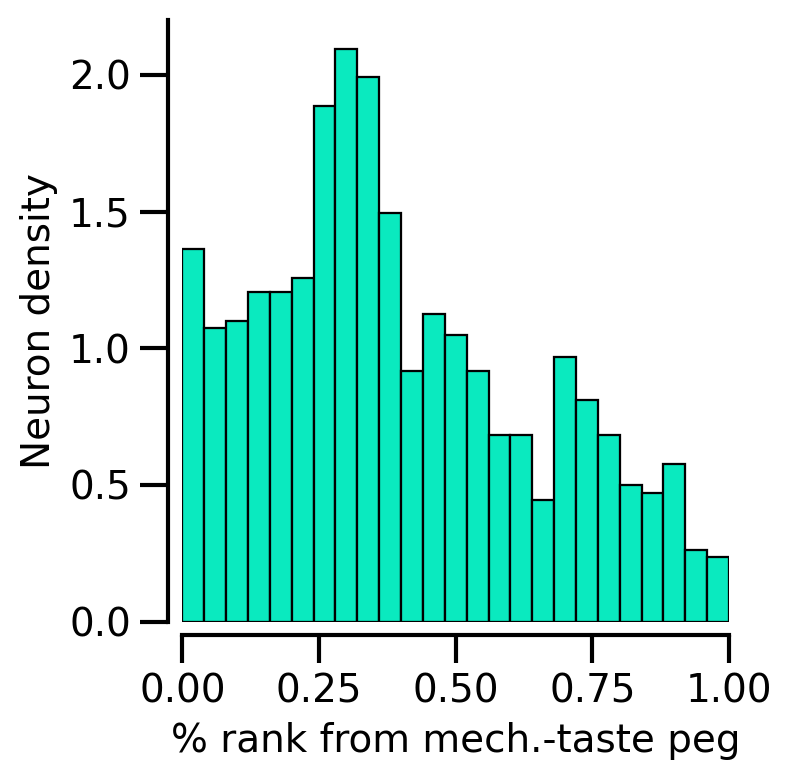

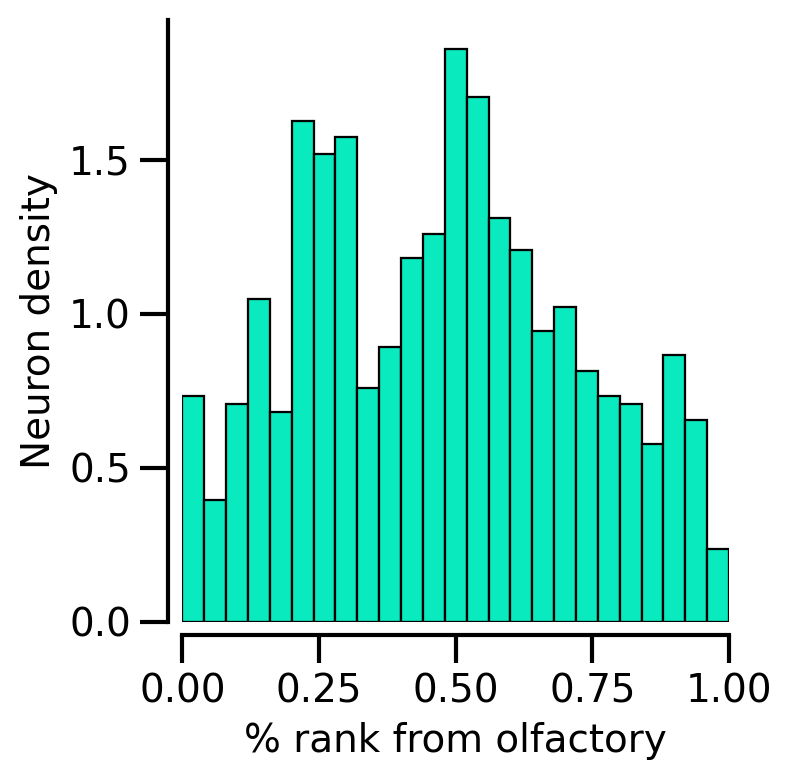

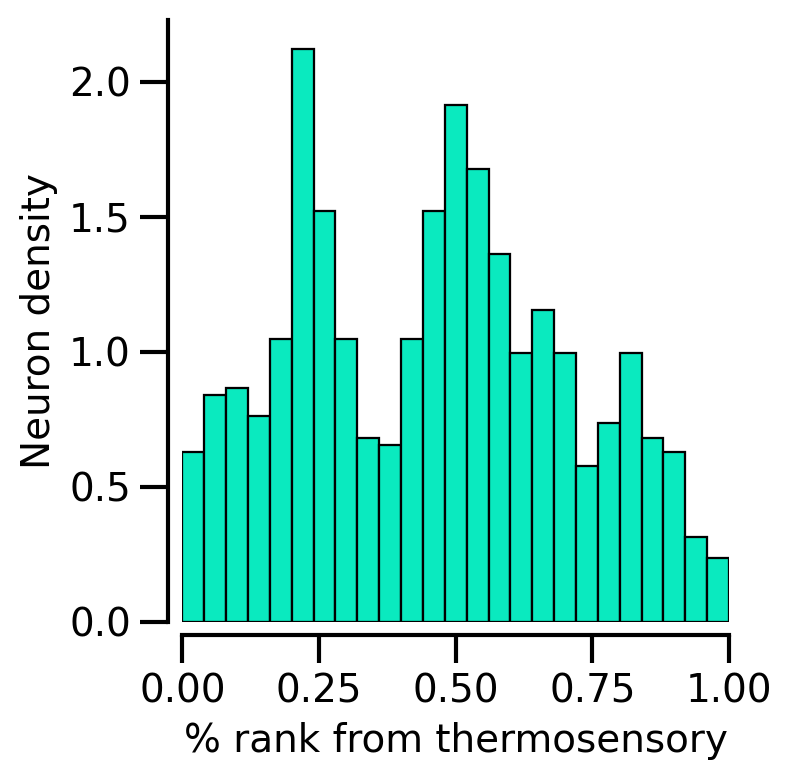

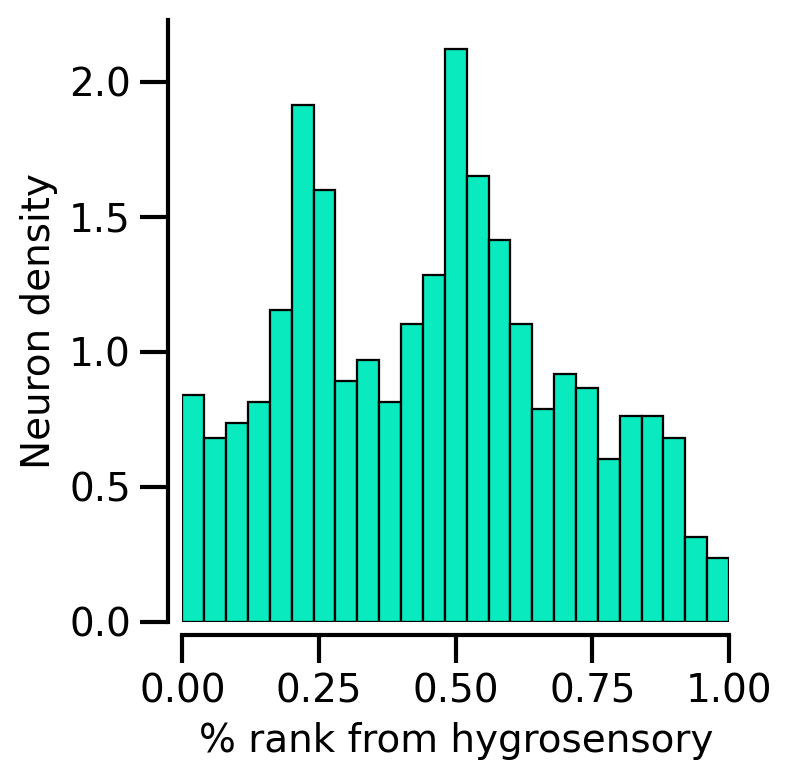

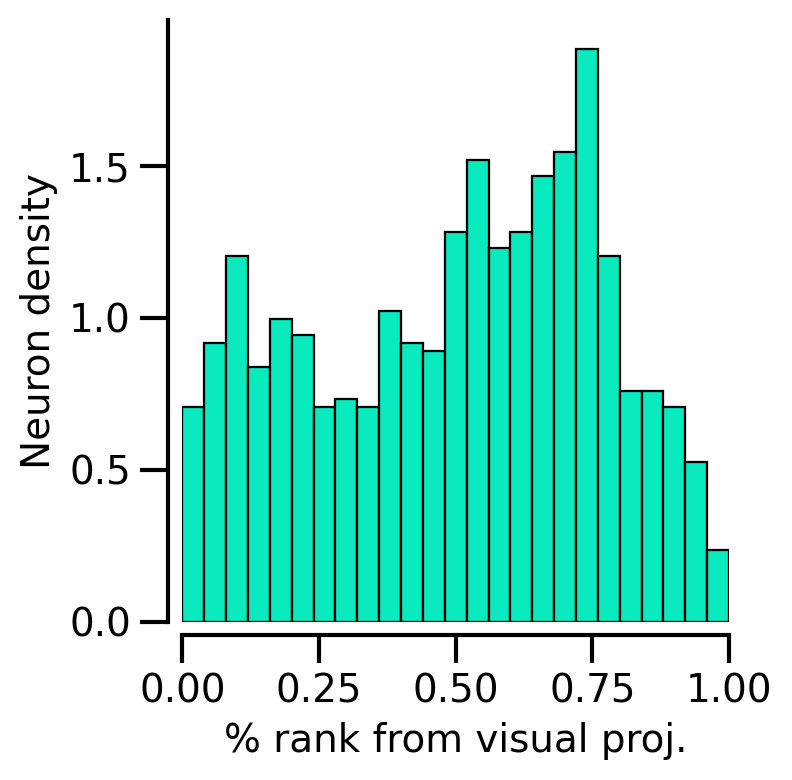

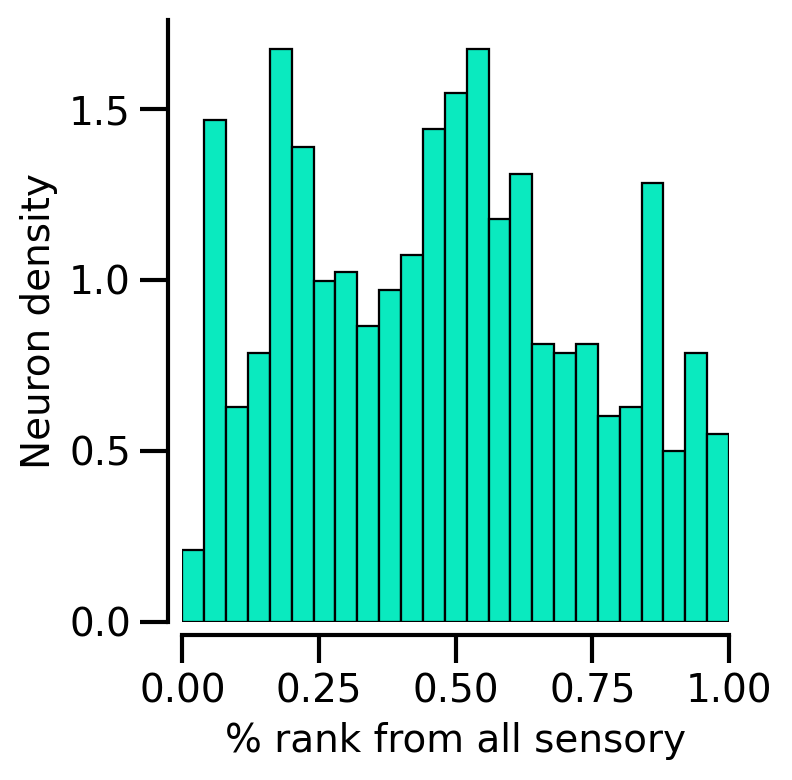

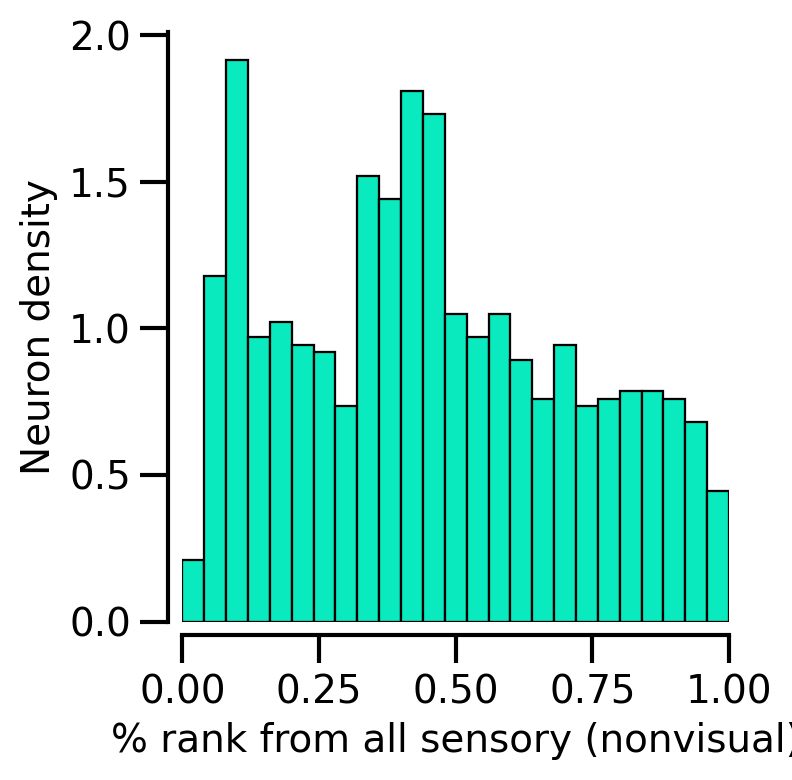

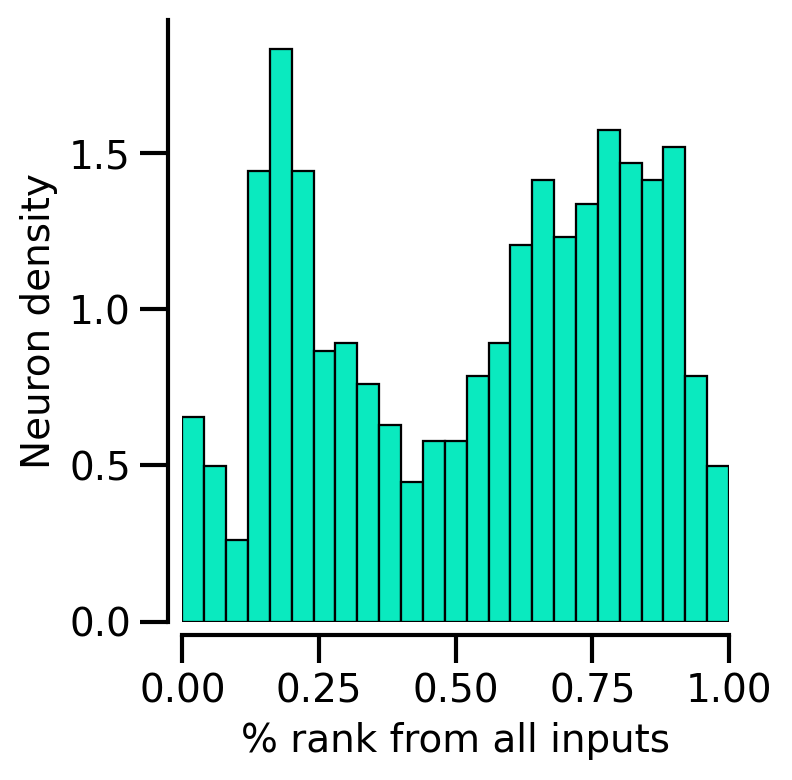

In [357]:
#Distance percent density broadcast
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):


    col = f"{input_class}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    rankperc_plot(broadcast_rankperc_df, 
             col, broadcast_color,
             "density", [0,1], 
            f"% rank from {ic_label}", 
            "Neuron density",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_broadcast_perc.png")



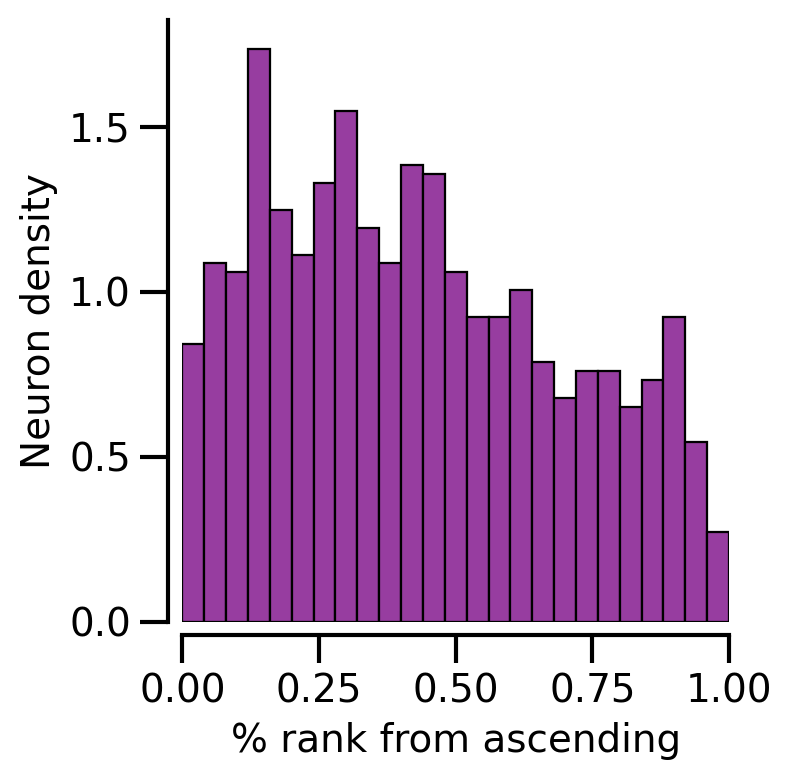

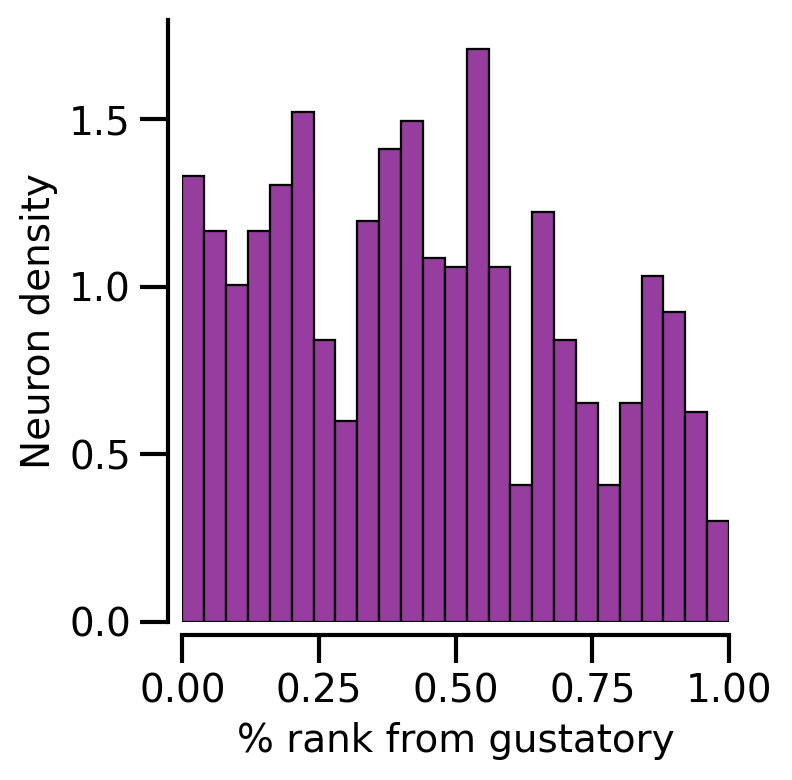

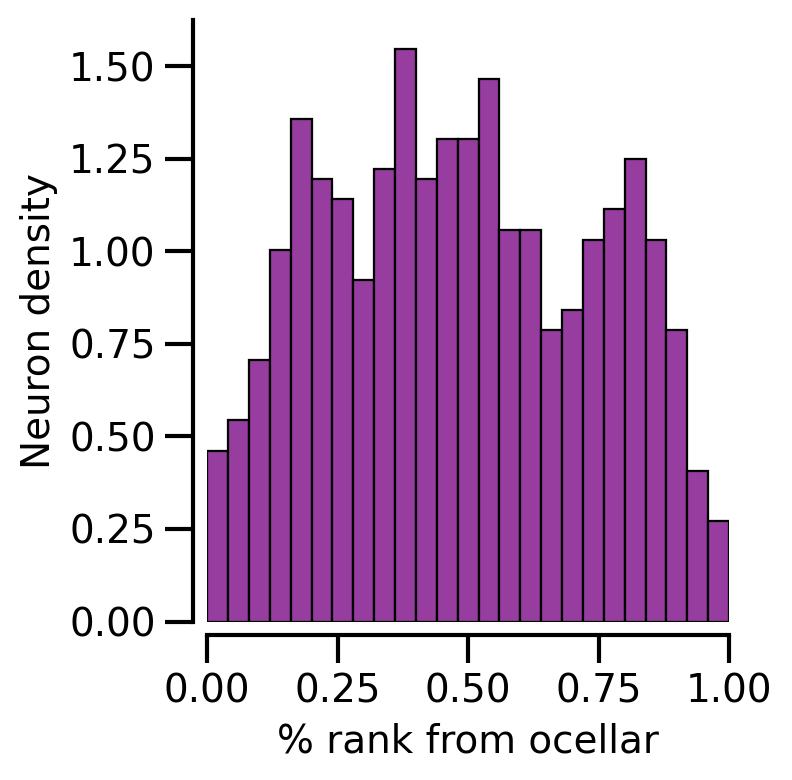

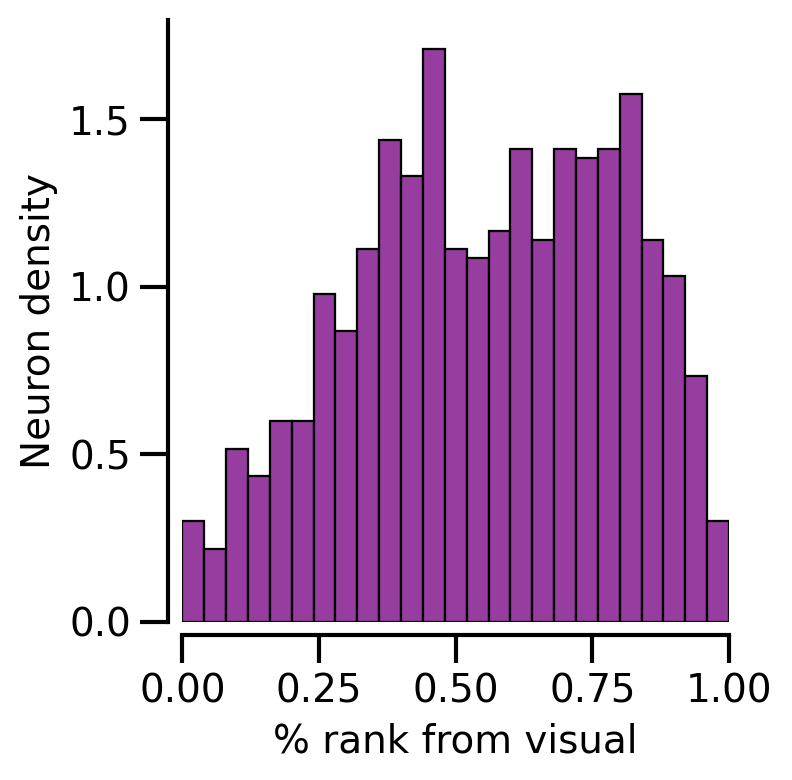

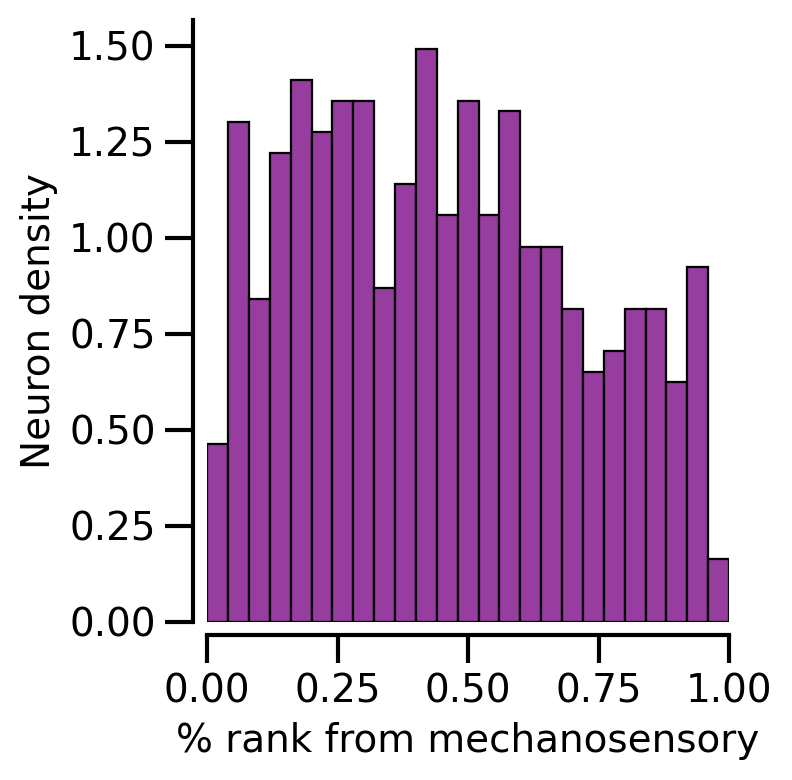

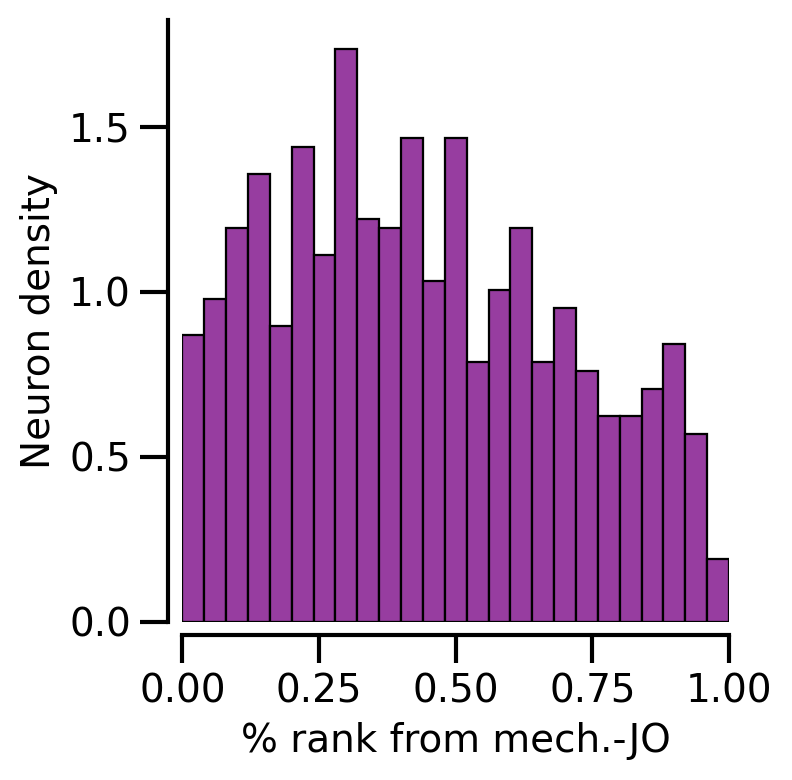

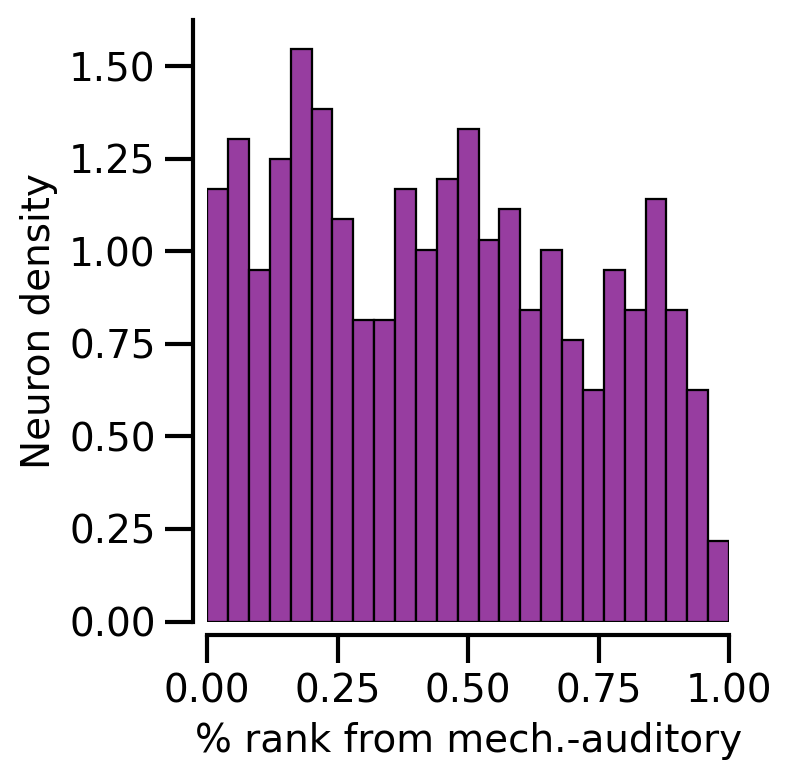

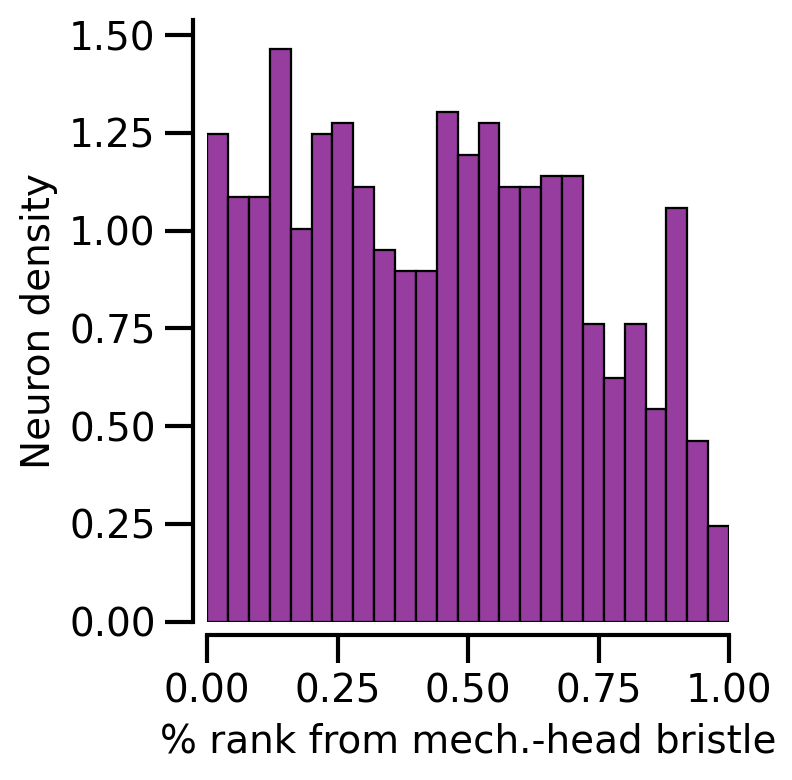

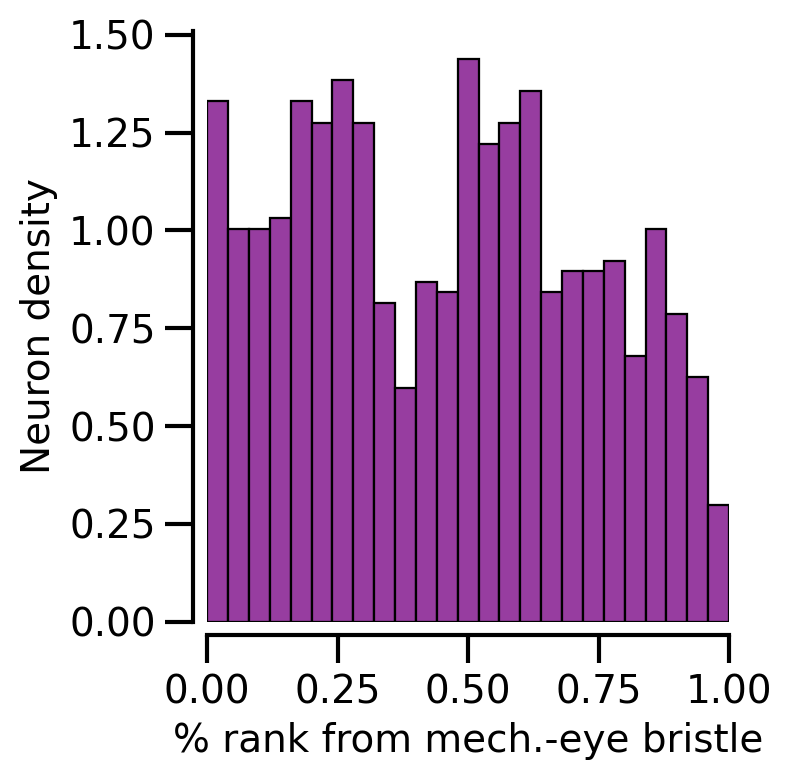

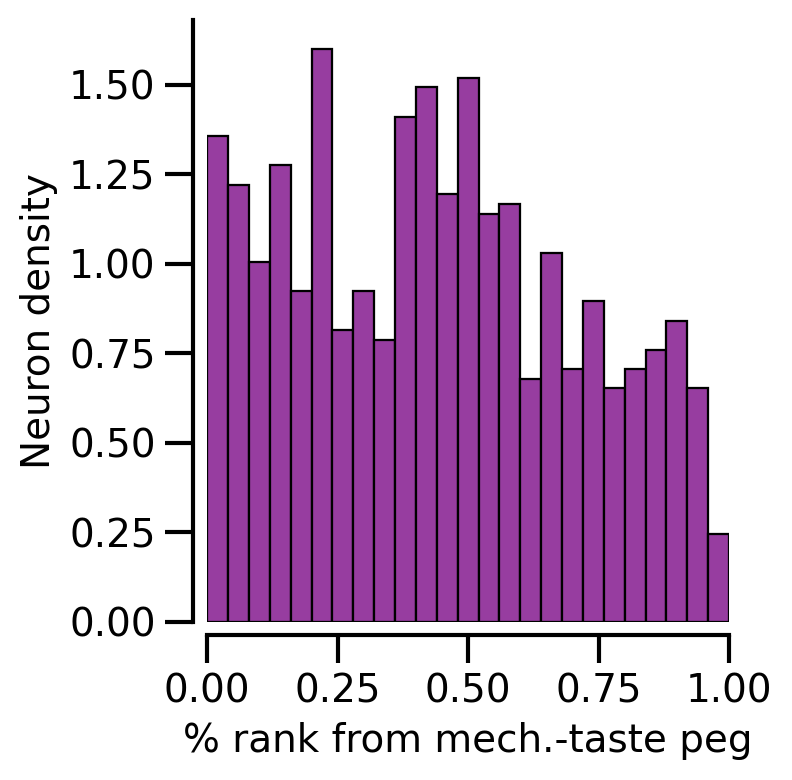

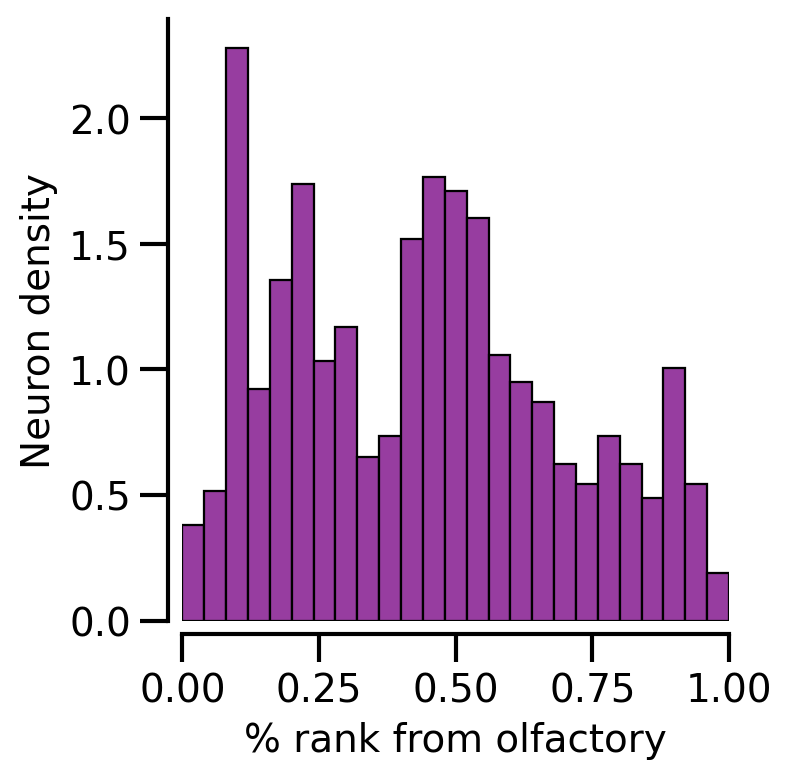

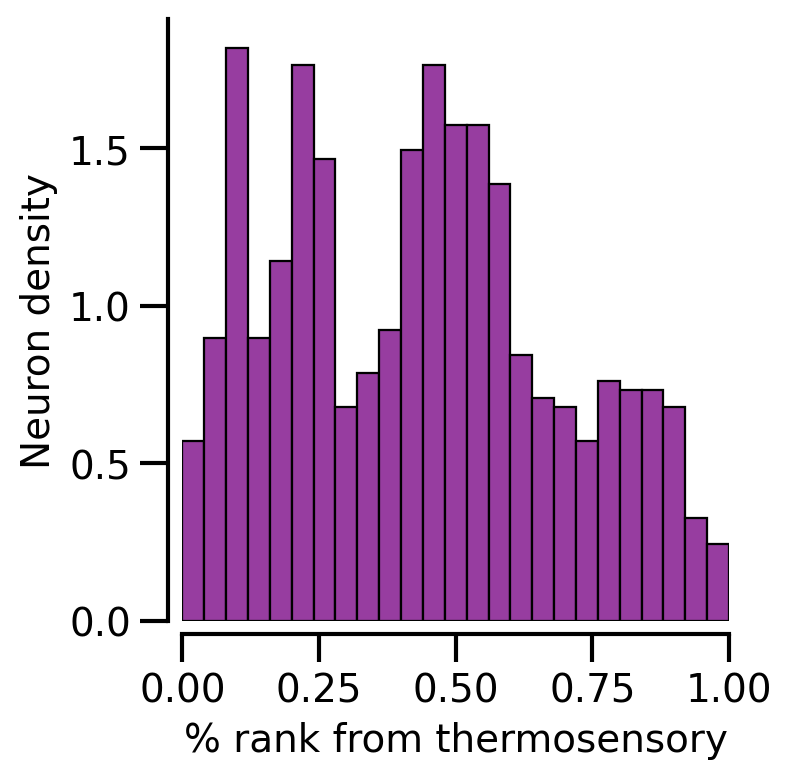

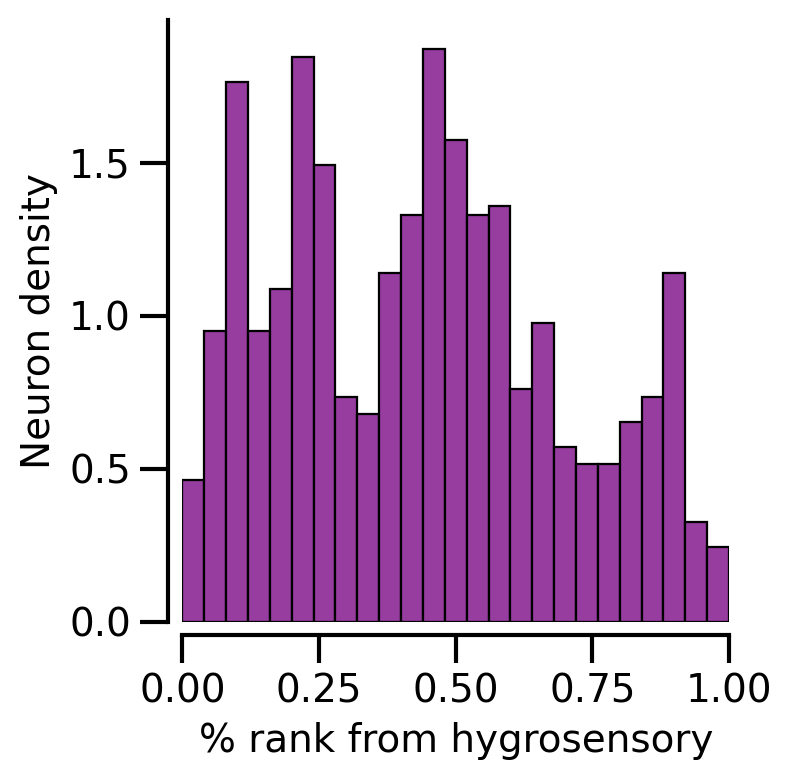

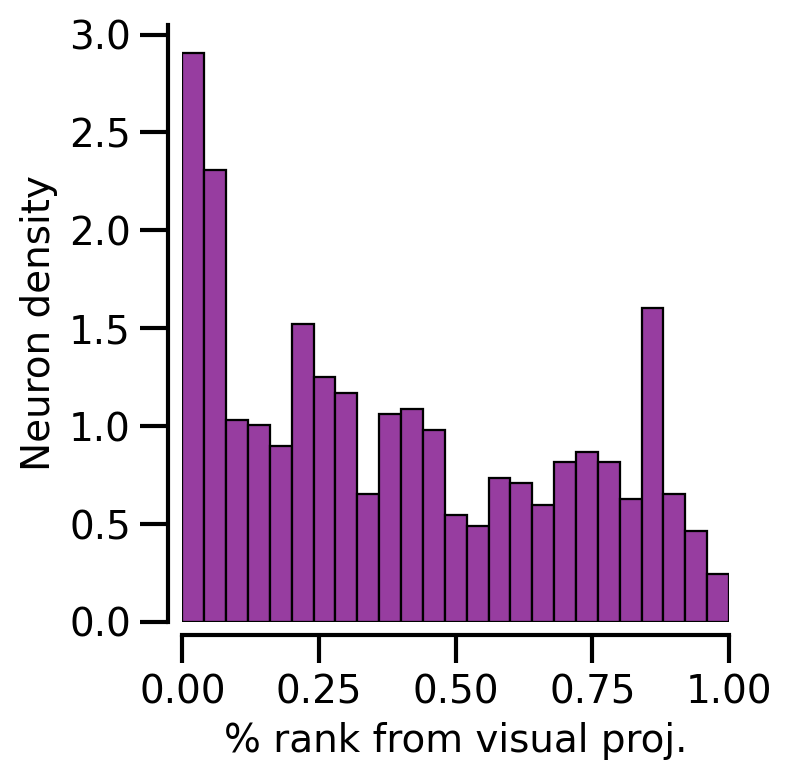

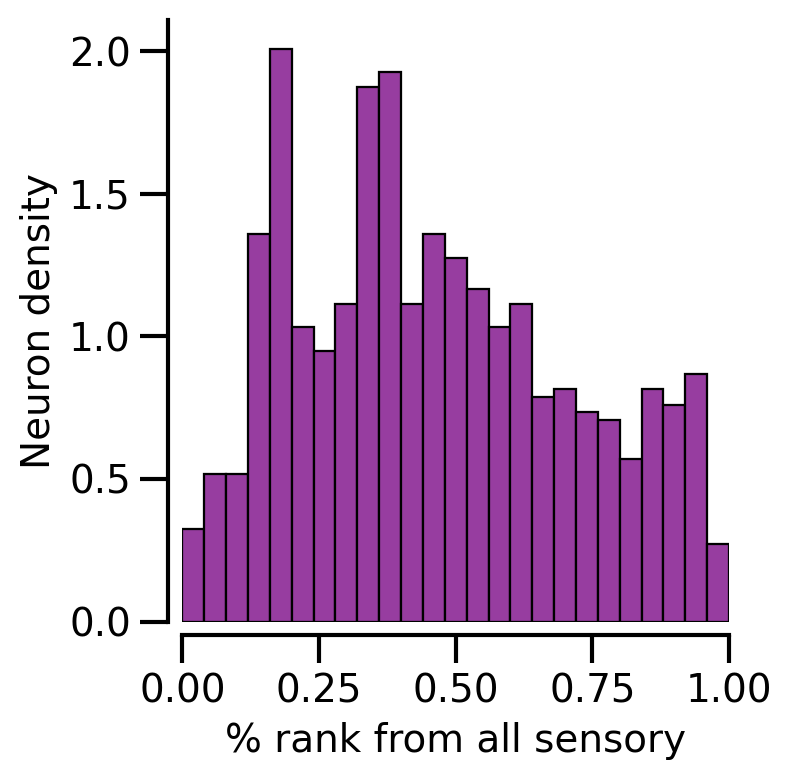

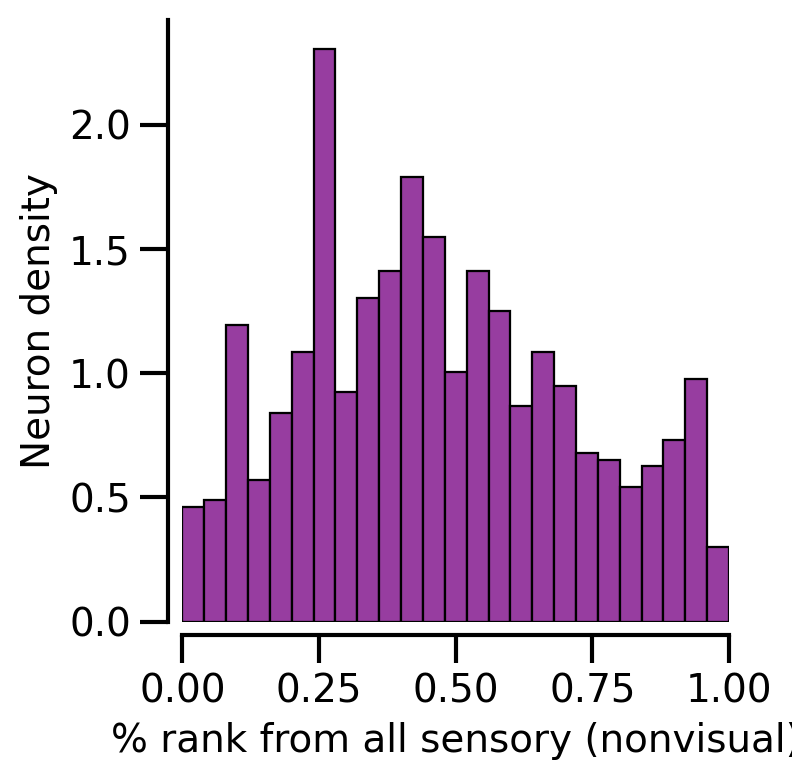

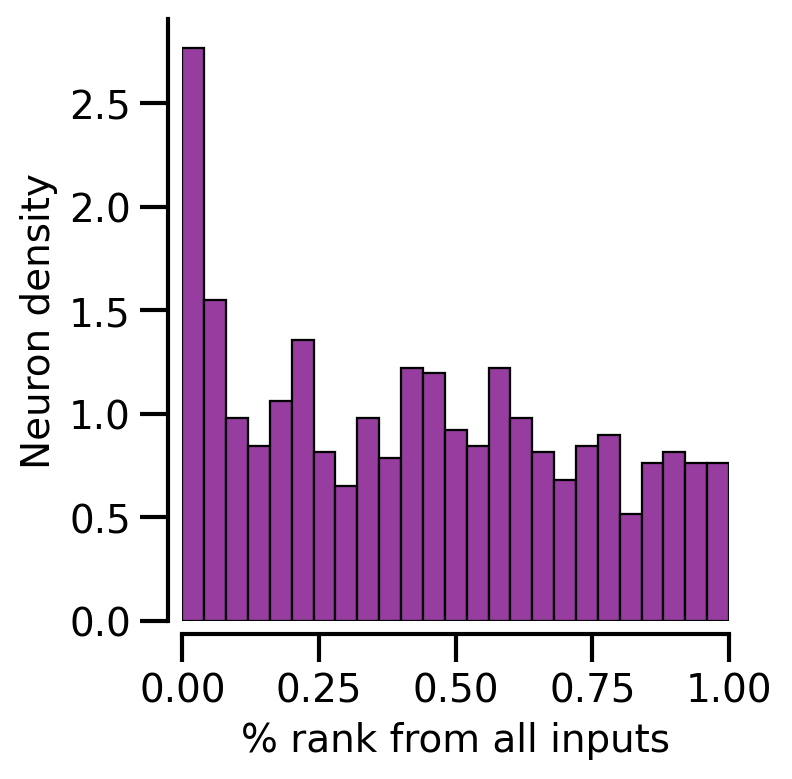

In [358]:
#Distance percent density integrate
run = "10000"
for input_class,ic_label in zip(input_classes,input_class_labels):


    col = f"{input_class}"

    fig_dir = "/Users/Albert/Dropbox/AL Murthy Lab/FlyWire Data/630_ranks"

    rankperc_plot(integrate_rankperc_df, 
             col, integrate_color,
             "density", [0,1], 
            f"% rank from {ic_label}", 
            "Neuron density",
            kde=False, alpha=1., 
            out_path=f"{fig_dir}/"+input_class+"_integrate_perc.png")

In [359]:
avg_perc = np.stack((rich_club_avg_perc,integrate_avg_perc,broadcast_avg_perc), axis=1)


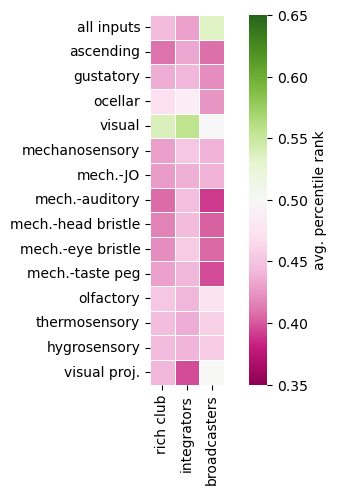

In [362]:
#heatmap for average percentage

divnorm = TwoSlopeNorm(vmin=0.35, vcenter=0.5, vmax=0.65001)

# reorder to put all inputs on top
avg_perc_reordered = np.row_stack((avg_perc[16],avg_perc[0:14]))

reordered_labels = input_class_labels[0:14]
reordered_labels.insert(0, "all inputs")

ax = sns.heatmap(avg_perc_reordered, linewidth=0.5,square=True,  cmap="PiYG", norm=divnorm, cbar_kws={'label': 'avg. percentile rank'},
                 xticklabels = ["rich club", "integrators", "broadcasters"], yticklabels = reordered_labels)

out_path=f"{fig_dir}/"+"avg_perc_heatmap.png"
plt.savefig(out_path, dpi=300, bbox_inches = "tight")
plt.savefig(f"{out_path[:-4]}.pdf", bbox_inches = "tight")
plt.show()

/var/folders/8c/sd93gmj55s76w2q85ftm_jjh0000gn/T/ipykernel_5509/2961491267.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(broadcast_rankperc_df[input_1], broadcast_rankperc_df[input_2], s=1, c=broadcast_color, alpha=1)
/var/folders/8c/sd93gmj55s76w2q85ftm_jjh0000gn/T/ipykernel_5509/2961491267.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(integrate_rankperc_df[input_1], integrate_rankperc_

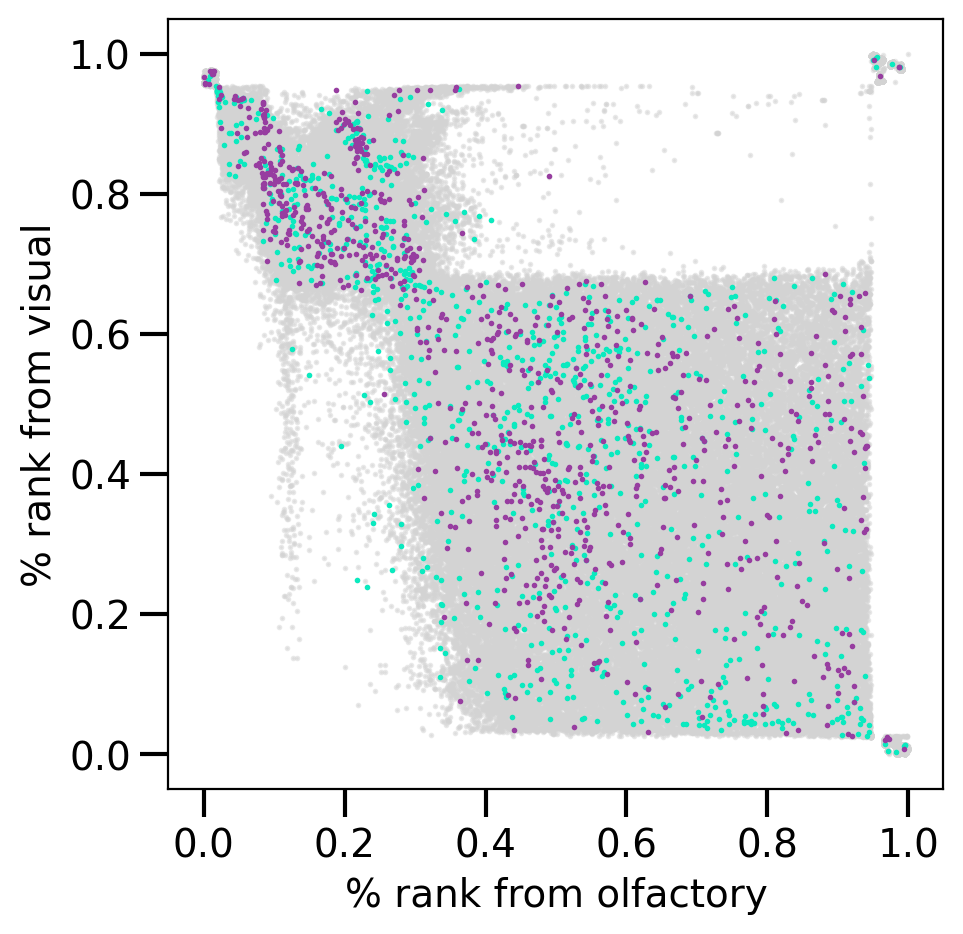

In [371]:
#scatterplot of percentile rank in different modalities

input_1 = "olfactory"
input_2 = "visual"

fig = plt.figure(figsize=(5,5), facecolor="white", dpi=200)
plt.tick_params(length=10, width=1.5, labelsize=14)

plt.xlabel(f"% rank from {input_1}", fontsize=14)
plt.ylabel(f"% rank from {input_2}", fontsize=14)
#plt.ylabel("% rank from visual proj.", fontsize=14)

plt.scatter(rank_plot_df[input_1], rank_plot_df[input_2], s=1, c="lightgray", alpha=0.5)

plt.scatter(broadcast_rankperc_df[input_1], broadcast_rankperc_df[input_2], s=1, c=broadcast_color, alpha=1)
plt.scatter(integrate_rankperc_df[input_1], integrate_rankperc_df[input_2], s=1, c=integrate_color, alpha=1)

out_path=f"{fig_dir}/"+"rankperc_scatter" + input_1 + input_2 +".png"
plt.savefig(out_path, dpi=300, bbox_inches = "tight")
plt.savefig(f"{out_path[:-4]}.pdf", bbox_inches = "tight")
plt.show()




In [364]:
print(input_class_labels)
print(avg_perc)

['ascending', 'gustatory', 'ocellar', 'visual', 'mechanosensory', 'mech.-JO', 'mech.-auditory', 'mech.-head bristle', 'mech.-eye bristle', 'mech.-taste peg', 'olfactory', 'thermosensory', 'hygrosensory', 'visual proj.', 'all sensory', 'all sensory (nonvisual)', 'all inputs']
[[0.40903253 0.43390308 0.40784983]
 [0.43589866 0.44162813 0.42041901]
 [0.47067107 0.48664561 0.42472656]
 [0.53789114 0.55533372 0.49832369]
 [0.42930963 0.45221689 0.4390265 ]
 [0.42755036 0.43747884 0.4381898 ]
 [0.40683331 0.4469387  0.39060285]
 [0.41646168 0.44442522 0.40322826]
 [0.42119386 0.45486677 0.40576271]
 [0.43048427 0.44136958 0.39645001]
 [0.45298679 0.4402802  0.47365477]
 [0.44579626 0.43660259 0.45802732]
 [0.44454367 0.43984454 0.45500648]
 [0.44242229 0.39673637 0.50044269]
 [0.45989292 0.46395166 0.47567502]
 [0.45055024 0.46919747 0.45803281]
 [0.44393564 0.43060154 0.53445445]]


In [361]:
avg_perc_reordered.min()

0.3906028450389094

In [299]:
type(input_class_labels)

list